In [12]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA

# Implementation of Hierarchial Clustering in python

In [13]:
class Hierarchial_Clustering:
    def __init__(self,data=None):
        self.data = data
    
    def linkages(self,X,linkage_type='single'): # Perform hierarchical/agglomerative clustering.
        # scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False)
        linkage_matrix = scipy.cluster.hierarchy.linkage(X,method=linkage_type)
        return linkage_matrix
    
    def dendrogram(self,Z,labels=None,title=None): # Plot the hierarchical clustering as a dendrogram. These are data structures and routines for representing hierarchies as tree object
        plt.figure(figsize=(20, 20))
        dendrogram = scipy.cluster.hierarchy.dendrogram(Z,labels = labels,orientation='left')
        if title==None:
            title = f'Hierarchial Clustering'
        plt.title(title)
        plt.ylabel('Data Points')
        plt.xlabel('Distance')
        plt.show()


In [14]:
def compute_silhouette_score(linkage_matrix, data):
    cluster_labels = scipy.cluster.hierarchy.dendrogram(linkage_matrix, no_plot=True)['leaves']
    return silhouette_score(data, cluster_labels)

def compute_davies_bouldin_score(linkage_matrix, data):
    cluster_labels = scipy.cluster.hierarchy.dendrogram(linkage_matrix, no_plot=True)['leaves']
    return davies_bouldin_score(data, cluster_labels)

# Hierarchial Clustering of Customers Data

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


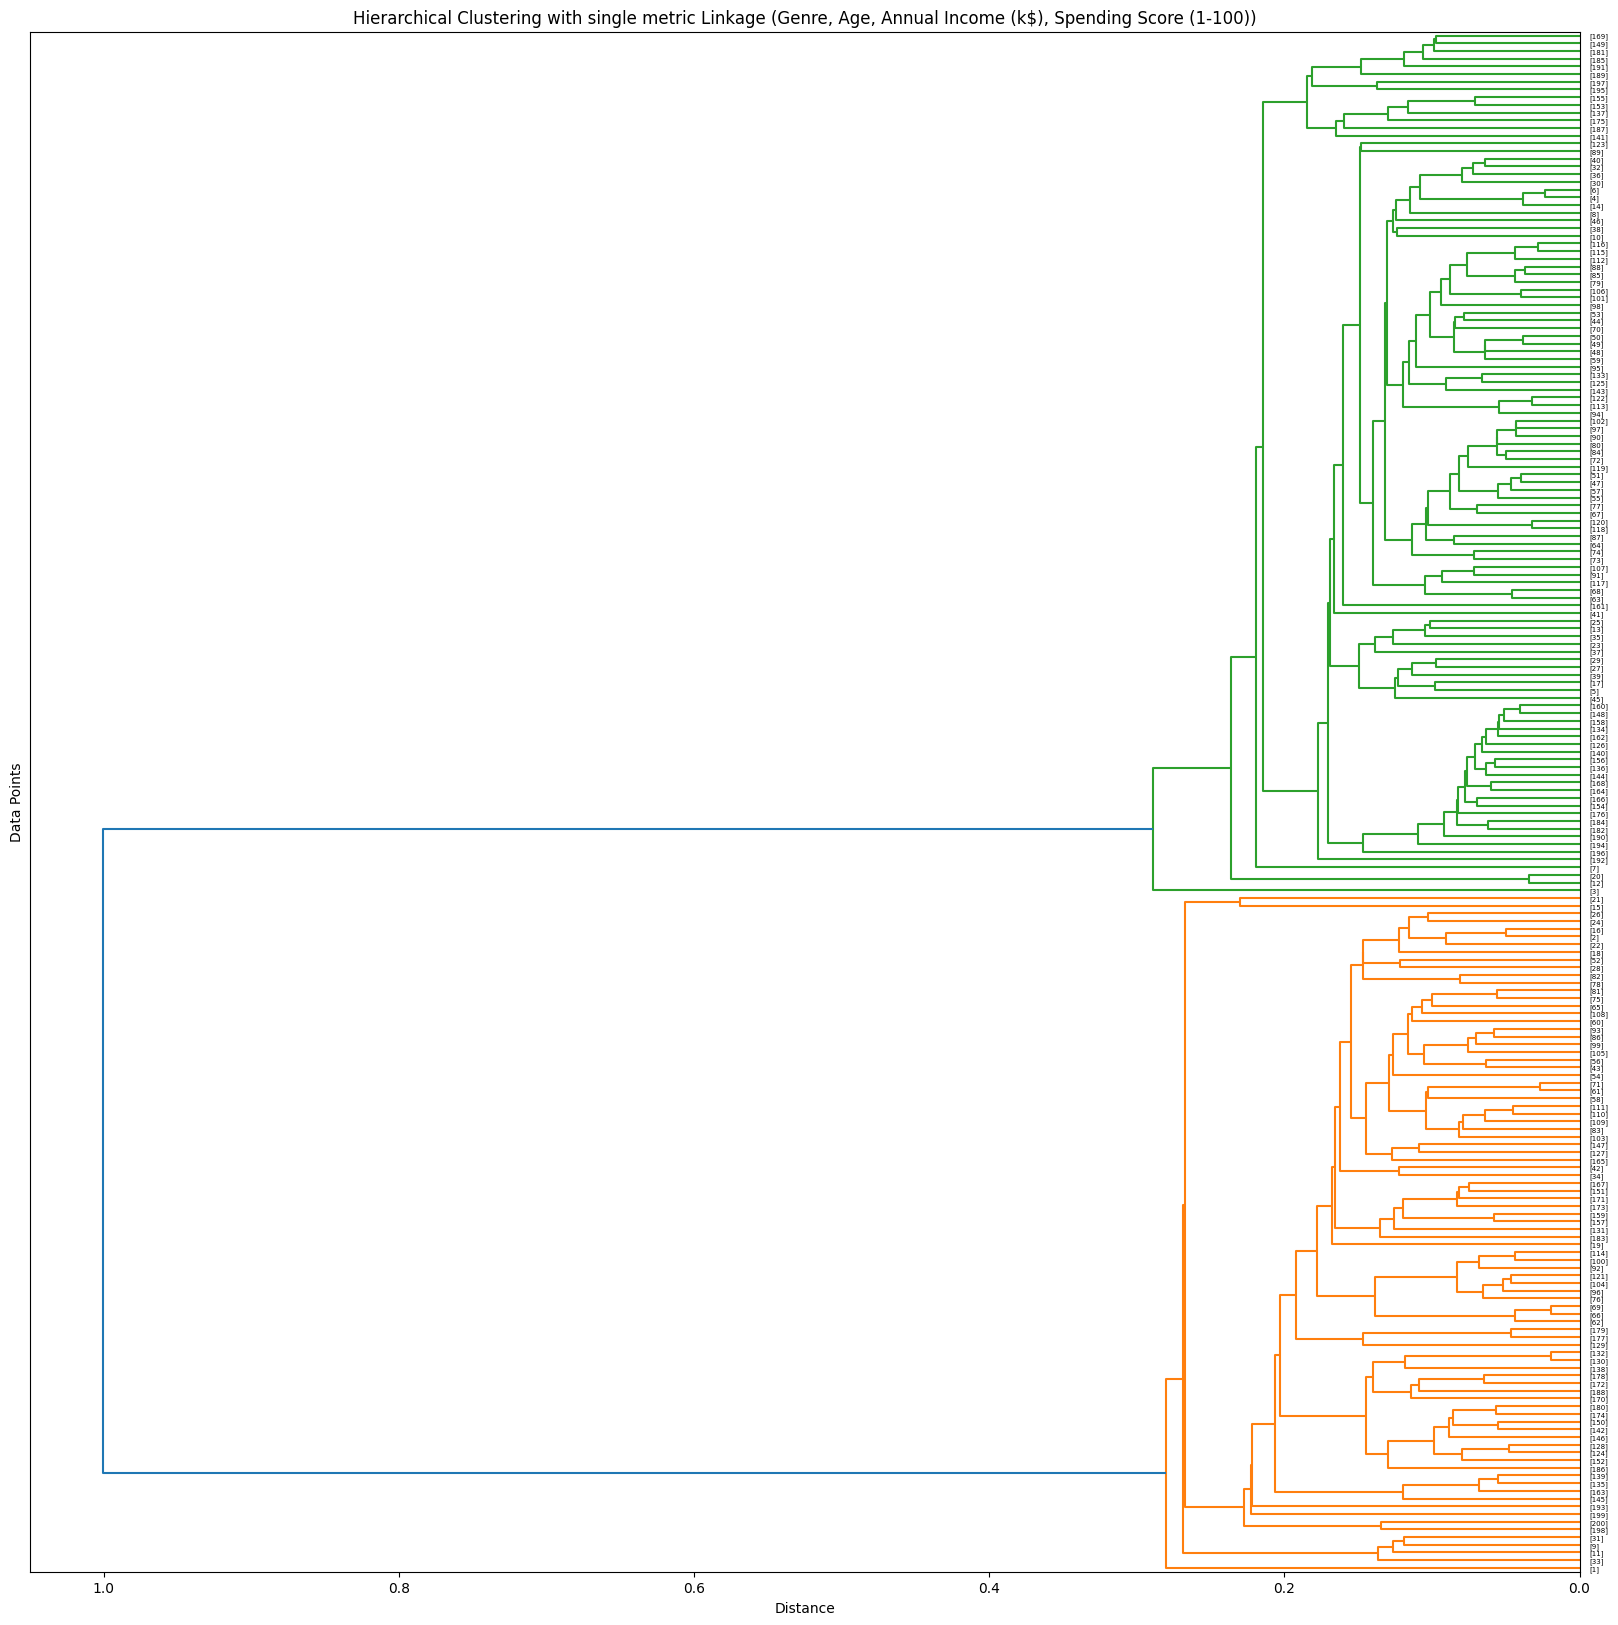

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


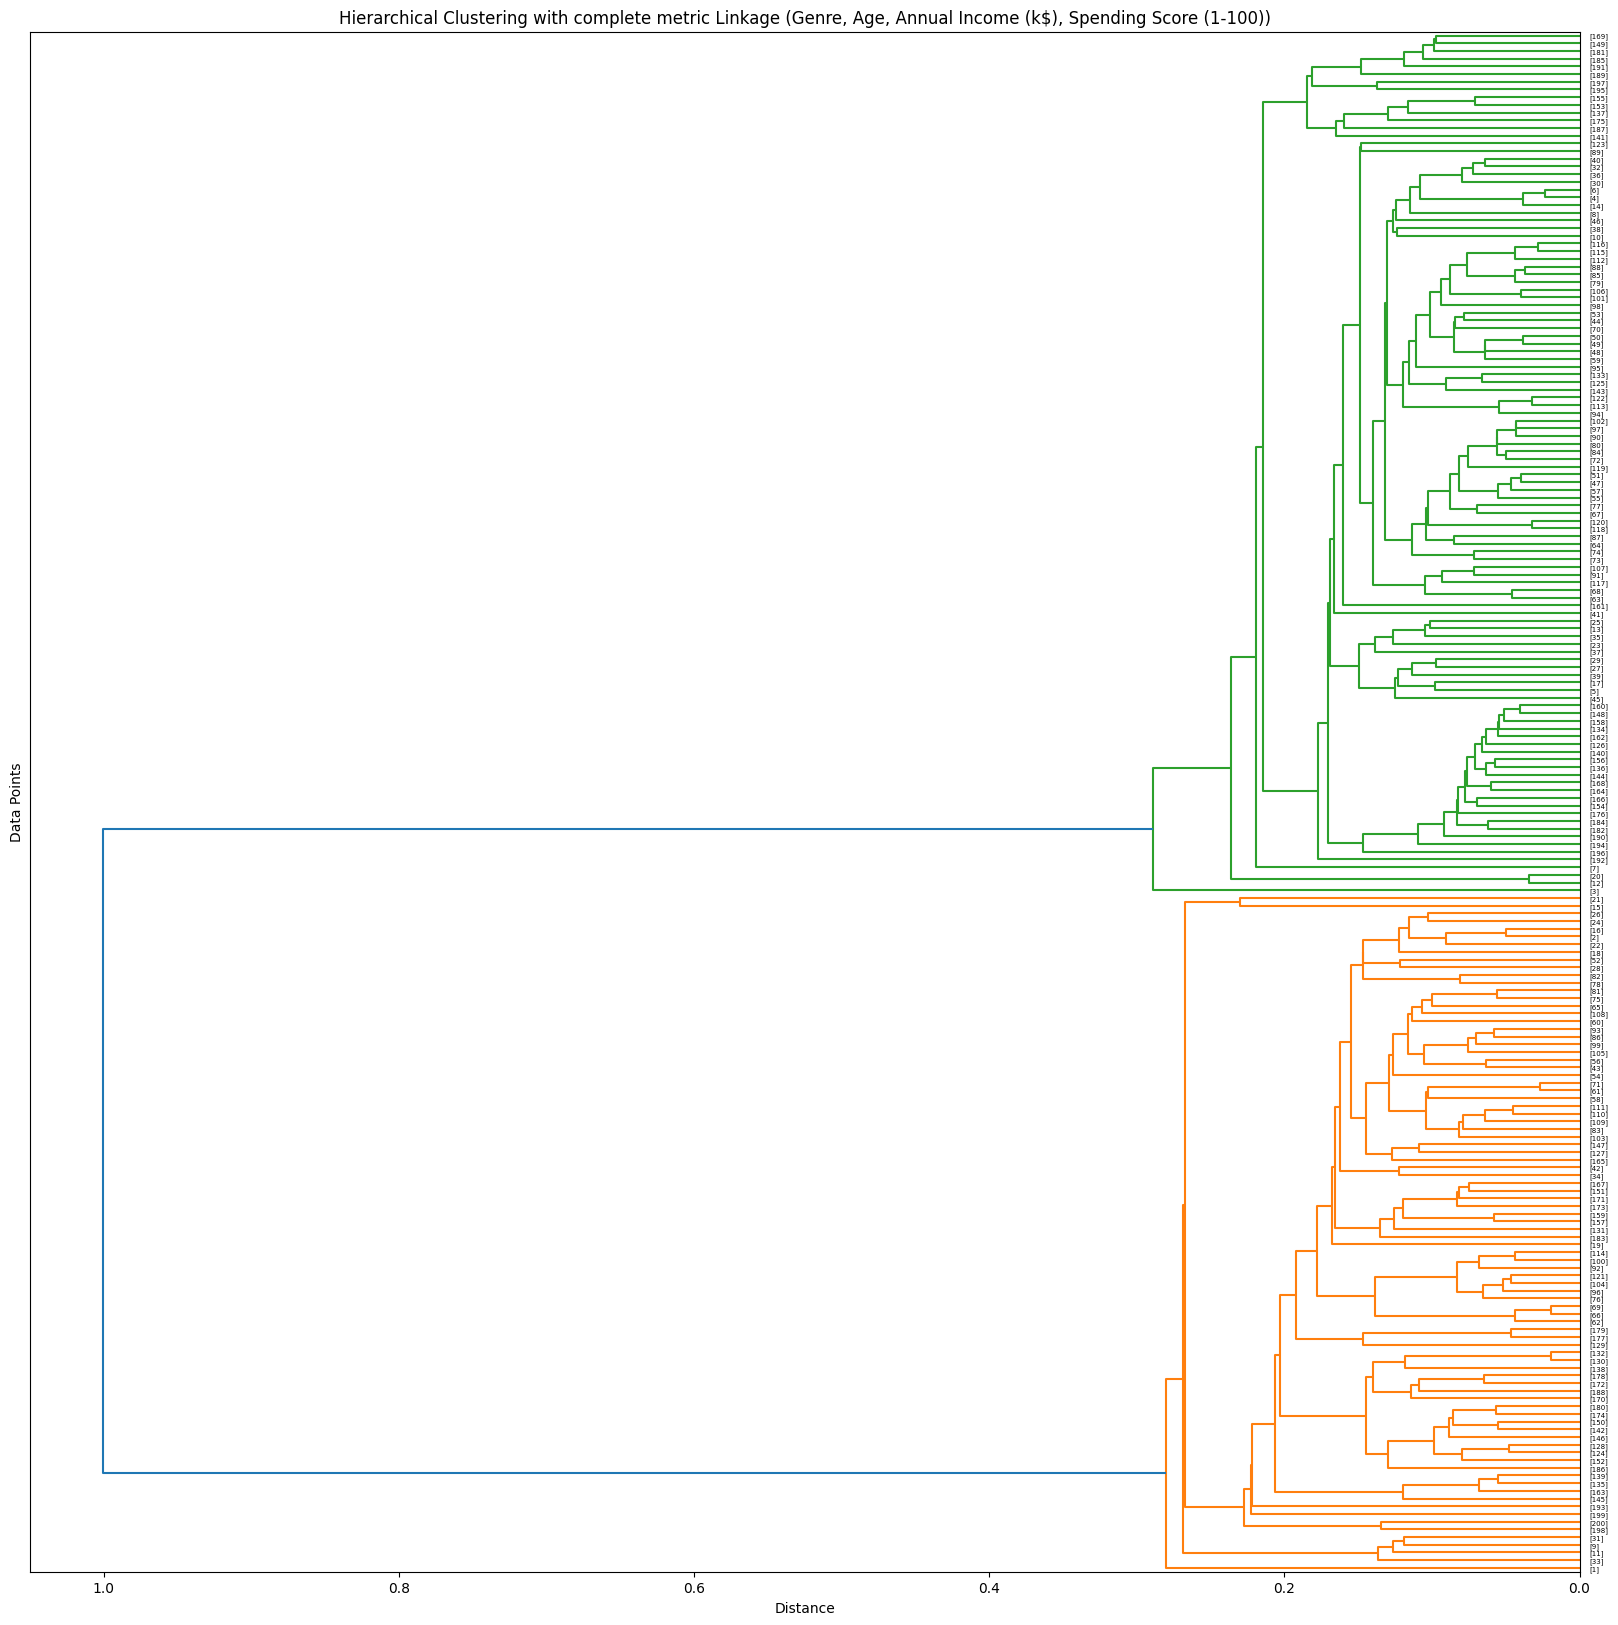

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


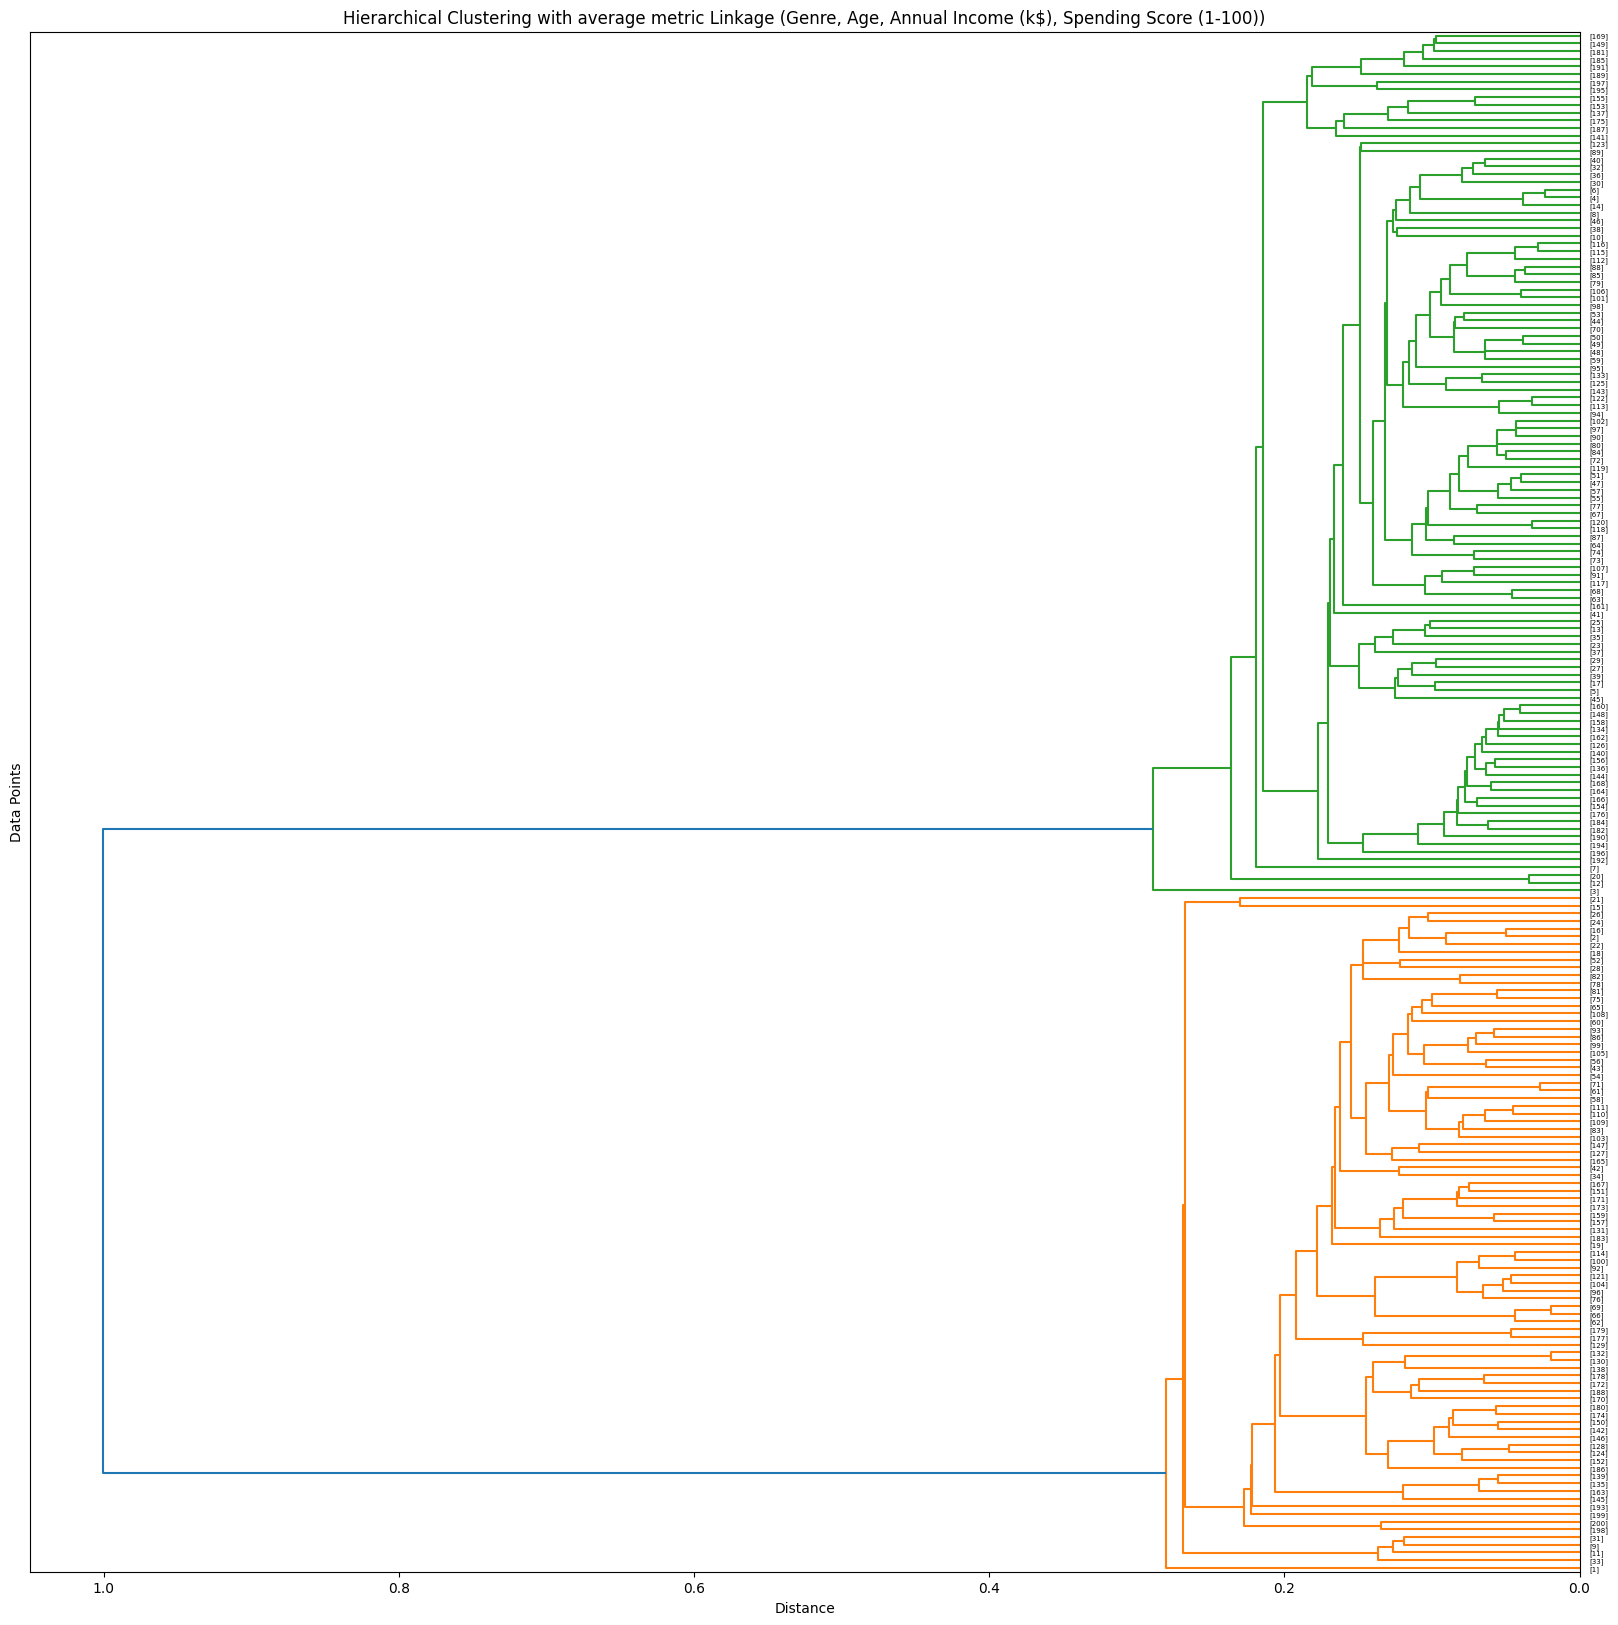

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


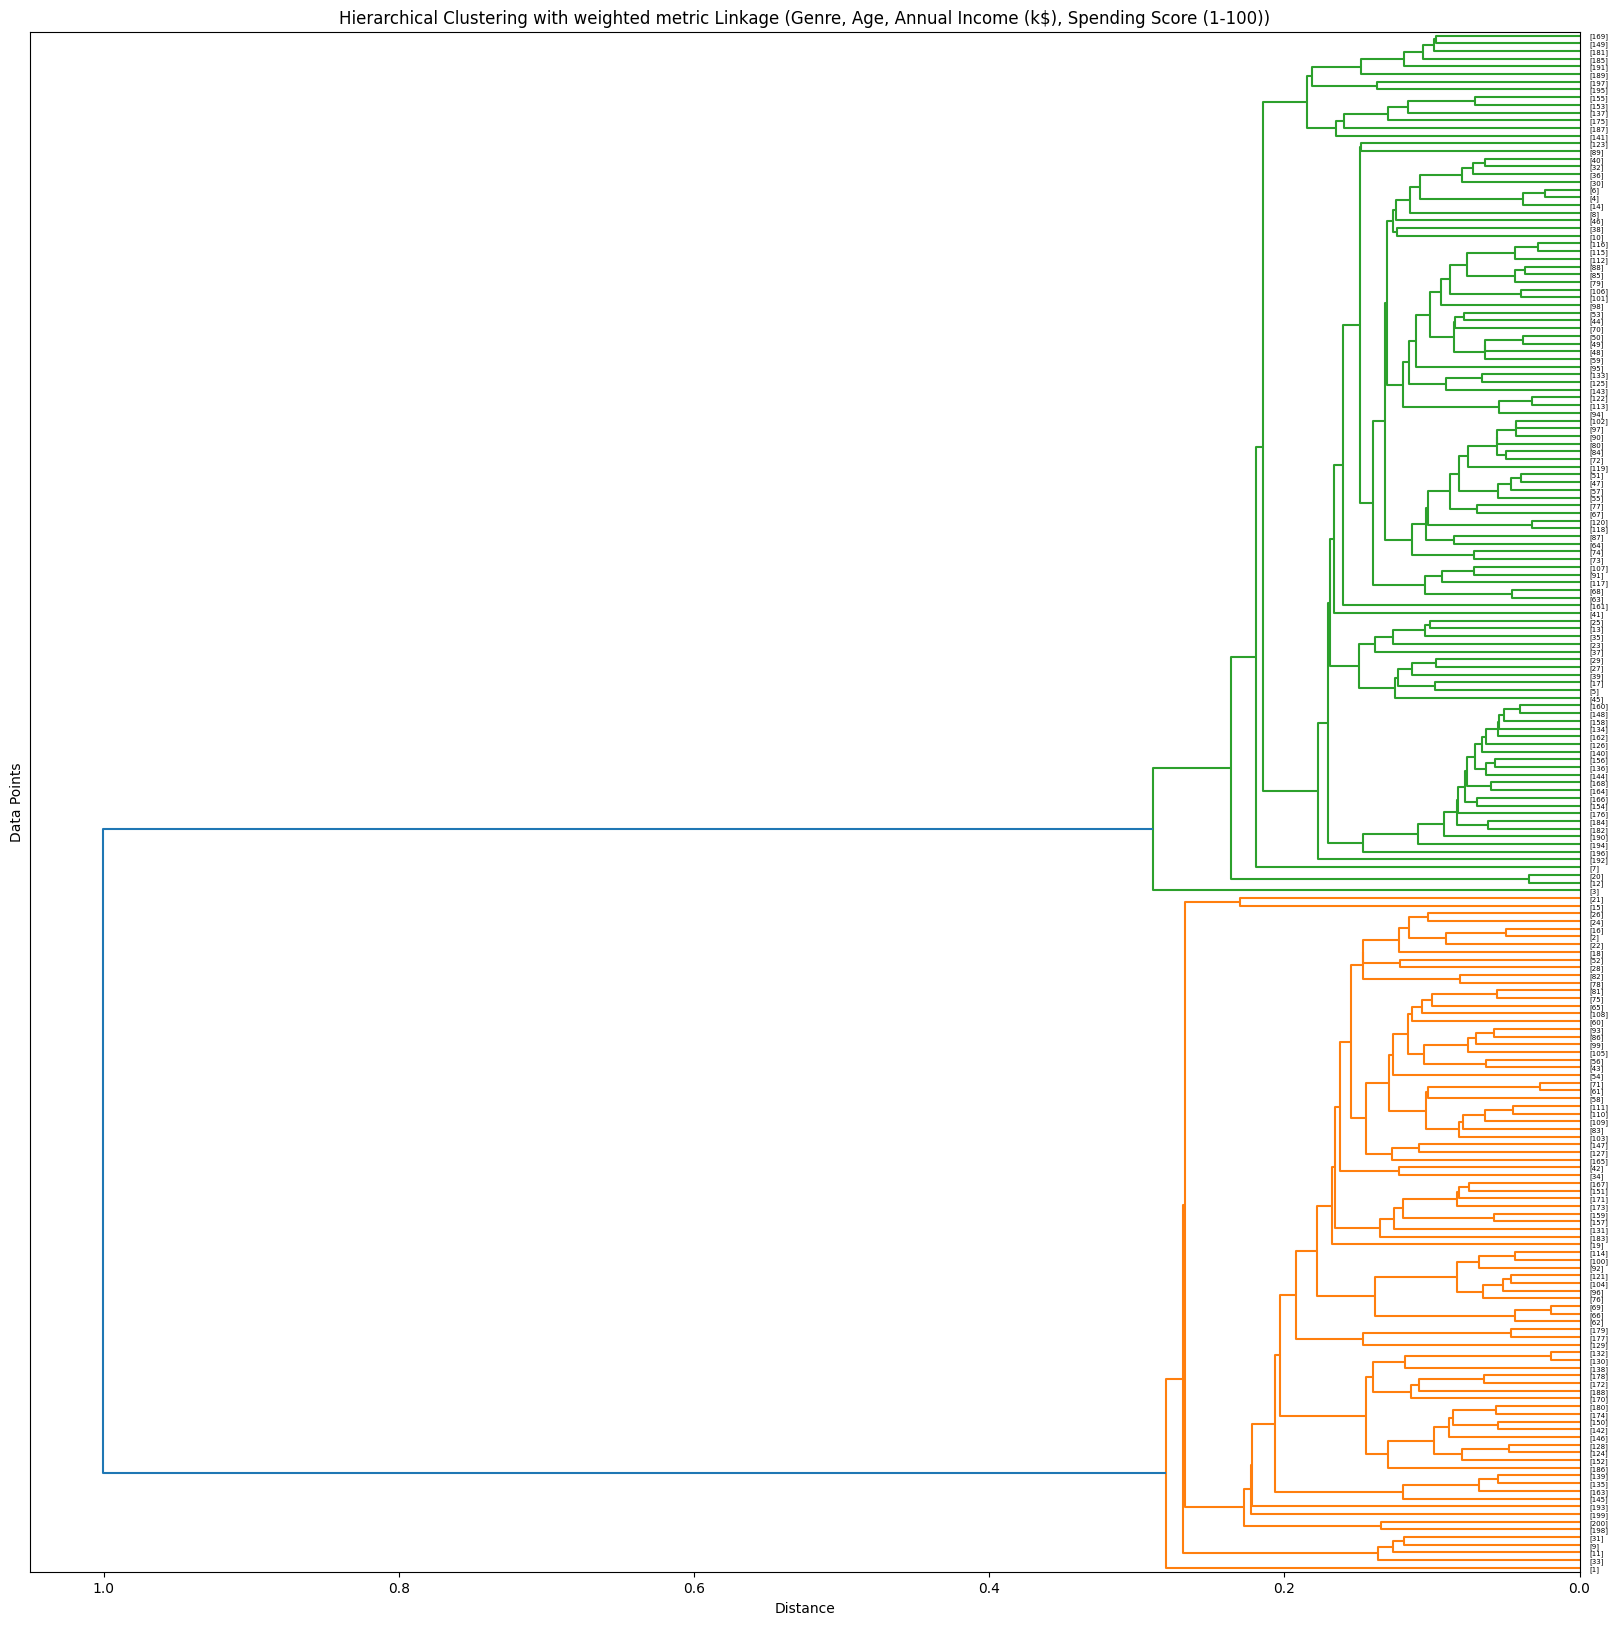

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


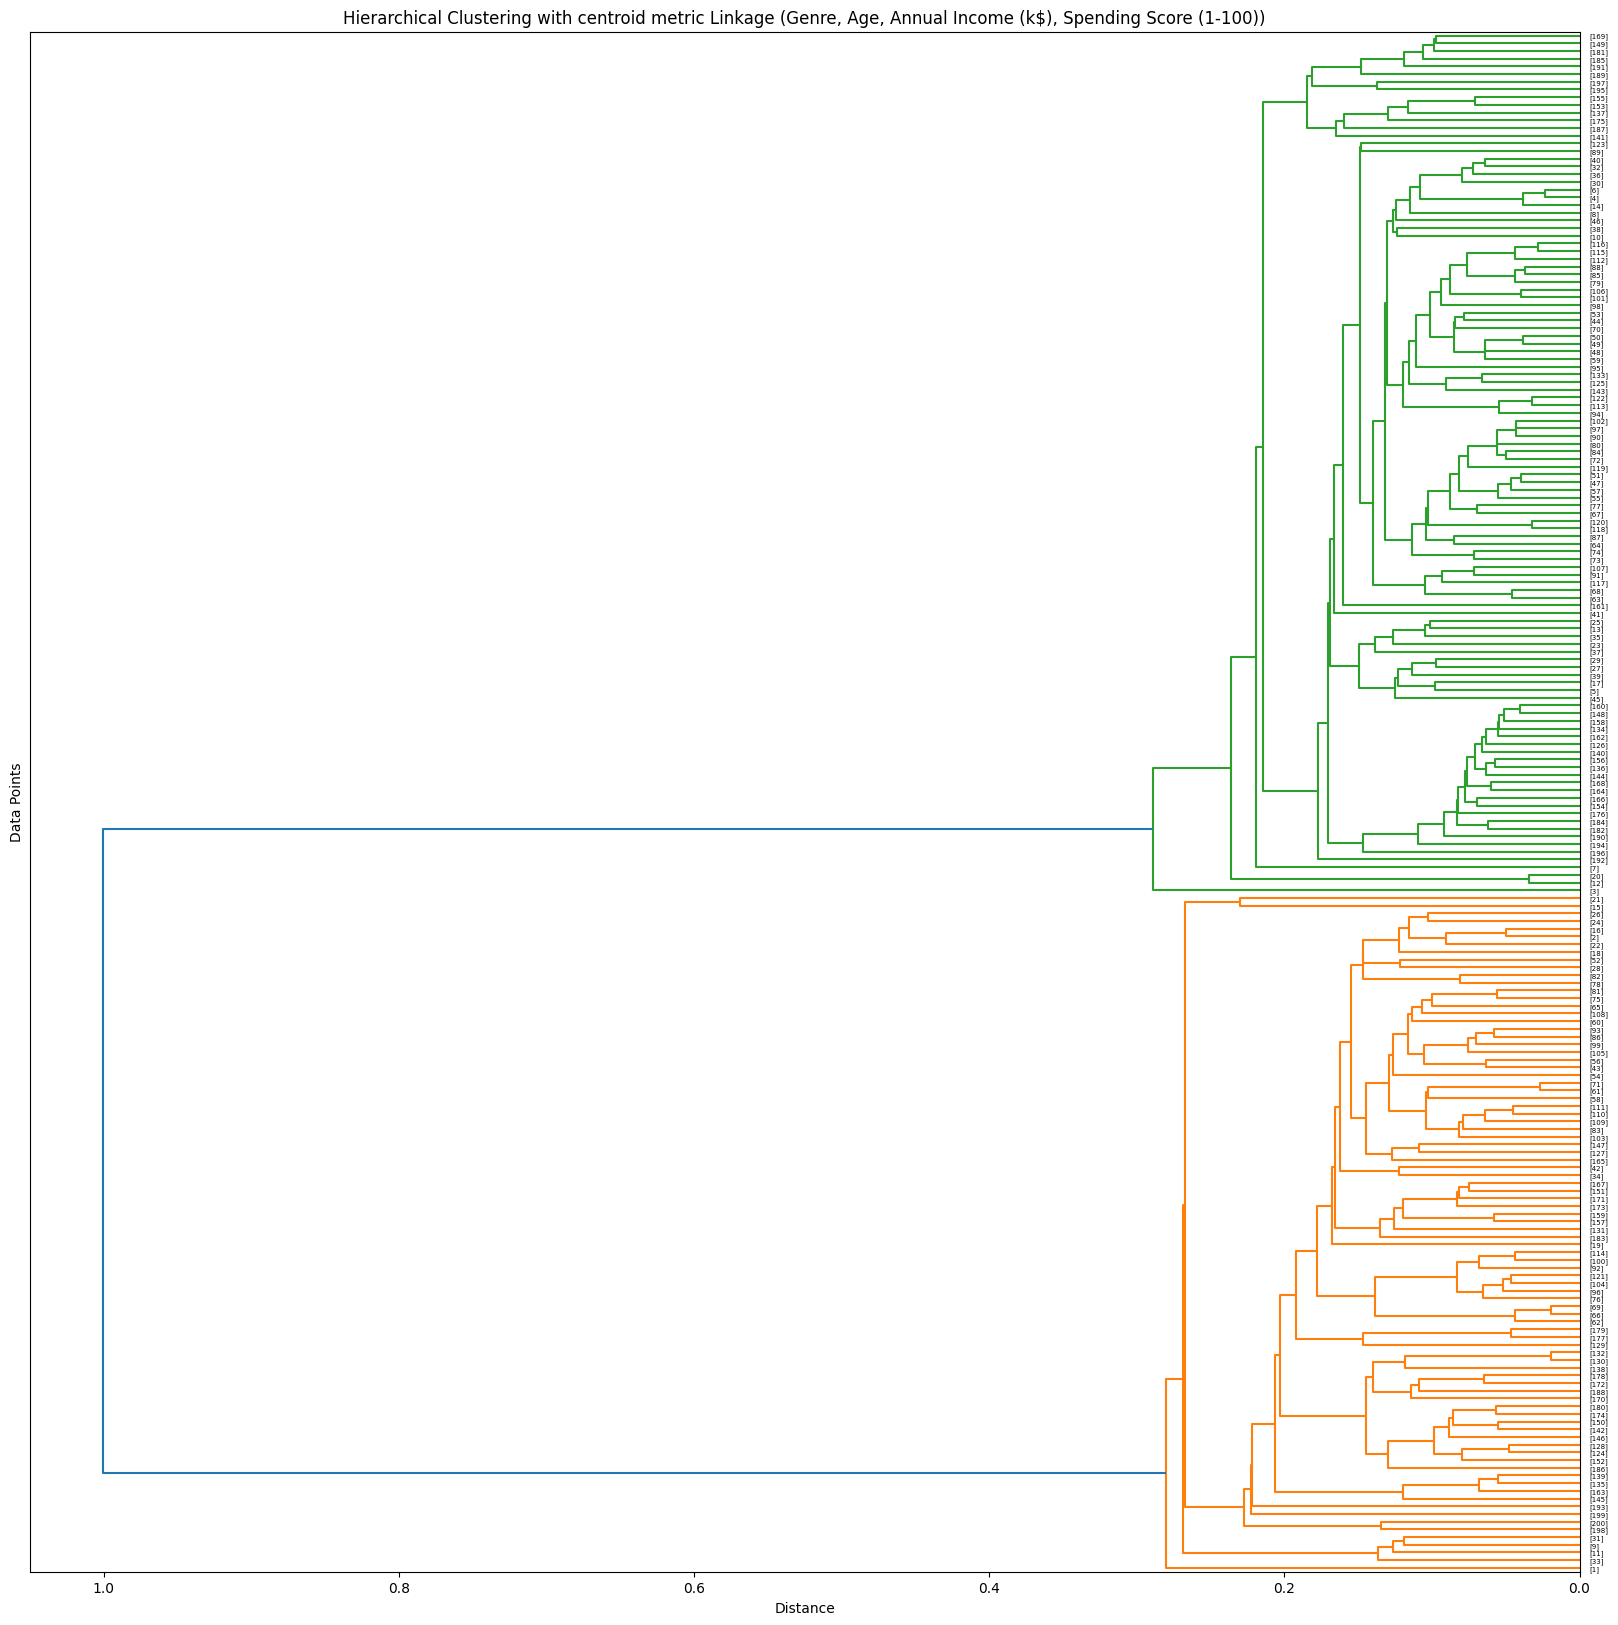

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


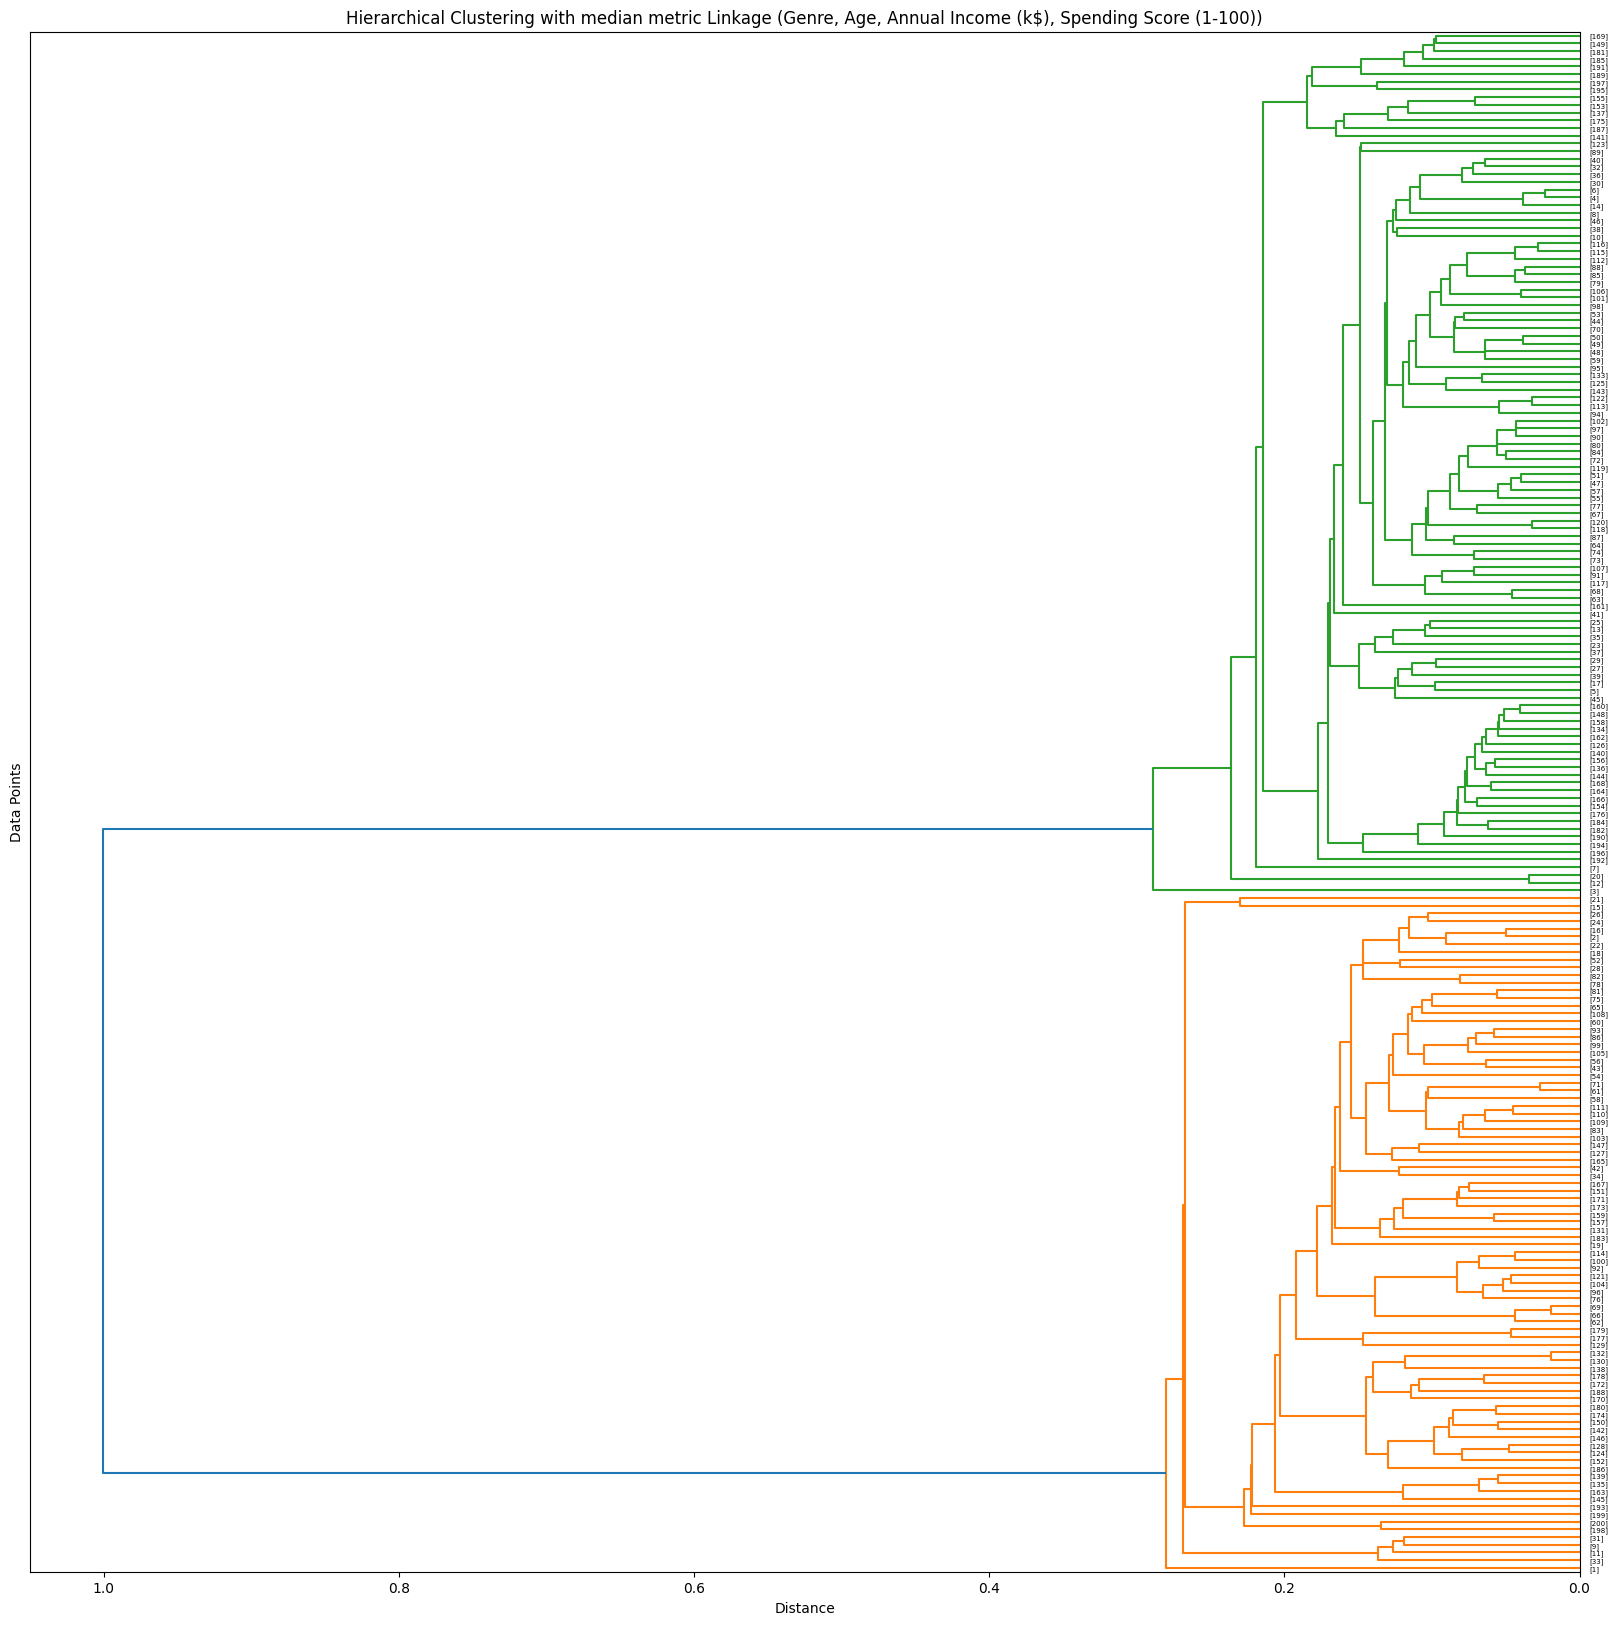

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


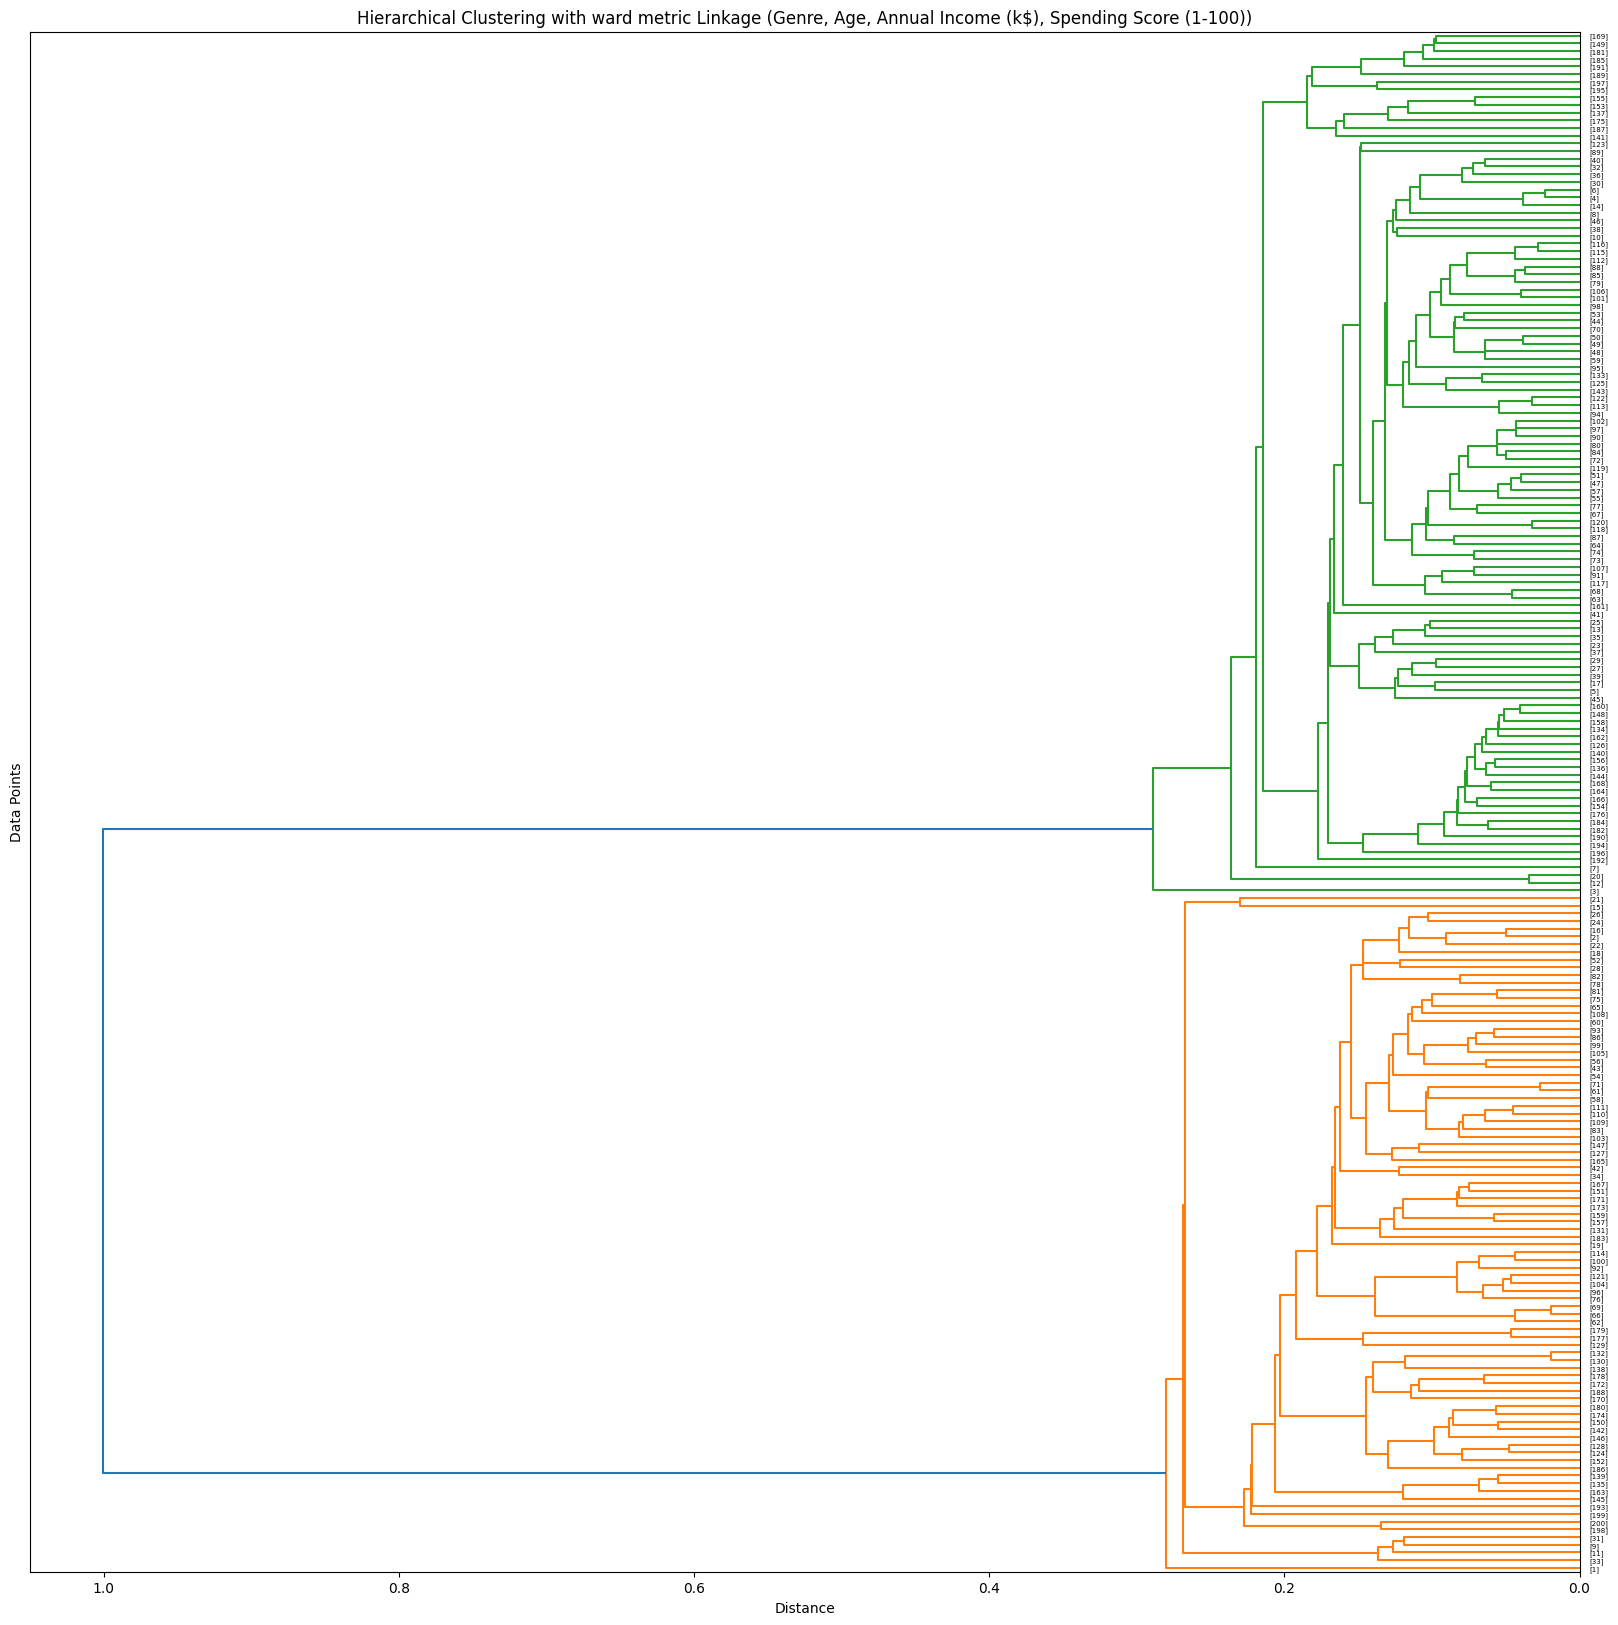

In [15]:
customer_data = pd.read_csv('new_customers.csv') # reading data 200 rows x 5 columns
# display(customer_data)
customer_data['Genre'] = np.where(customer_data['Genre'] == 'Male', 0, 1)
# scaler = StandardScaler()
# scaler.fit(customer_data)
# customer_data = scaler.transform(customer_data)
# customer_data = np.array(customer_data)
# print(customer_data[['Annual Income (k$)']].values)
# display(customer_data)
# Manually normalize selected features to the range [0, 1]
selected_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
for feature in selected_features:
    min_val = customer_data[feature].min()
    max_val = customer_data[feature].max()
    customer_data[feature] = (customer_data[feature] - min_val) / (max_val - min_val)
linkage_metrics = ['single','complete','average','weighted','centroid','median','ward']
# linkage_metrics = ['single']
feature_combinations = [['Genre','Age','Annual Income (k$)','Spending Score (1-100)']]
# feature_combinations = [['Genre'],['Age'],['Annual Income (k$)'],['Spending Score (1-100)']]
HC = Hierarchial_Clustering()
for features in feature_combinations:
    for linkage_metric in linkage_metrics:
        linkage_matrix = HC.linkages(customer_data[features].values)
        feature_str = ', '.join(features)
        title = f"Hierarchical Clustering with {linkage_metric} metric Linkage ({feature_str})"
        HC.dendrogram(linkage_matrix,customer_data[['CustomerID']].values,title)

## General Observations

- **Age-Based Segments:** Clusters exhibited distinct age-based patterns across linkage methods.

- **Gender-Based Clusters:** Gender-based clustering showed consistency due to binary values.

- **Income and Spending Score Clusters:** Income and spending score influenced cluster formation, impacting groupings based on spending behavior.

- **Linkage Methods:** Cluster shapes and sizes varied with linkage methods; Ward linkage yielded balanced clusters, while single linkage led to uneven sizes.

- **Limited Contribution of Gender:** Binary nature of "gender" led to a constrained range of values for distances, having minimal impact when combined with age, income, and spending score.

- **Scaling Impact:** Scaling continuous variables (e.g., age, income, spending score) ensured equitable distance calculation, mitigating variable dominance. However, binary "gender" had limited effect even after scaling.


## Analytical Observations

### Comparison Across Linkage Methods
```
The choice of linkage method significantly influences the resulting cluster structures. For example, Ward linkage tends to create clusters with similar sizes, while single linkage can lead to clusters of varying sizes due to its sensitivity to outliers and individual data point connections.
```
### Limited Contribution of 'Genre'
```
The 'Genre' feature, being binary (0 or 1), contributes minimally to distance calculations when combined with continuous variables like 'Age,' 'Annual Income,' and 'Spending Score.' Its binary nature limits the range of values, which may not strongly impact the formation of clusters compared to the more continuous and varied features.
```
### Impact of Scaling
```
Scaling or normalizing continuous variables such as 'Age,' 'Annual Income,' and 'Spending Score' is crucial for hierarchical clustering. Scaling ensures that each of these features has a proportional influence on distance calculations, preventing any single variable from dominating the clustering process. However, the binary nature of 'Genre' may still have limited impact on distances even after scaling due to its fixed range.
```
## The Importance of Normalization in Data Analysis and Clustering
```
Normalization is a critical step in data preprocessing and clustering:

- It standardizes features to a common scale, ensuring that each feature contributes proportionally to the distance calculations during clustering.
- Normalization is particularly essential when dealing with features that have different units or magnitudes, preventing one feature from overpowering the clustering results.
- In hierarchical clustering, normalization leads to more accurate and unbiased dendrograms, as it allows for a fair comparison of feature contributions.
```
## Impact of Normalization on Dendrograms
```
Normalization has a significant impact on the structure and interpretation of dendrograms:

- Normalized data results in dendrograms that better reflect the true relationships and dissimilarities between data points.
- It prevents features with larger scales from dominating the clustering process and provides a more balanced representation.
- Dendrograms based on normalized data are more meaningful and help uncover the underlying patterns in the data.
```
## Dimensionality Reduction
```
PCA (Principal Component Analysis) is a dimensionality reduction technique that can be applied to datasets with multiple features, including 'Age,' 'Annual Income,' and 'Spending Score':

- PCA reduces the dimensionality of the data while retaining most of the variation in the original features.
- Visualizing the dendrogram after applying PCA allows for an assessment of how well the reduced-dimensional data preserves the clustering structure.
- If the reduced data still captures the same cluster relationships as the original data, it suggests that a lower-dimensional representation can be used for analysis, potentially reducing computational complexity while retaining meaningful information.
```
## General Observations

### Comparison Across Linkage Methods
```
The choice of linkage method significantly influences the resulting cluster structures. For example, Ward linkage tends to create clusters with similar sizes, while single linkage can lead to clusters of varying sizes due to its sensitivity to outliers and individual data point connections.
```
### Limited Contribution of 'Genre'
```
The 'Genre' feature, being binary (0 or 1), contributes minimally to distance calculations when combined with continuous variables like 'Age,' 'Annual Income,' and 'Spending Score.' Its binary nature limits the range of values, which may not strongly impact the formation of clusters compared to the more continuous and varied features.
```
### Impact of Scaling
```
Scaling or normalizing continuous variables such as 'Age,' 'Annual Income,' and 'Spending Score' is crucial for hierarchical clustering. Scaling ensures that each of these features has a proportional influence on distance calculations, preventing any single variable from dominating the clustering process. However, the binary nature of 'Genre' may still have limited impact on distances even after scaling due to its fixed range.
```
## The Importance of Normalization in Data Analysis and Clustering
```
Normalization is a critical step in data preprocessing and clustering:

- It standardizes features to a common scale, ensuring that each feature contributes proportionally to the distance calculations during clustering.
- Normalization is particularly essential when dealing with features that have different units or magnitudes, preventing one feature from overpowering the clustering results.
- In hierarchical clustering, normalization leads to more accurate and unbiased dendrograms, as it allows for a fair comparison of feature contributions.
```
## Impact of Normalization on Dendrograms
```
Normalization has a significant impact on the structure and interpretation of dendrograms:

- Normalized data results in dendrograms that better reflect the true relationships and dissimilarities between data points.
- It prevents features with larger scales from dominating the clustering process and provides a more balanced representation.
- Dendrograms based on normalized data are more meaningful and help uncover the underlying patterns in the data.
```
## Dimensionality Reduction
```
PCA (Principal Component Analysis) is a dimensionality reduction technique that can be applied to datasets with multiple features, including 'Age,' 'Annual Income,' and 'Spending Score':

- PCA reduces the dimensionality of the data while retaining most of the variation in the original features.
- Visualizing the dendrogram after applying PCA allows for an assessment of how well the reduced-dimensional data preserves the clustering structure.
- If the reduced data still captures the same cluster relationships as the original data, it suggests that a lower-dimensional representation can be used for analysis, potentially reducing computational complexity while retaining meaningful information.
```

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


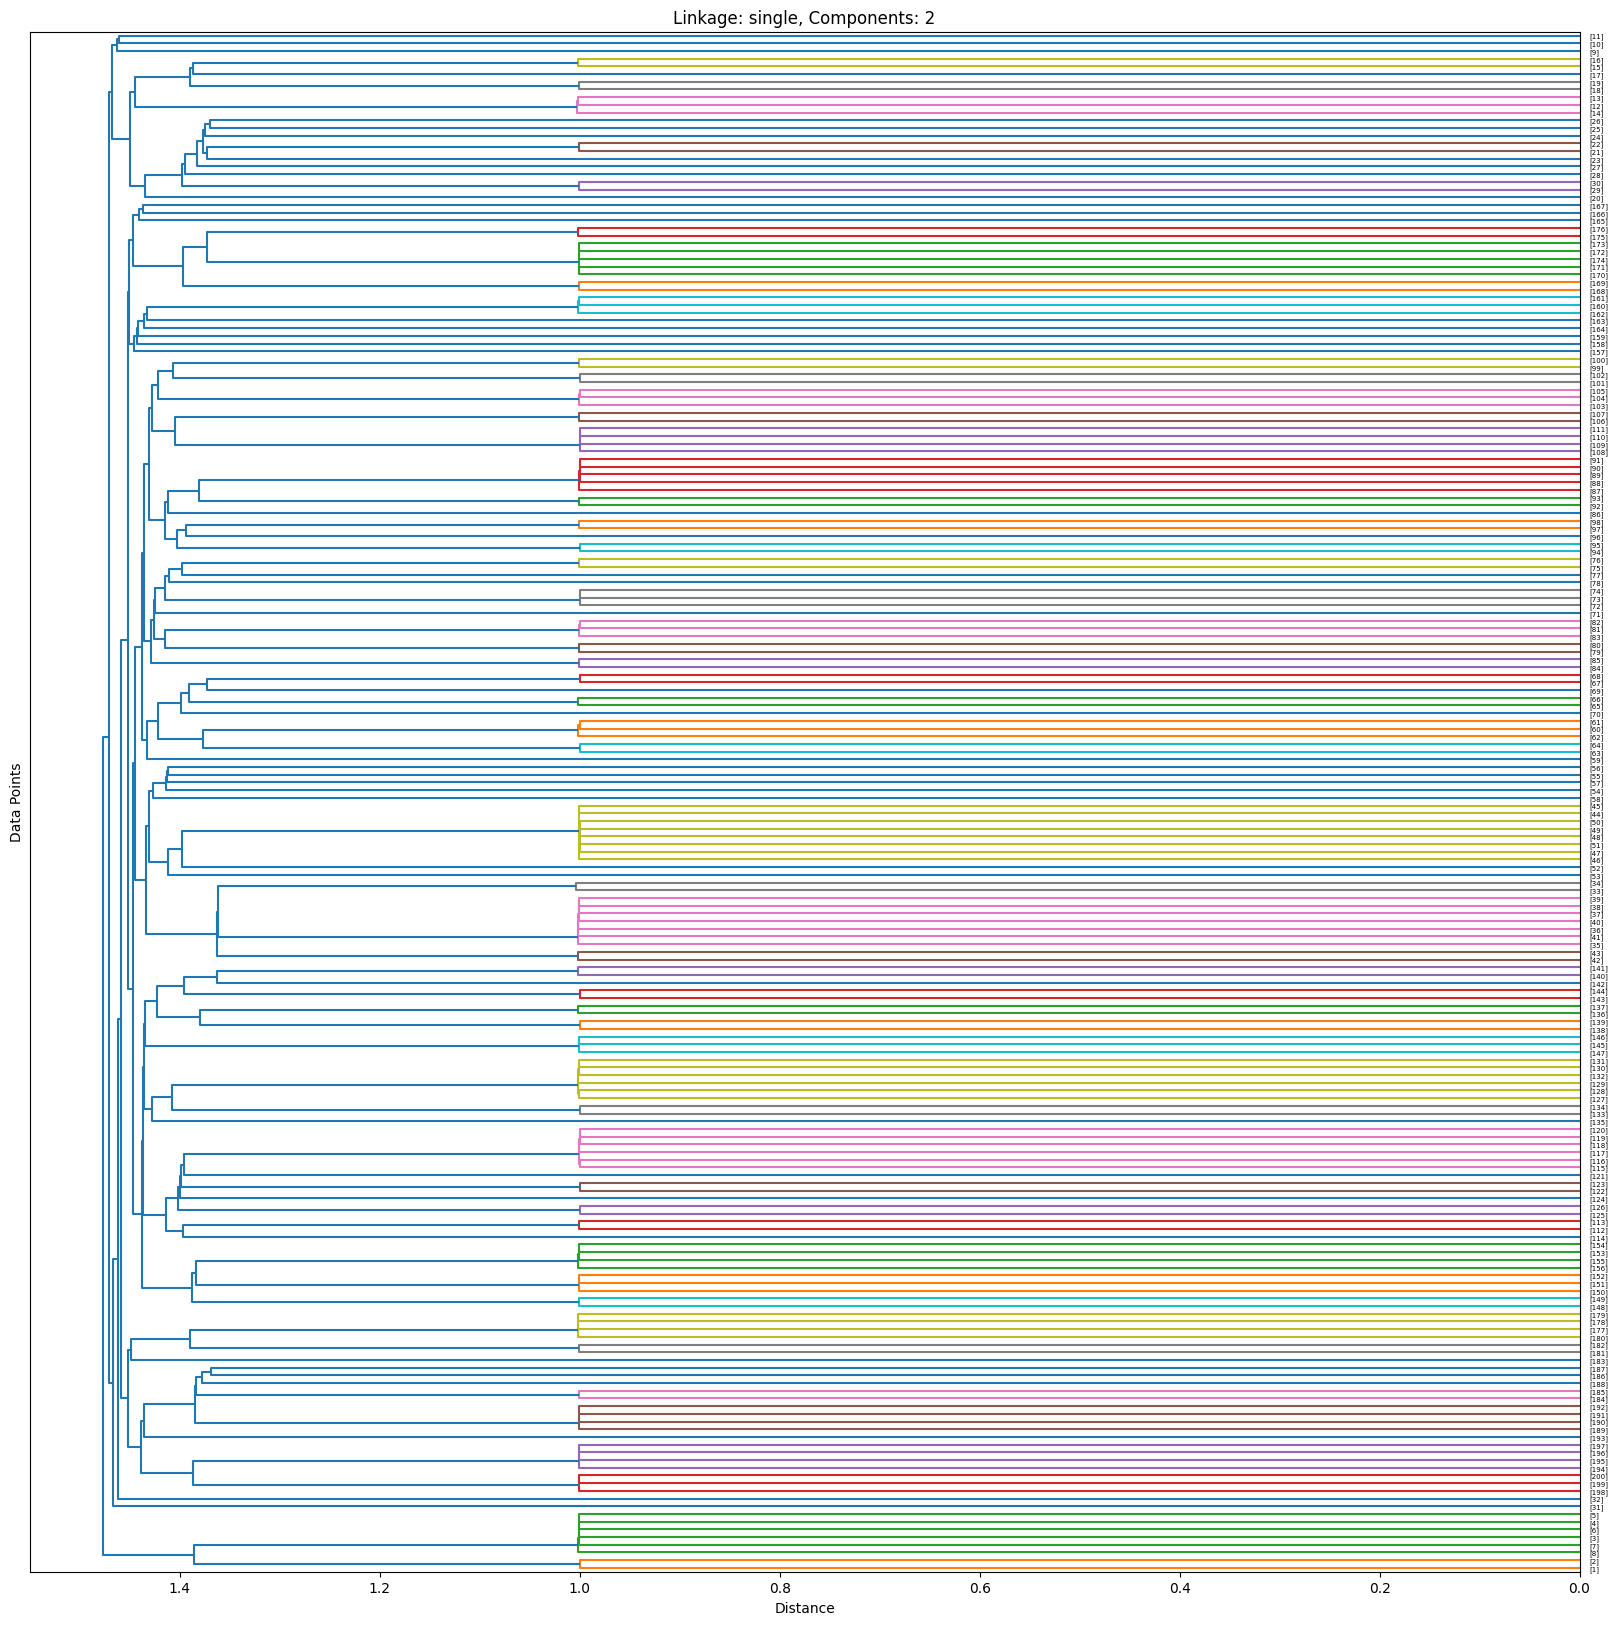

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


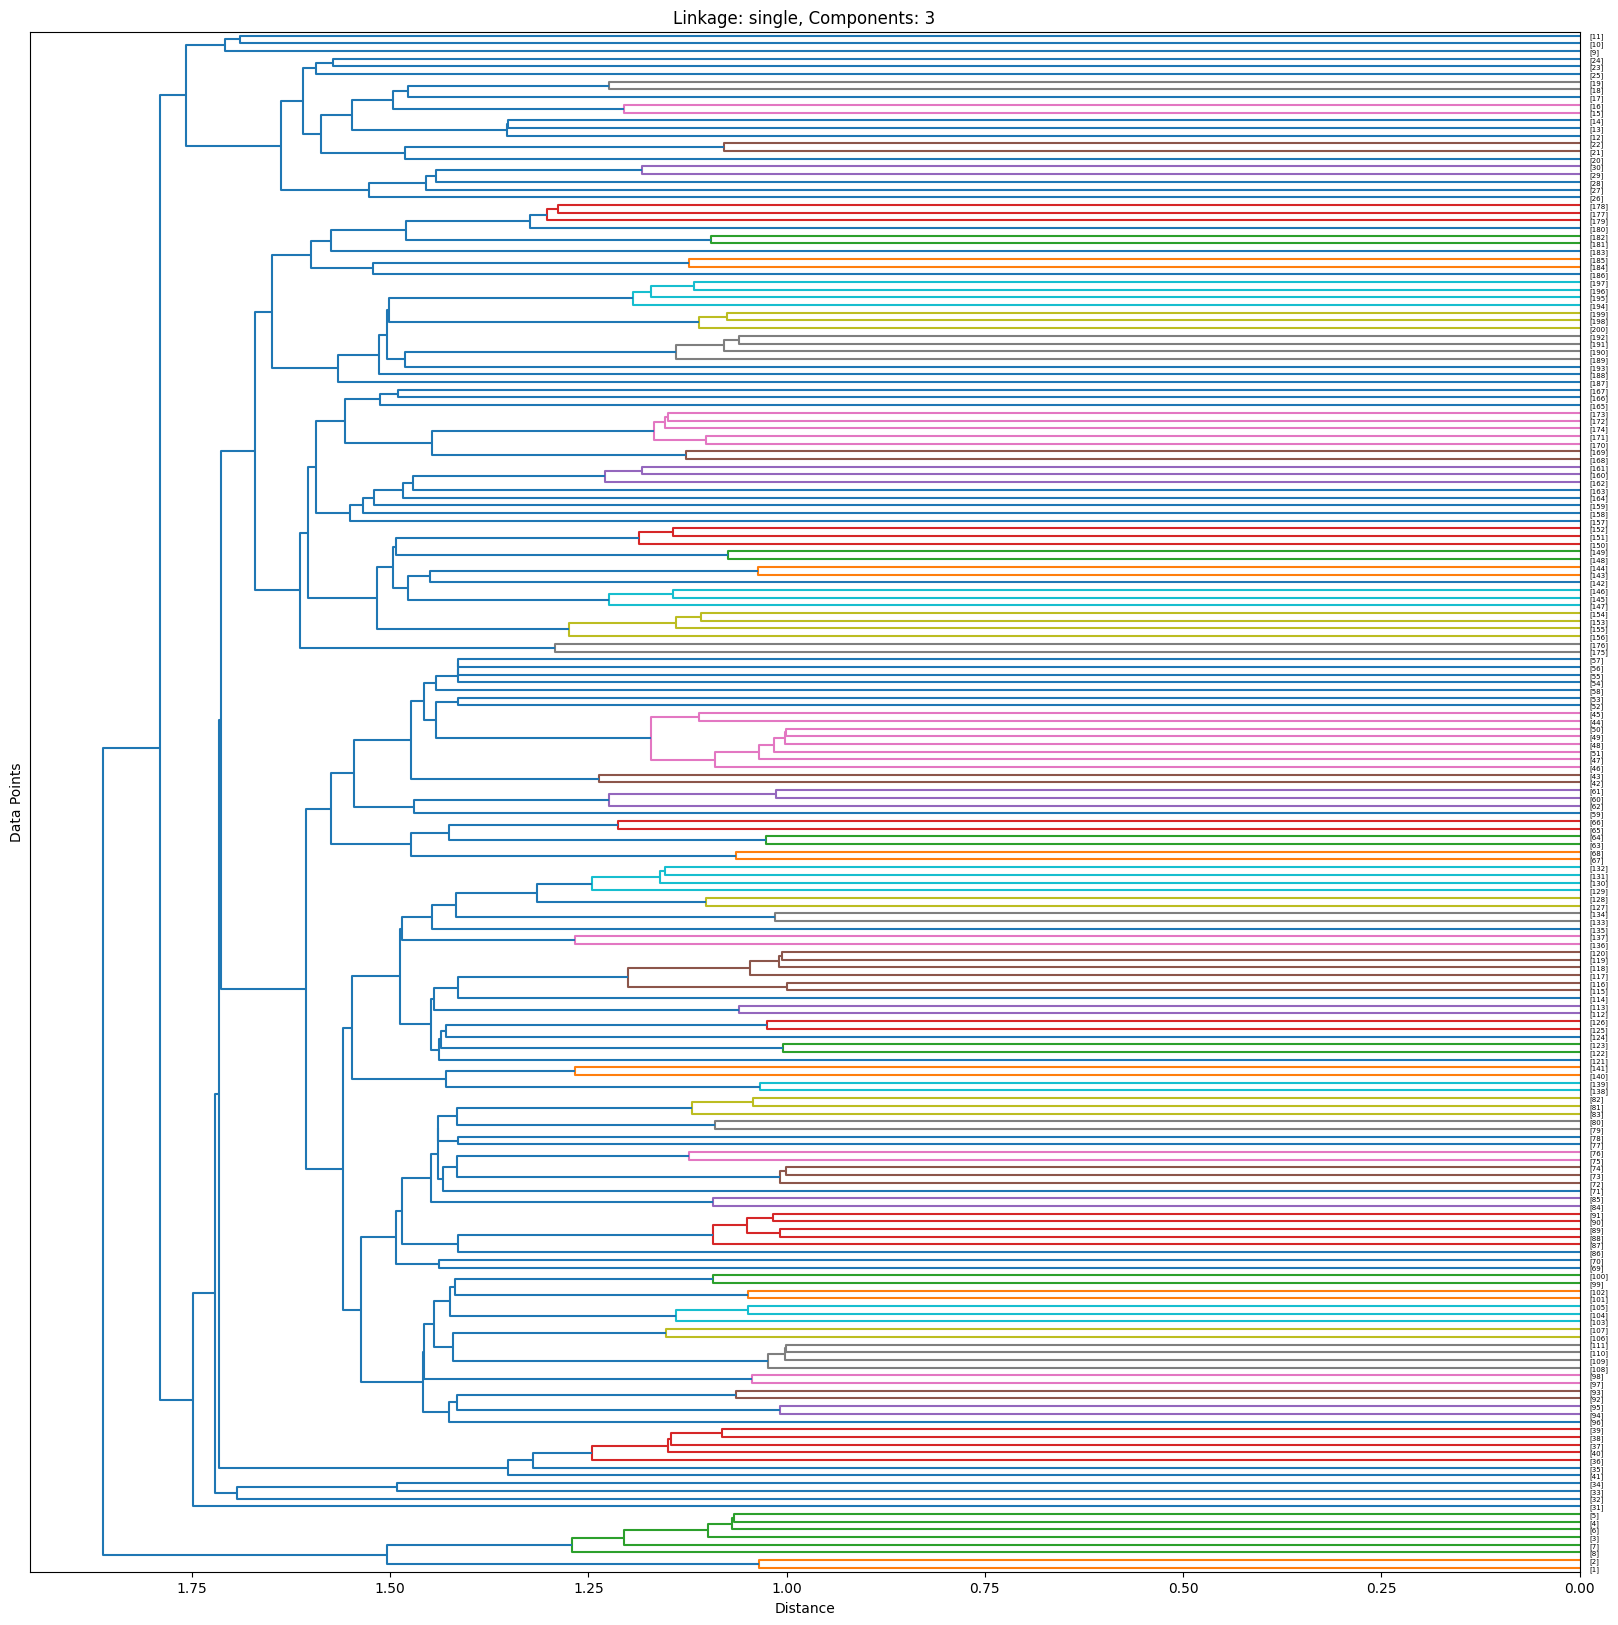

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


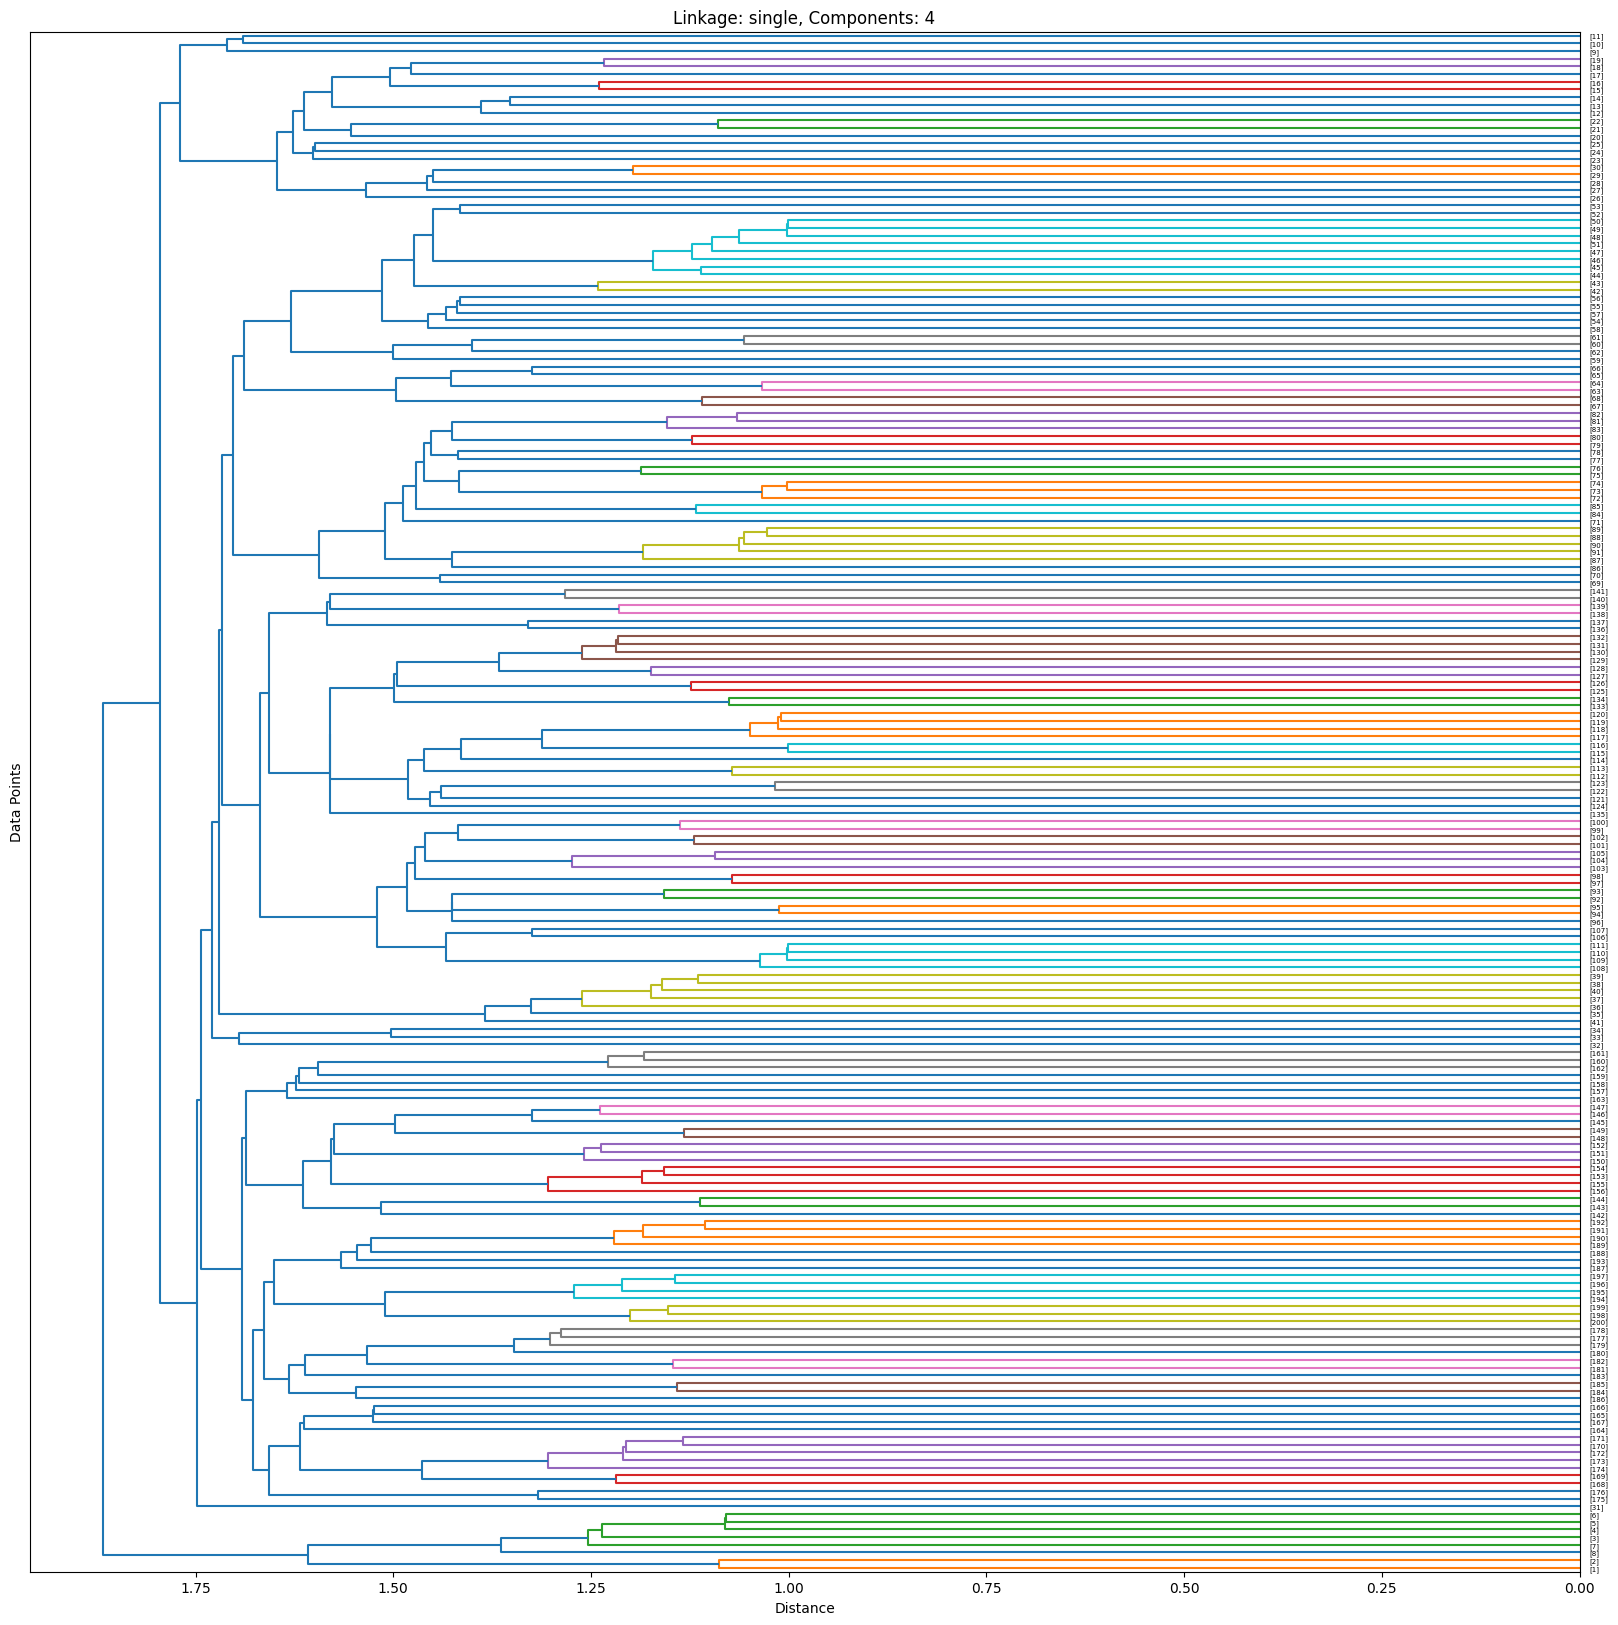

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


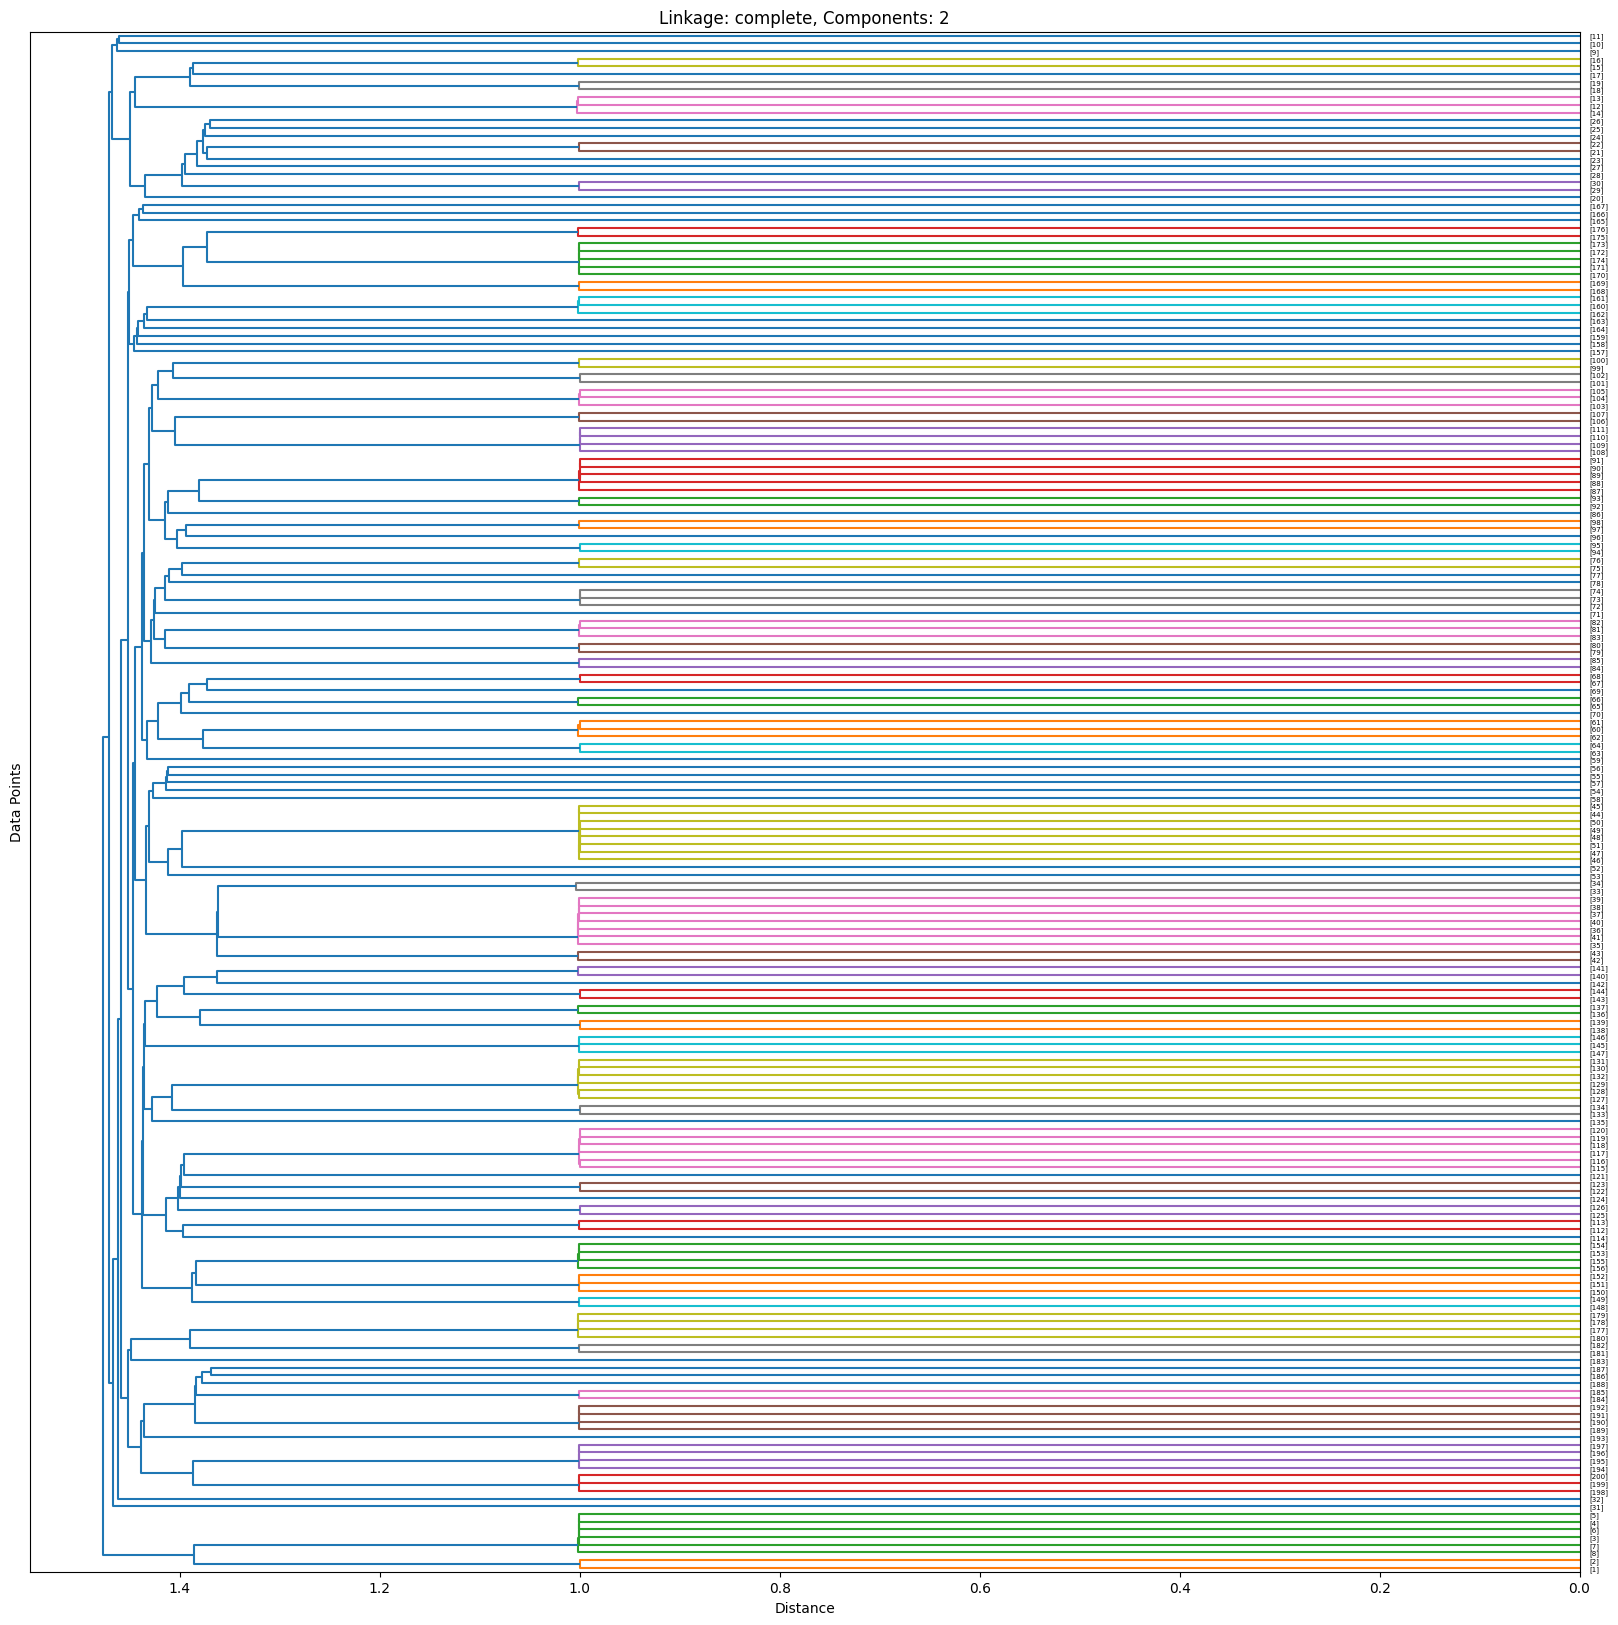

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


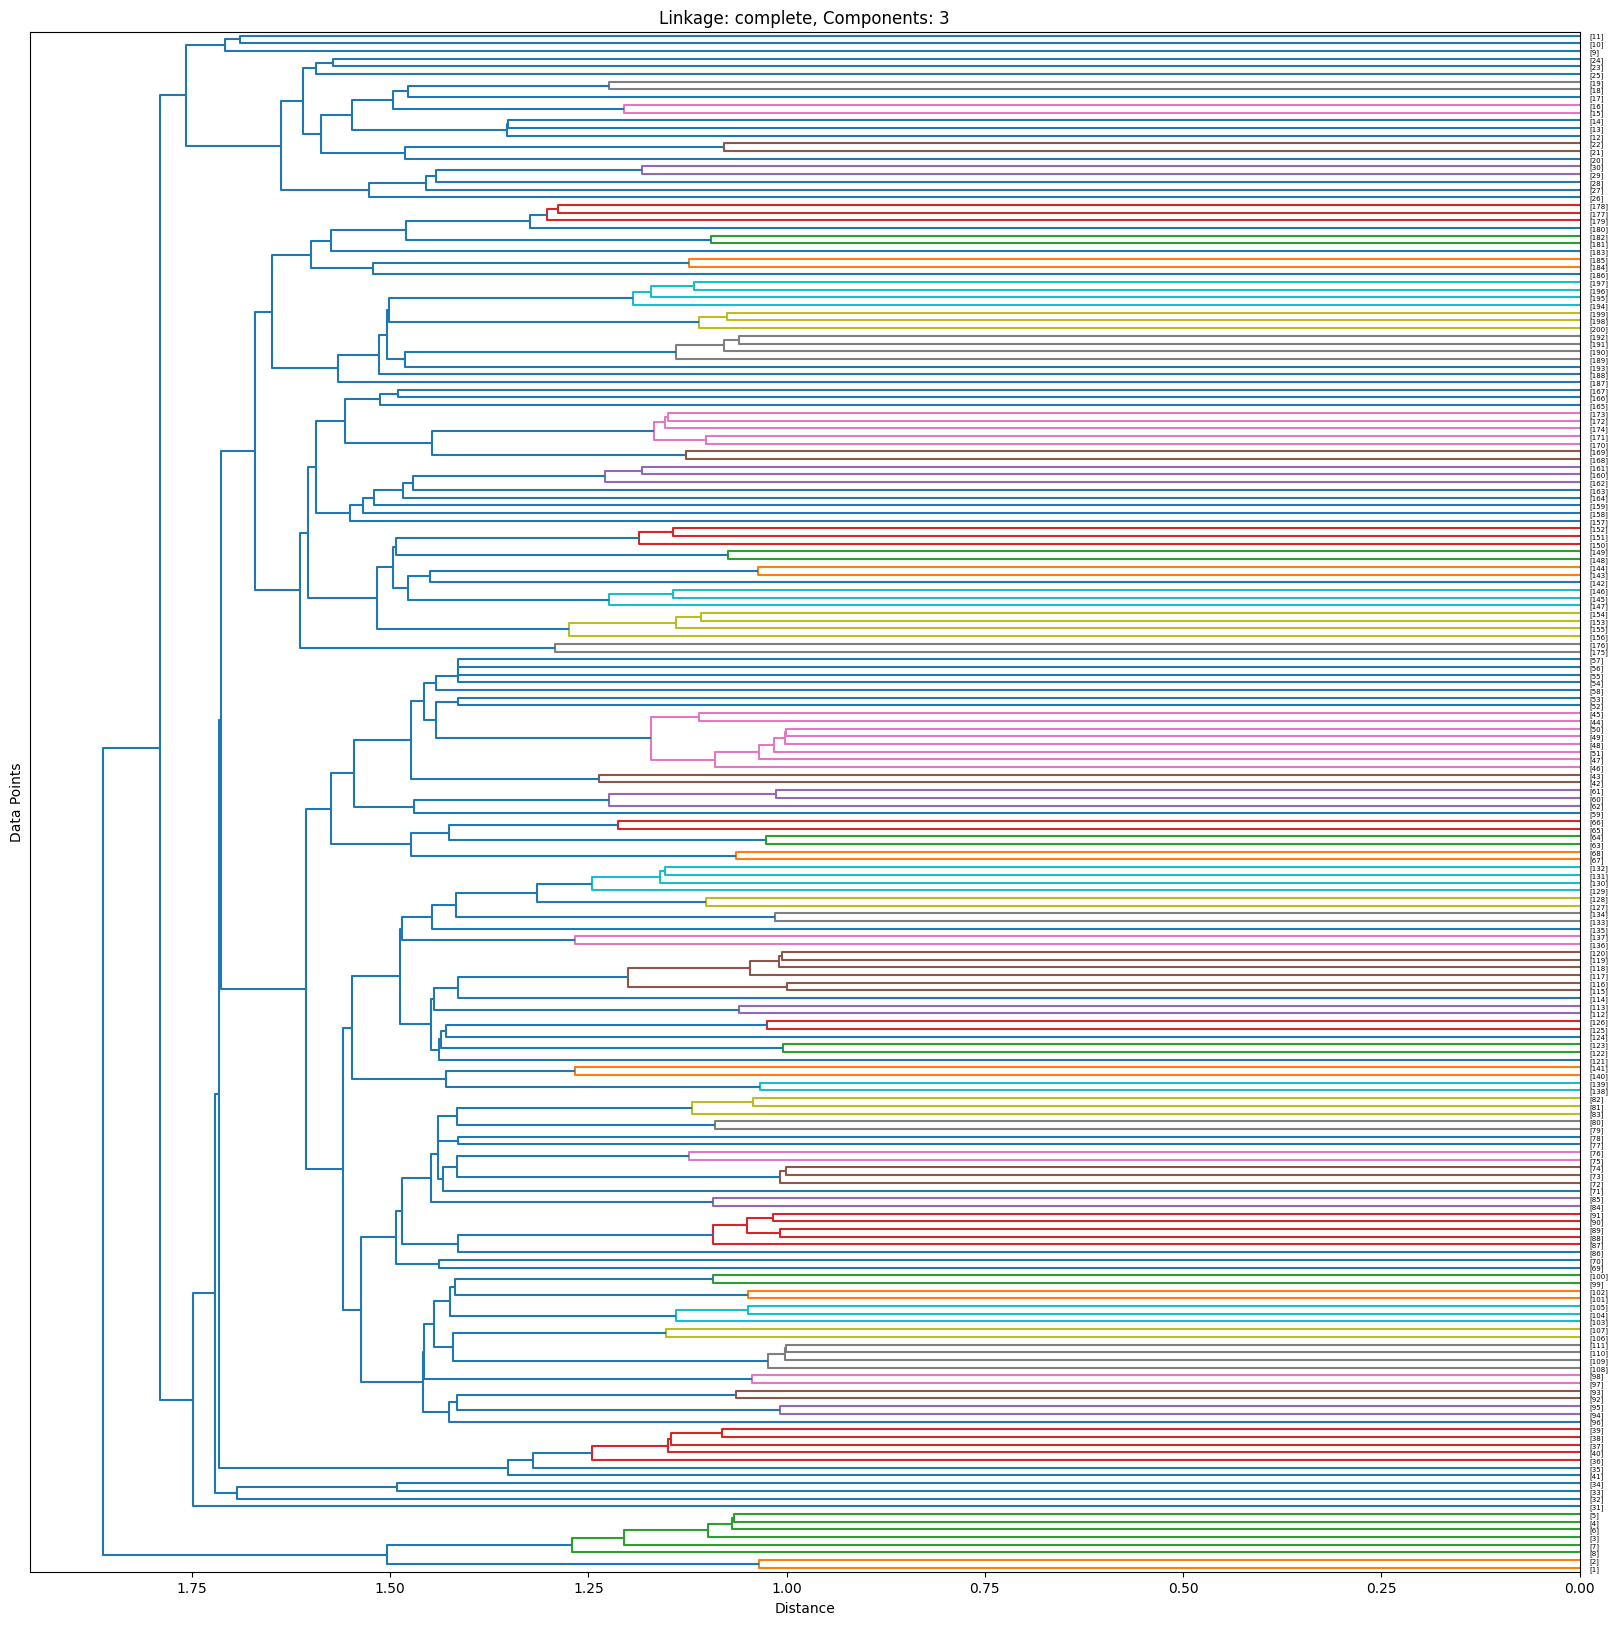

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


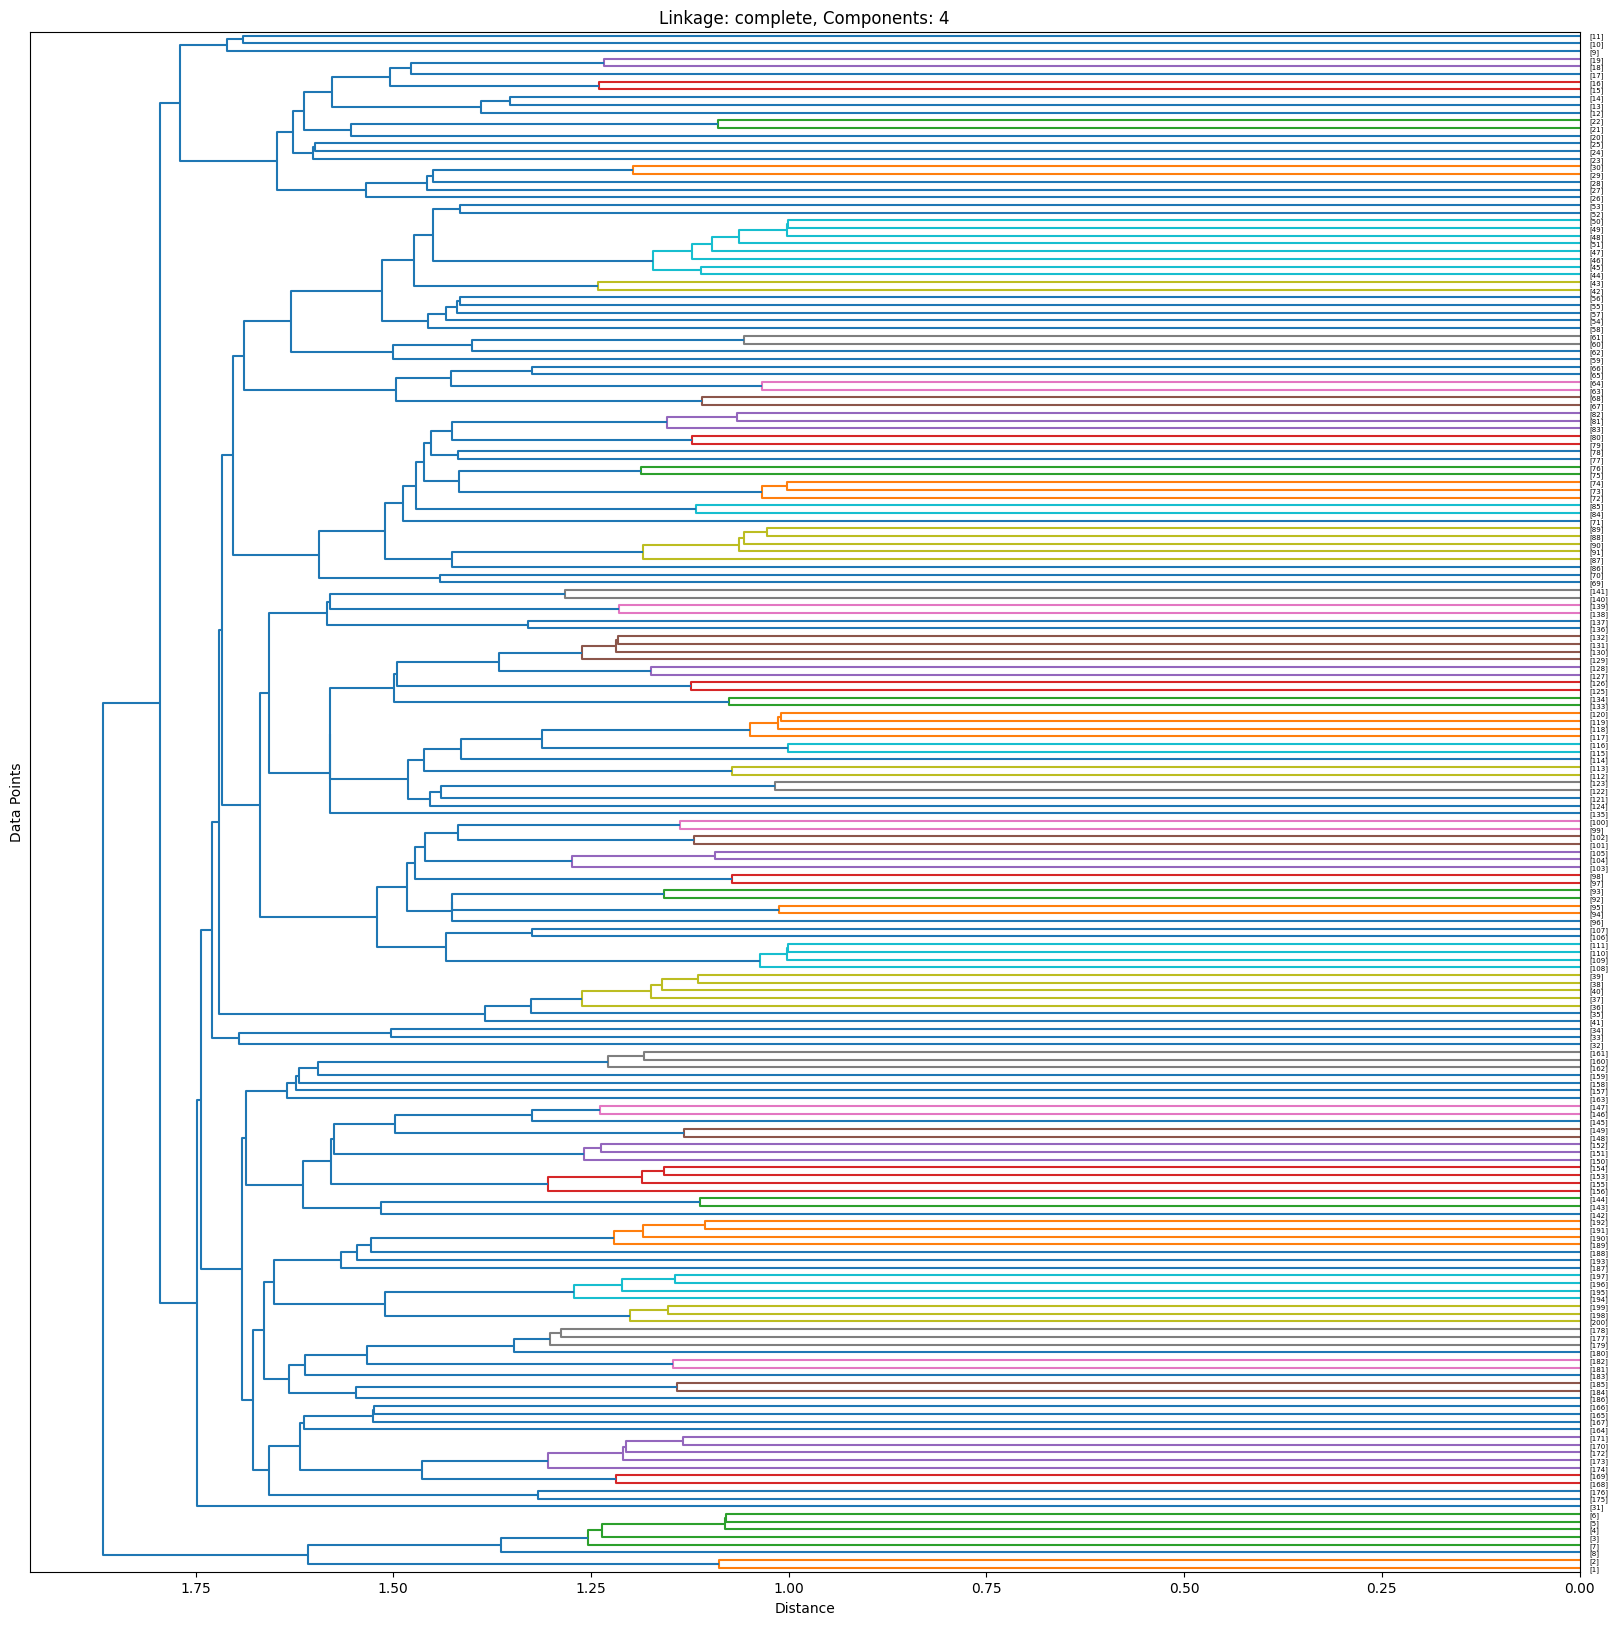

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


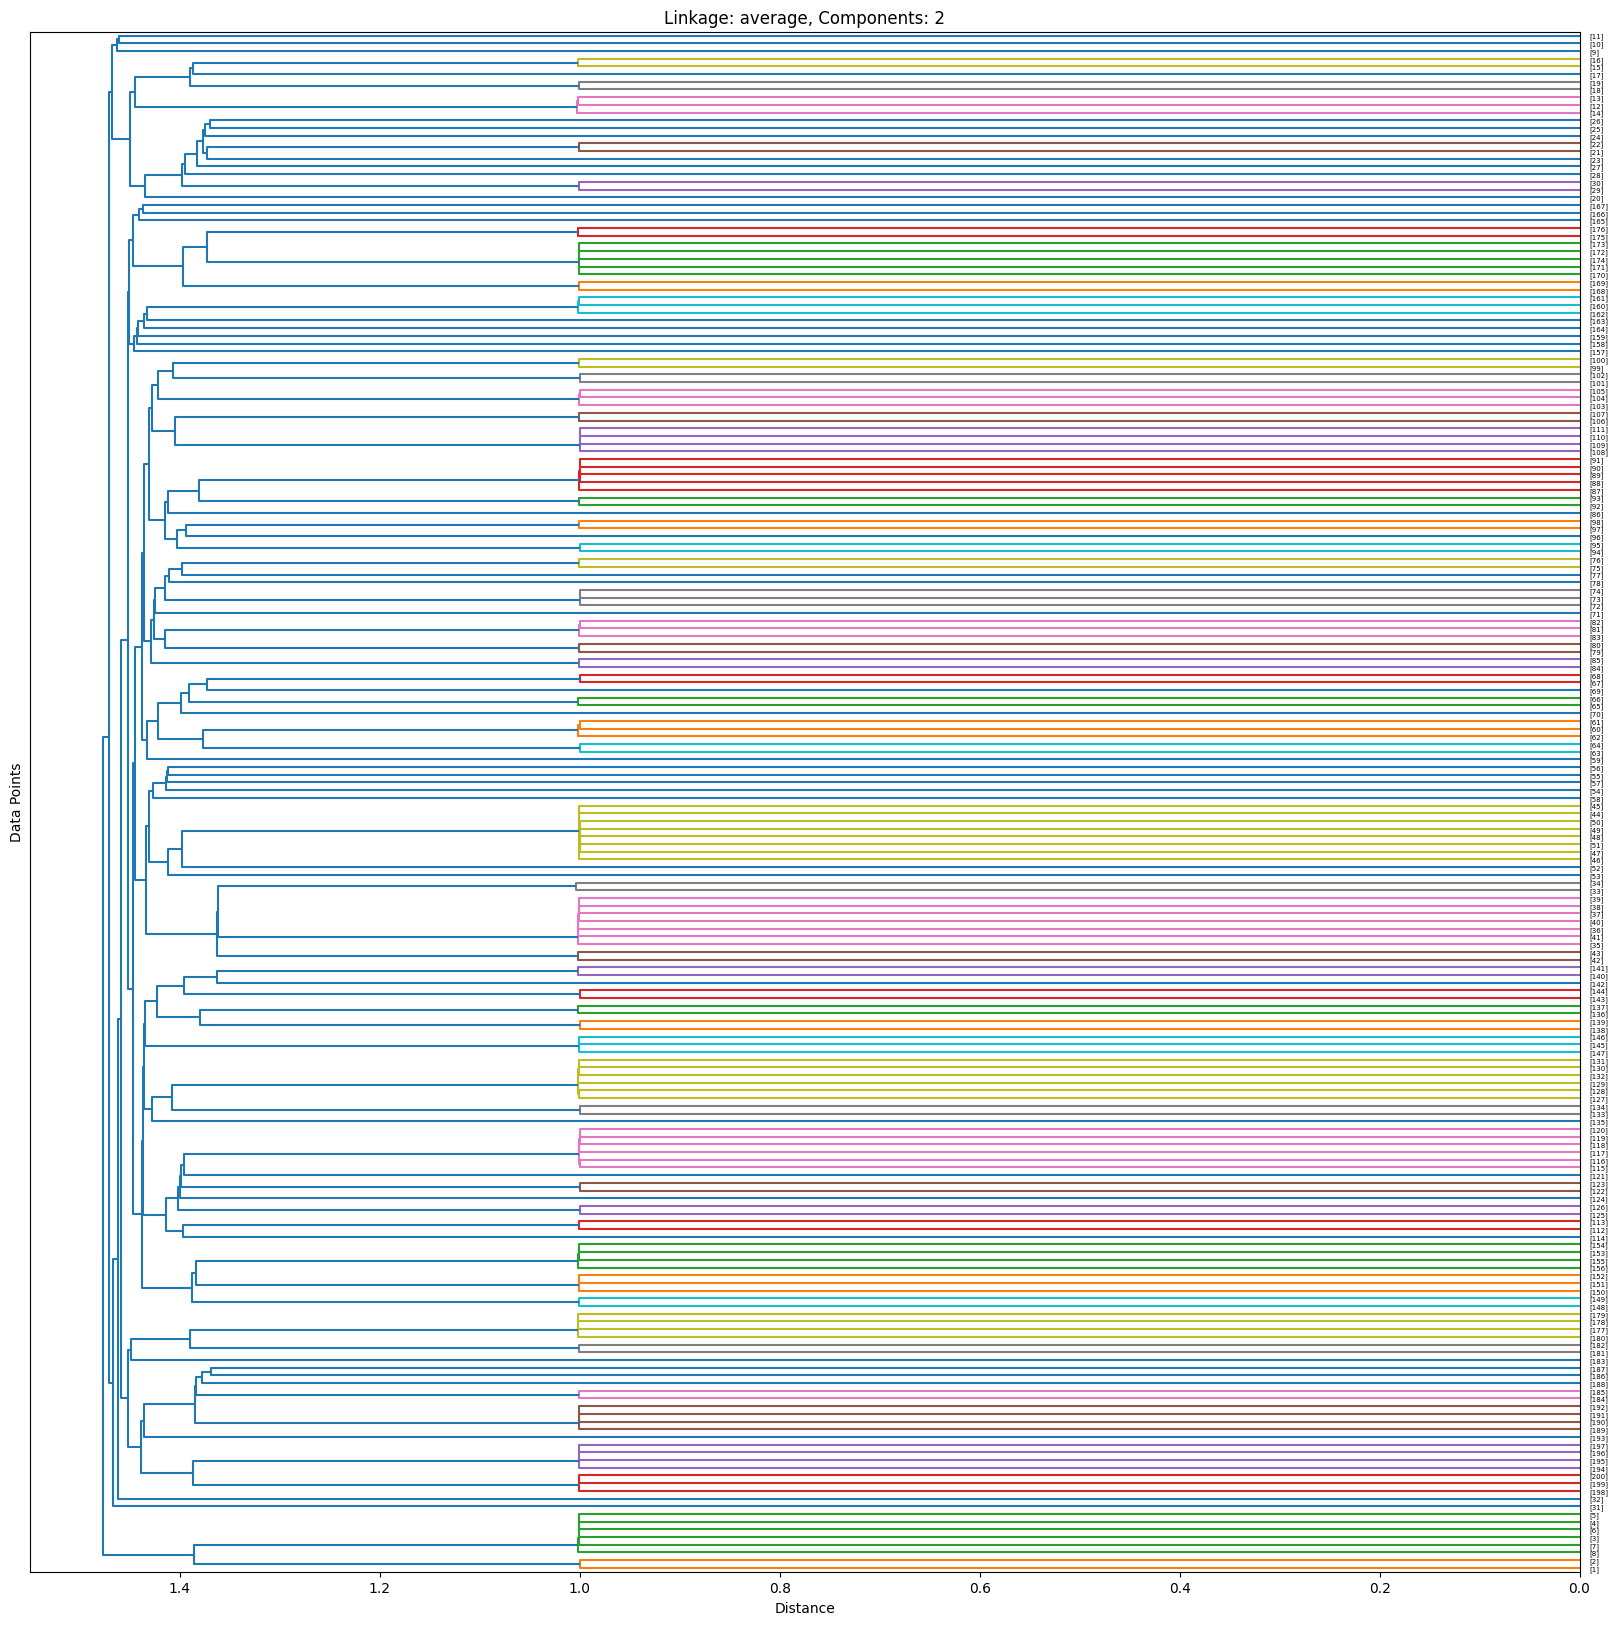

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


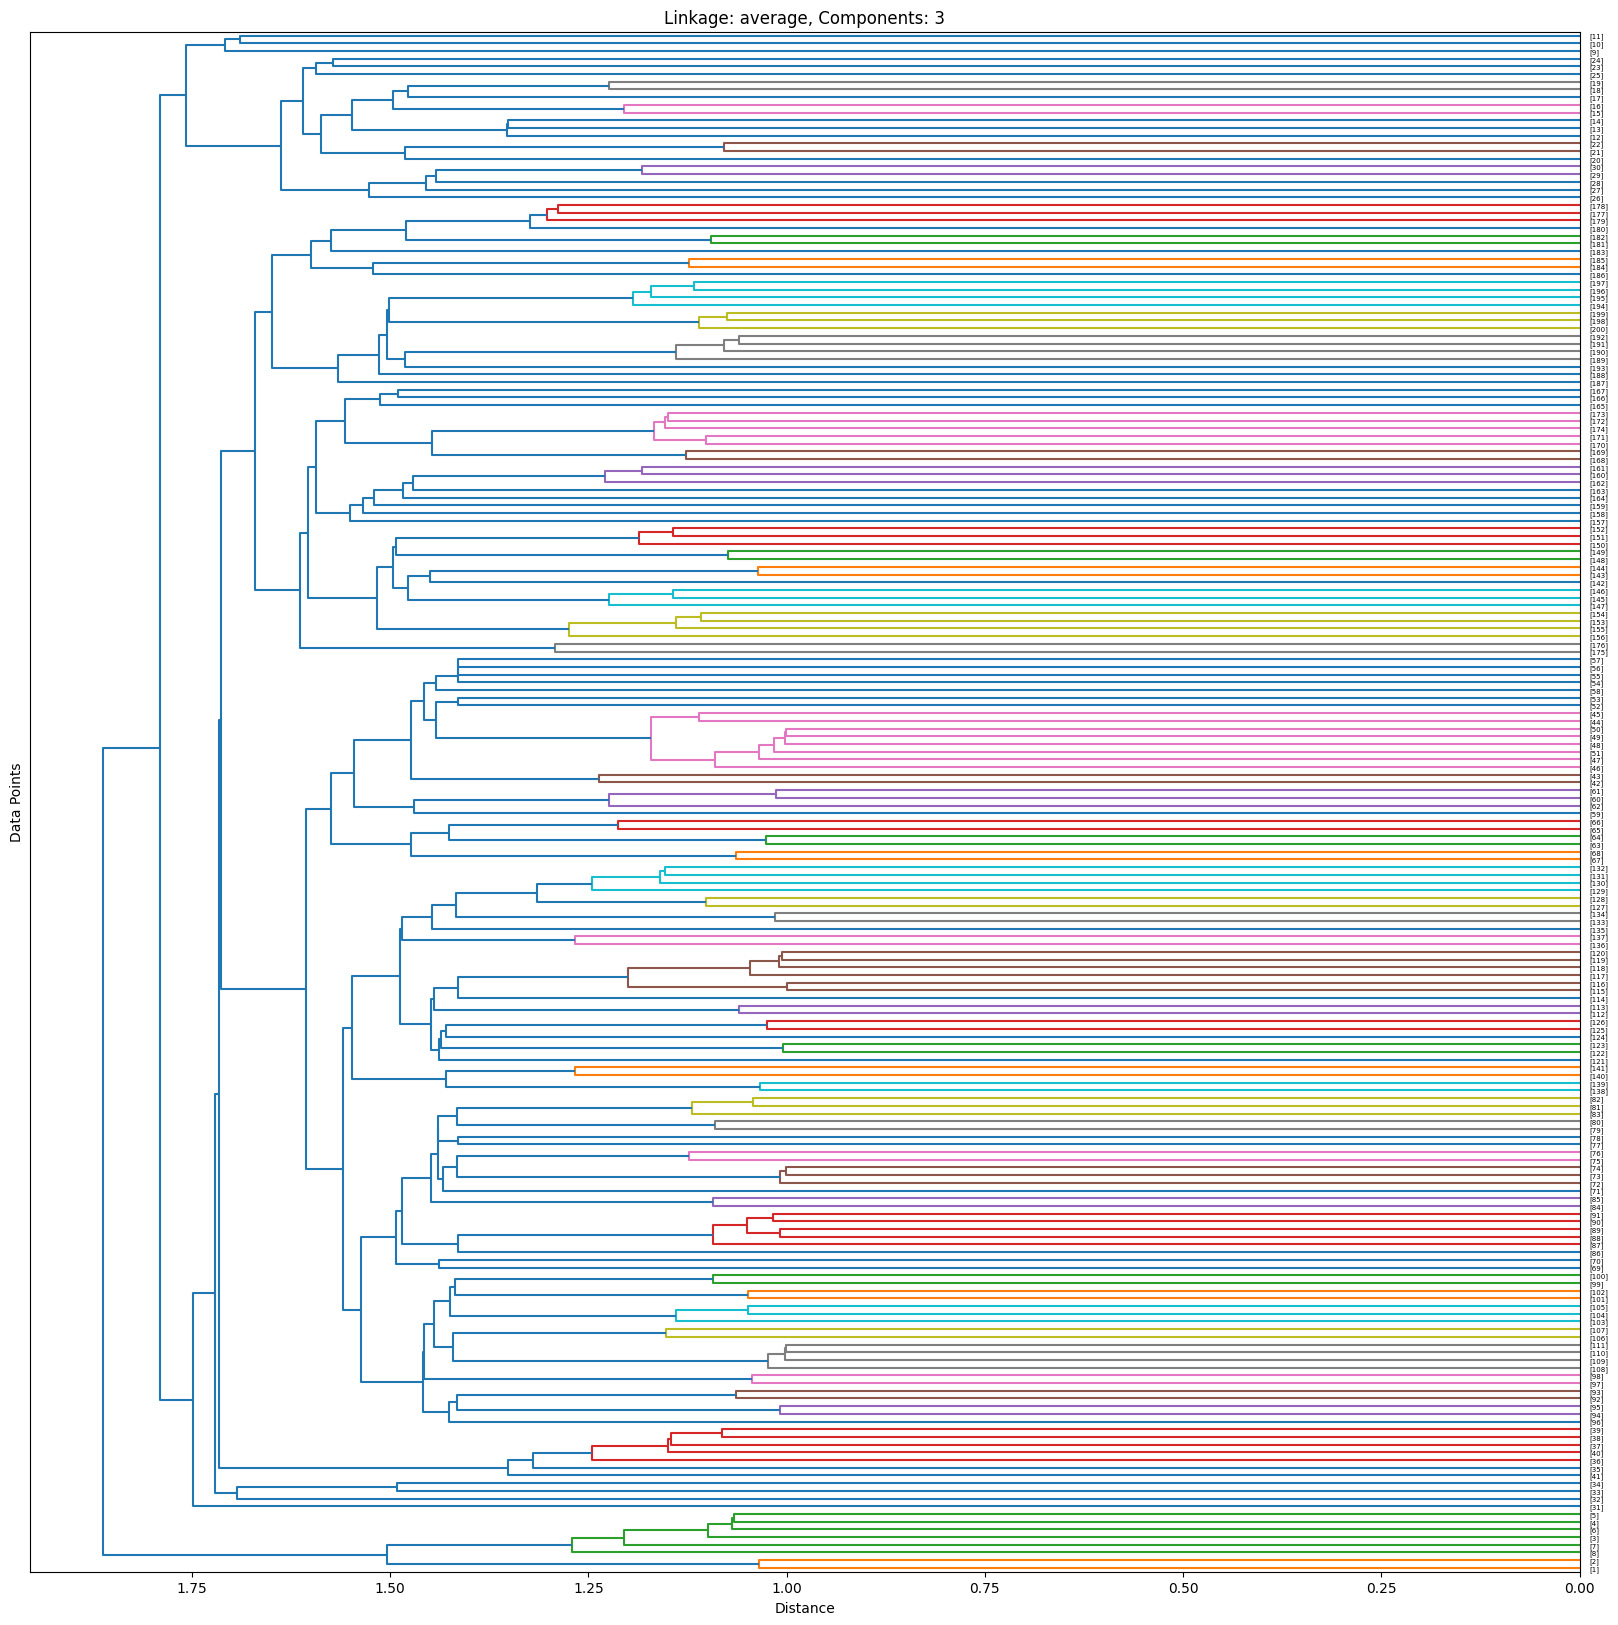

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


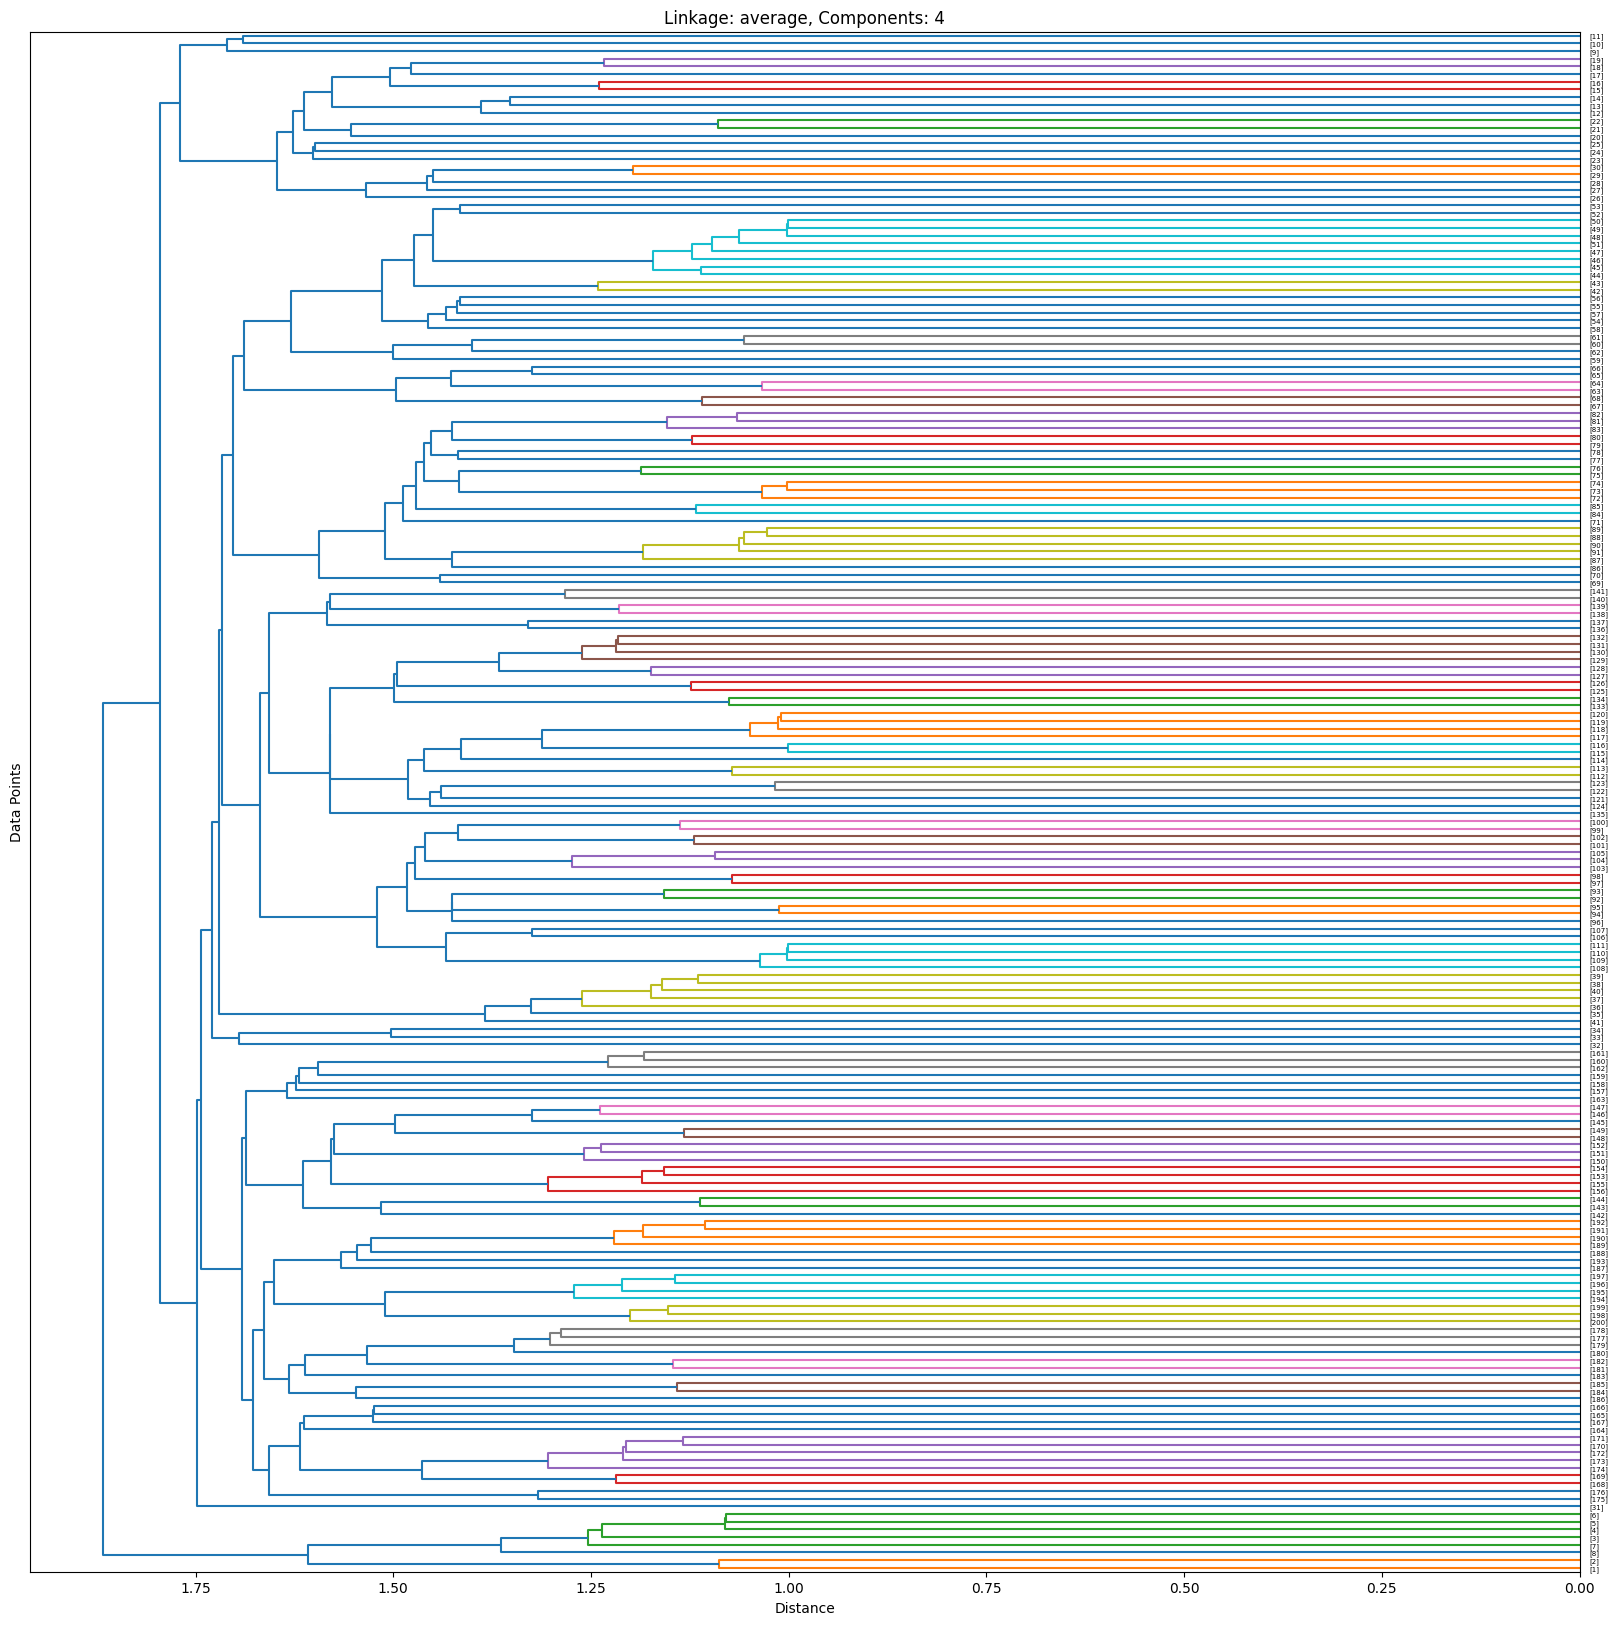

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


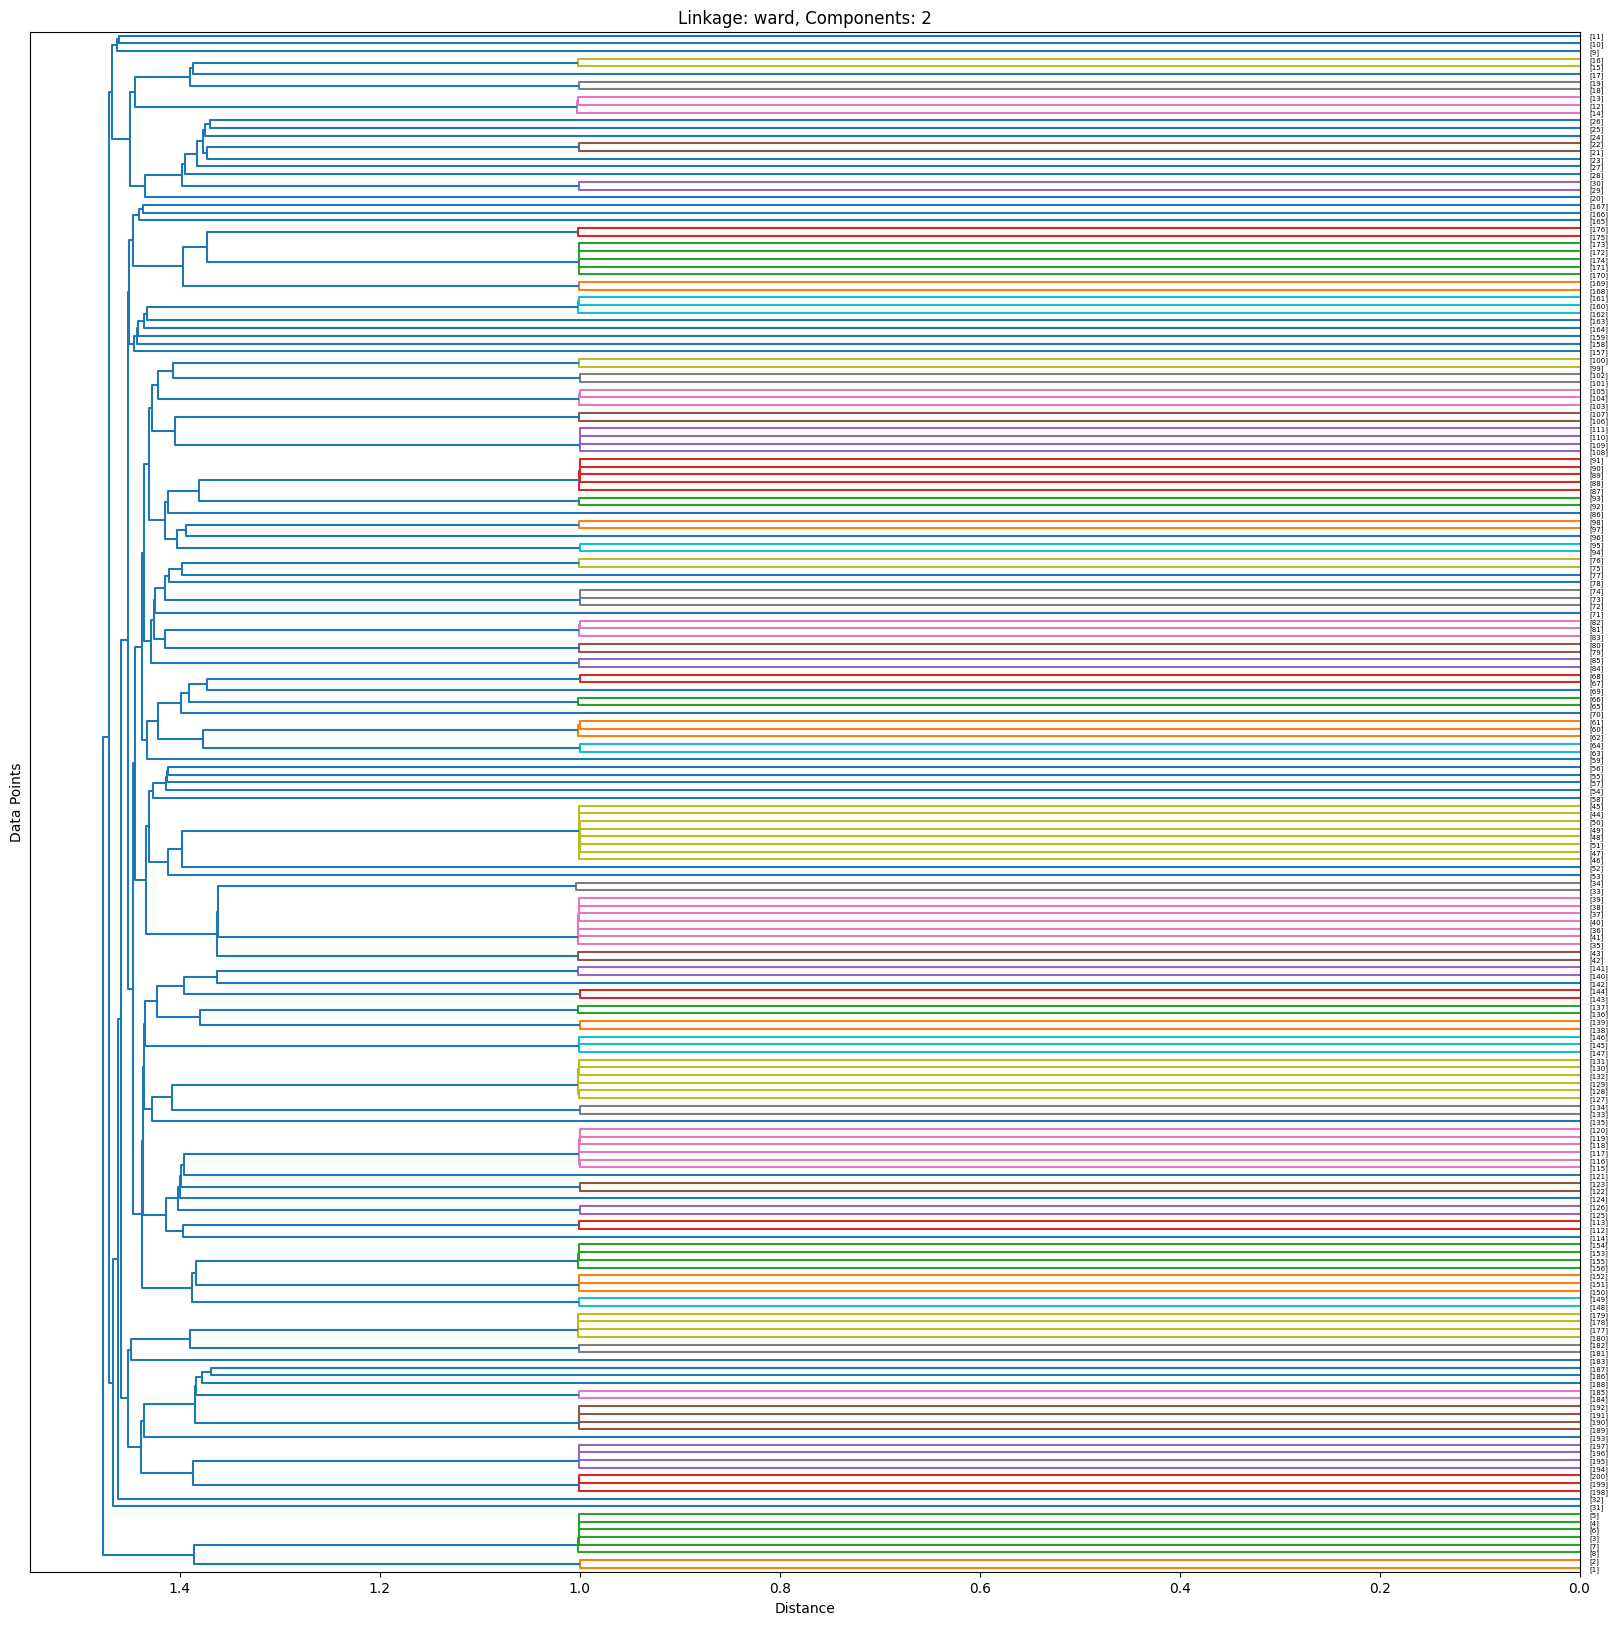

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


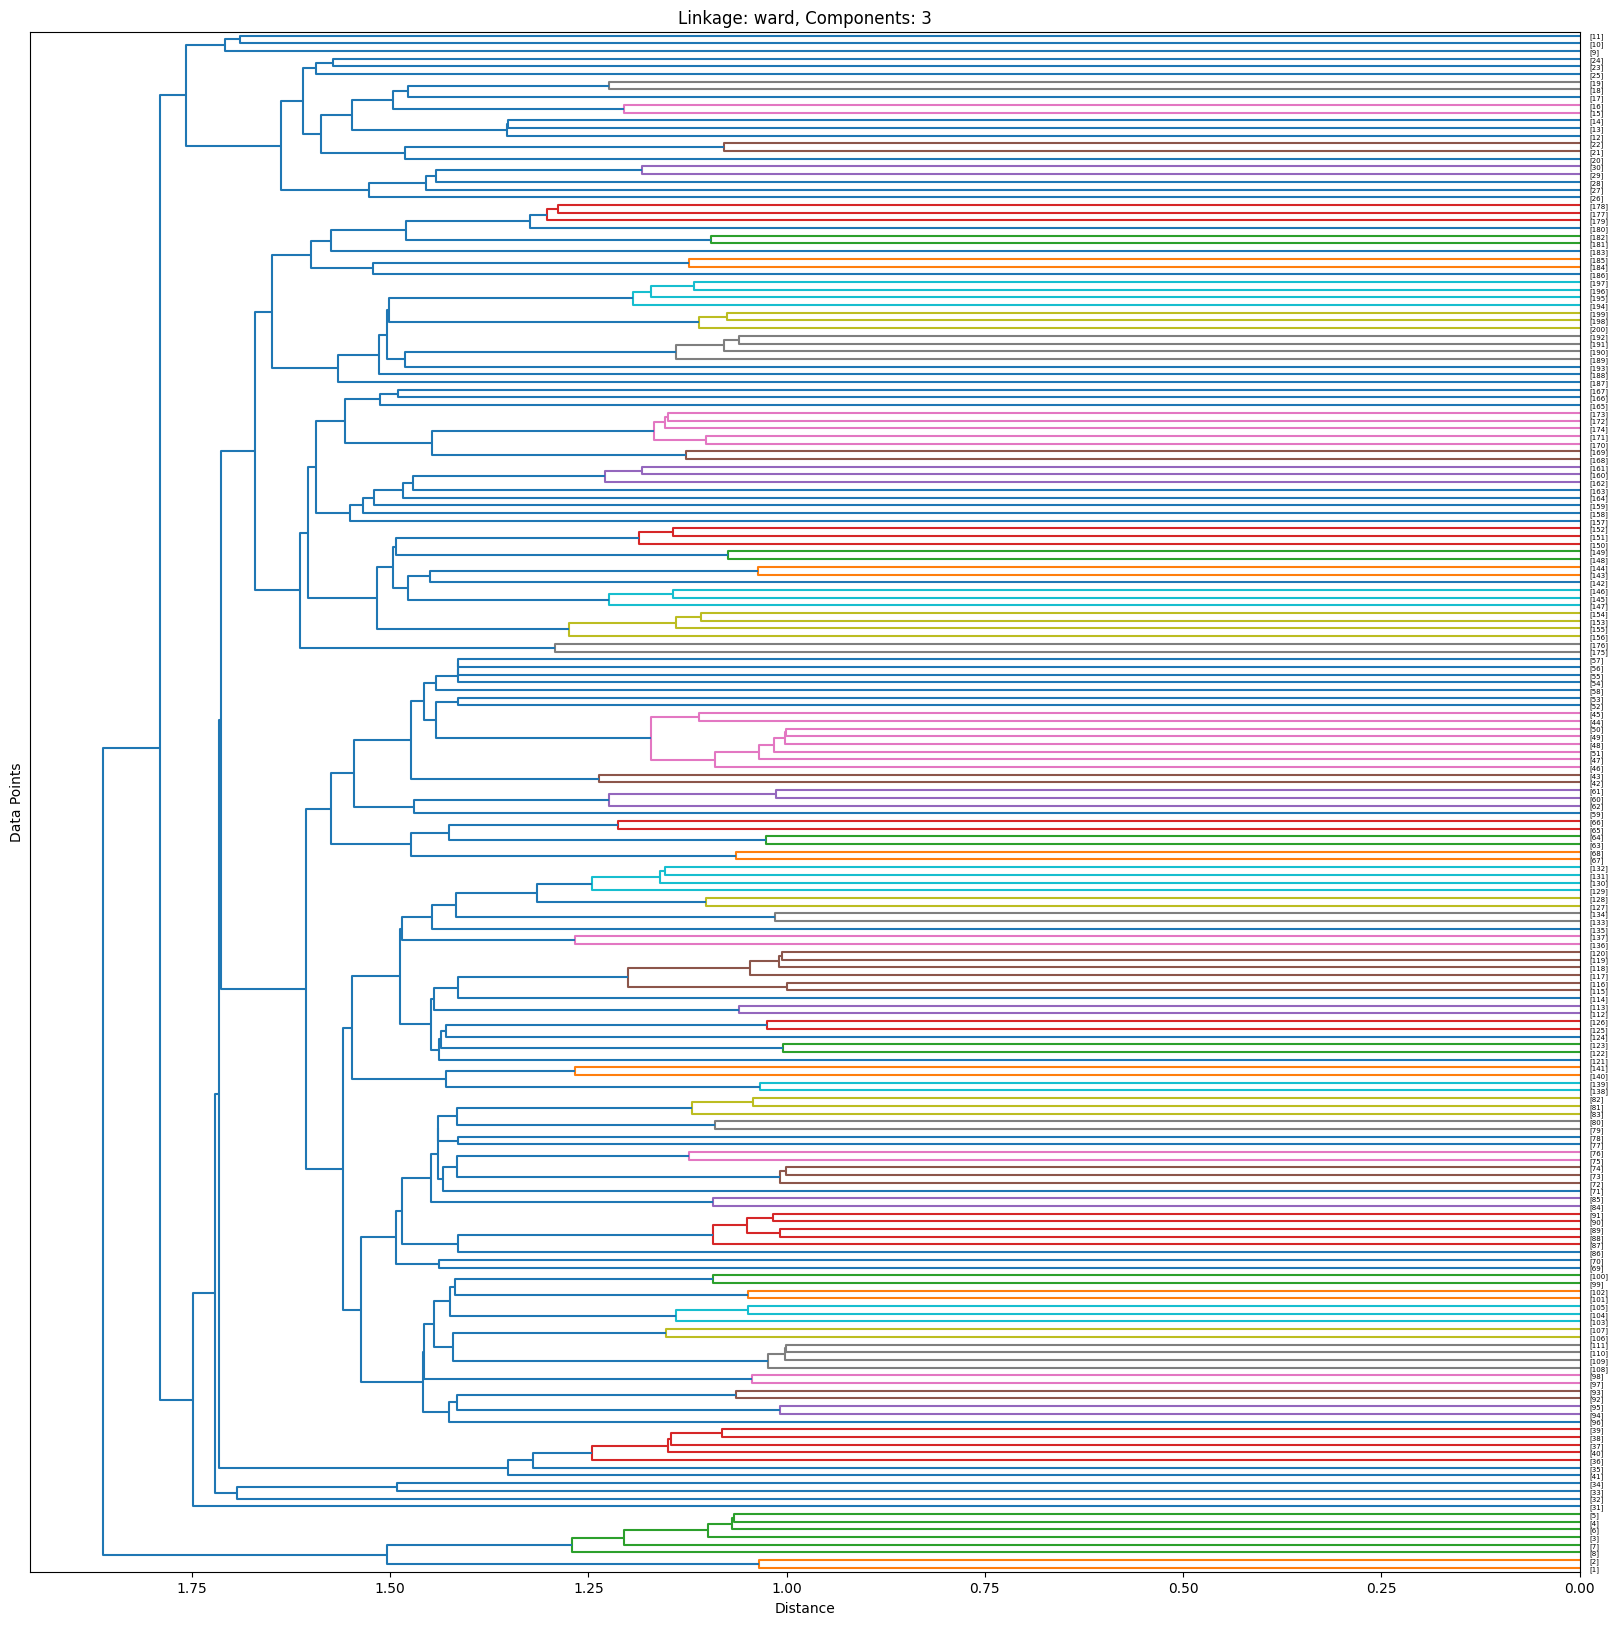

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


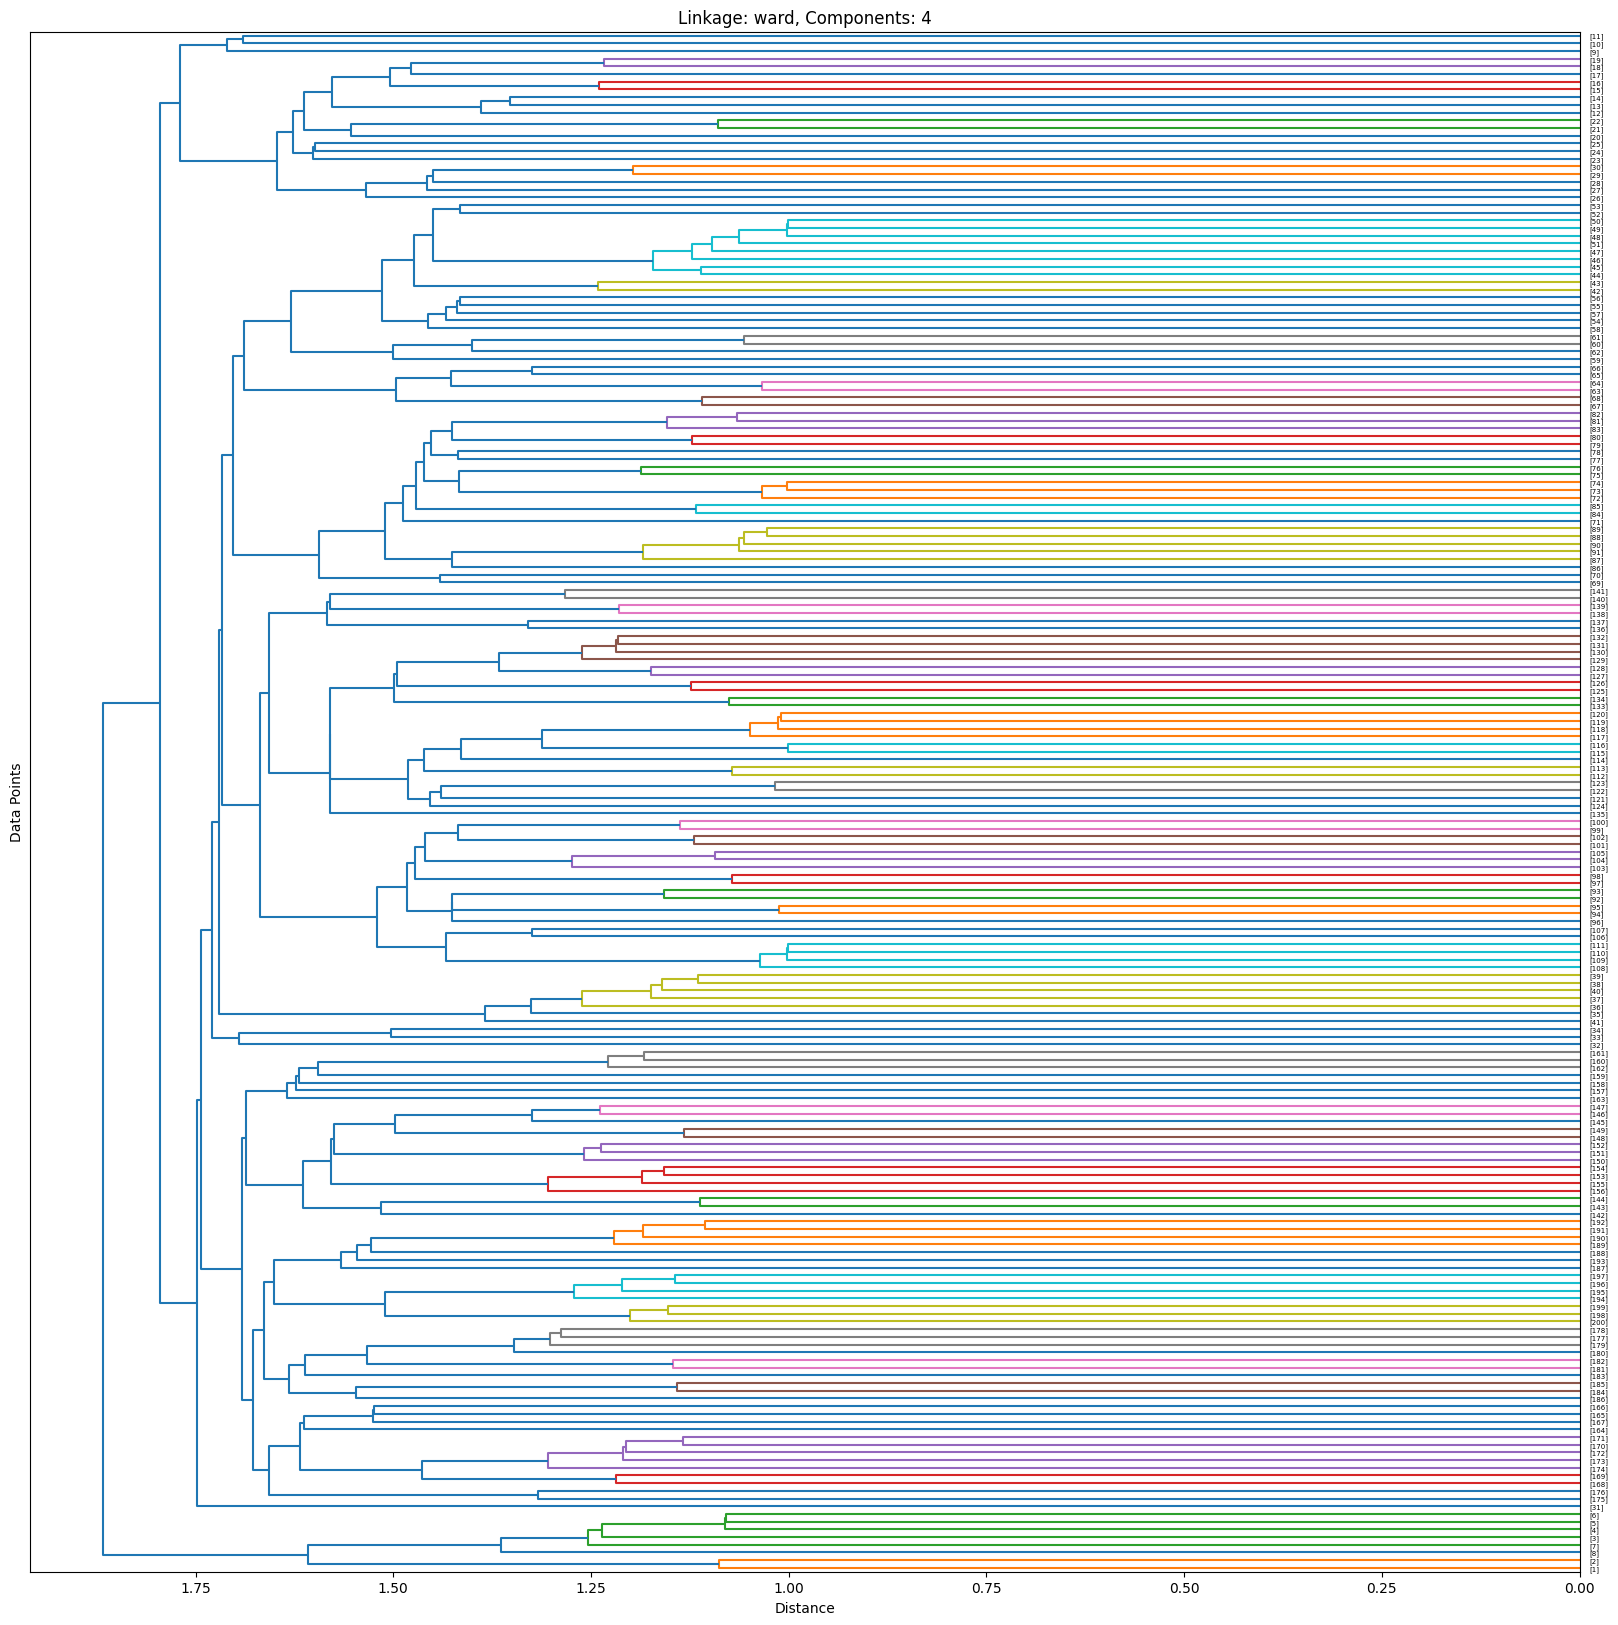

In [16]:
linkage_methods = ["single", "complete", "average", "ward"]
HC = Hierarchial_Clustering()
for linkage_type in linkage_methods:
    num_features = customer_data.shape[1]
    for n_components in range(2, num_features):
        pca = PCA(n_components=n_components)
        customer_data_pca = pca.fit_transform(customer_data)
        linkage_matrix = HC.linkages(customer_data_pca)
        title = f'Linkage: {linkage_type}, Components: {n_components}'
        HC.dendrogram(linkage_matrix,customer_data[['CustomerID']].values,title)

# Hierarchial Clustering of Gene Expression Dataset

(58, 13)


ID_REF  GSM613412  GSM613413  GSM613414  GSM613415  GSM613416  \
0   10338001   0.399439   0.389106   0.415502   0.391386   0.369703   
1   10338002   0.023194   0.020038   0.027873   0.028230   0.021045   
2   10338003   0.142329   0.132697   0.145661   0.132960   0.121082   
3   10338004   0.071389   0.074297   0.072091   0.069635   0.065488   
4   10338005   0.000403   0.000327   0.000326   0.000229   0.000285   
5   10338006   0.000722   0.000552   0.000614   0.000442   0.000453   
6   10338007   0.001619   0.001431   0.001481   0.001315   0.001300   
7   10338008   0.003756   0.003424   0.003644   0.003930   0.003087   
8   10338009   0.052132   0.047959   0.070303   0.063192   0.056106   
9   10338010   0.000435   0.000415   0.000304   0.000315   0.000259   
10  10338011   0.012304   0.009975   0.013791   0.013620   0.010813   
11  10338012   0.000467   0.000449   0.000386   0.000308   0.000288   
12  10338013   0.000320   0.000241   0.000245   0.000183   0.000155   
13  10338014   0.000270   0.000259   0.000232   0.000223   0.000141   
14  10338015   0.000325   0.000231   0.000236   0.000241   0.000151   
15  10338016   0.038681   0.035176   0.048776   0.048624   0.039690   
16  10338017   0.841147   0.911311   0.913835   0.918641   0.886053   
17  10338018   0.020669   0.018558   0.027842   0.028074   0.021513   
18  10338019   0.007807   0.006486   0.009321   0.009215   0.007076   
19  10338020   0.035667   0.033126   0.046876   0.046086   0.036813   
20  10338021   0.000836   0.000740   0.000744   0.000688   0.000548   
21  10338022   0.000656   0.000533   0.000644   0.000474   0.000455   
22  10338023   0.001801   0.001550   0.001892   0.002004   0.001577   
23  10338024   0.024947   0.020733   0.031549   0.032131   0.023773   
24  10338025   0.059927   0.059360   0.066576   0.059623   0.055377   
25  10338026   1.000000   1.000000   1.000000   1.000000   1.000000   
26  10338027   0.025224   0.022664   0.033694   0.034940   0.026240   
27  10338028   0.004963   0.004162   0.005697   0.005727   0.004809   
28  10338029   0.110542   0.126446   0.120509   0.117985   0.103532   
29  10338030   0.000361   0.000306   0.000289   0.000256   0.000188   
30  10338031   0.000218   0.000213   0.000214   0.000168   0.000112   
31  10338032   0.000283   0.000254   0.000217   0.000188   0.000128   
32  10338033   0.017900   0.014958   0.022070   0.023495   0.017020   
33  10338034   0.003148   0.002907   0.003107   0.002584   0.002572   
34  10338035   0.077833   0.072236   0.077777   0.070611   0.067266   
35  10338036   0.076544   0.083844   0.078159   0.072353   0.073500   
36  10338037   0.010839   0.013585   0.020212   0.019640   0.015132   
37  10338038   0.000000   0.000000   0.000000   0.000000   0.000000   
38  10338039   0.045287   0.039807   0.054294   0.057989   0.045540   
39  10338040   0.004585   0.003793   0.005284   0.005036   0.003819   
40  10338041   0.201531   0.250355   0.221021   0.220422   0.225321   
41  10338042   0.109217   0.116165   0.118600   0.104524   0.107817   
42  10338043   0.000193   0.000136   0.000119   0.000133   0.000064   
43  10338044   0.383884   0.425871   0.408750   0.388627   0.386873   
44  10338045   0.031763   0.041546   0.042676   0.032089   0.041485   
45  10338046   0.004065   0.003613   0.004544   0.004075   0.003490   
46  10338047   0.015688   0.024316   0.041415   0.036463   0.026679   
47  10338048   0.002820   0.002485   0.002729   0.002382   0.002245   
48  10338049   0.059765   0.057215   0.077740   0.076151   0.062400   
49  10338050   0.000283   0.000278   0.000279   0.000240   0.000147   
50  10338051   0.009370   0.008195   0.011708   0.011666   0.009242   
51  10338052   0.001004   0.001043   0.000991   0.000832   0.000855   
52  10338053   0.033681   0.031013   0.044757   0.045656   0.036775   
53  10338054   0.005581   0.004598   0.006920   0.006989   0.005139   
54  10338055   0.043578   0.041261   0.054557   0.055537   0.045837   
55  10338056   0.006595   0.00

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


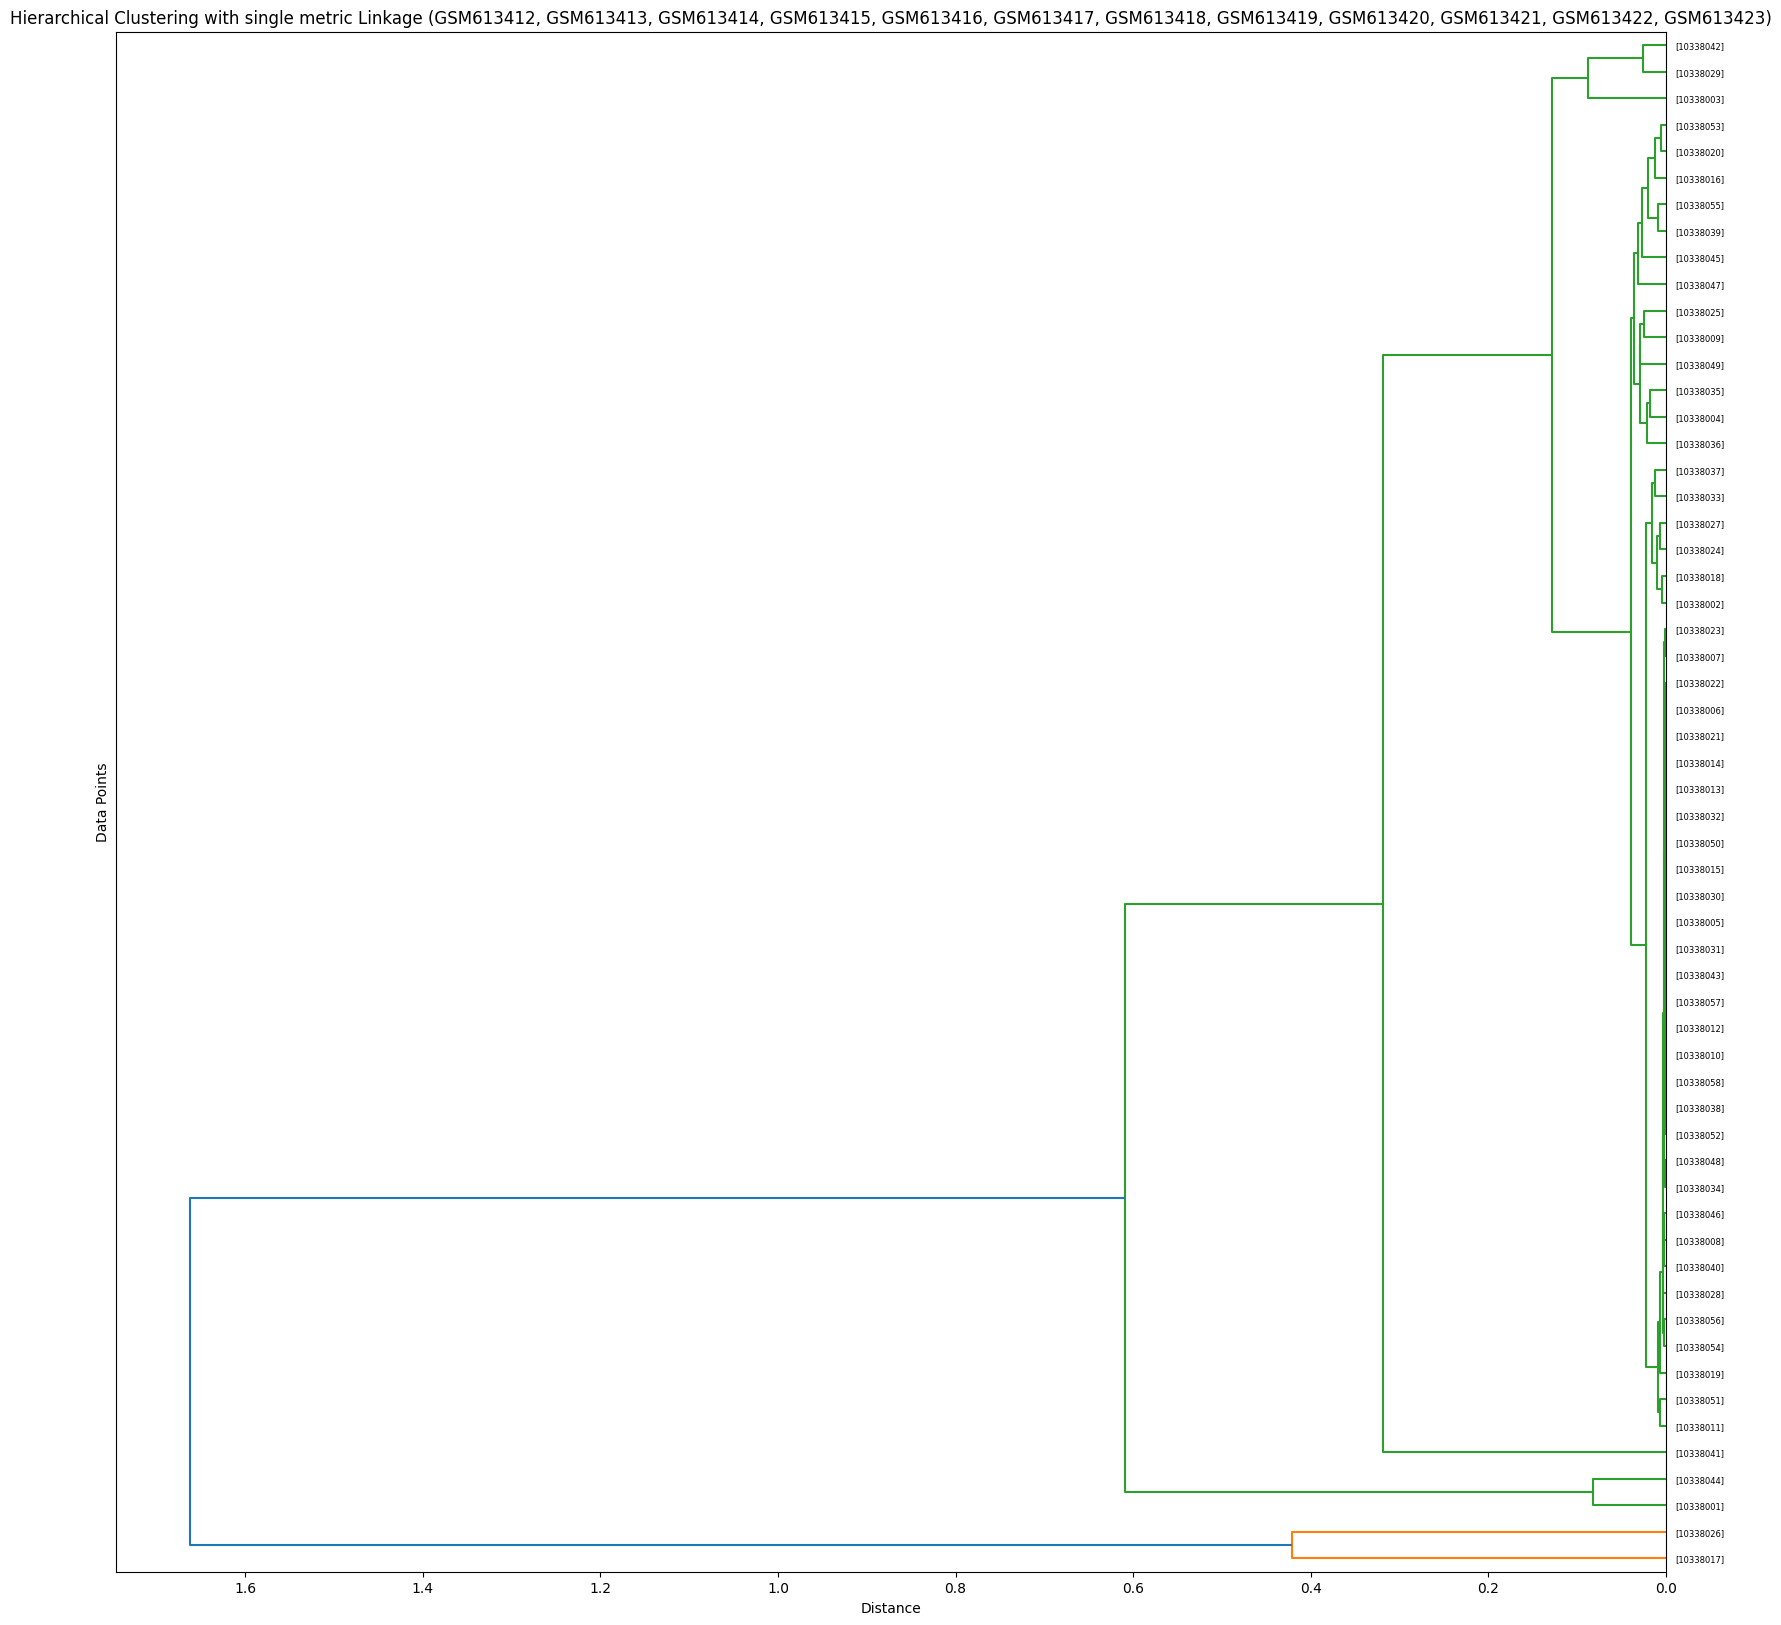

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


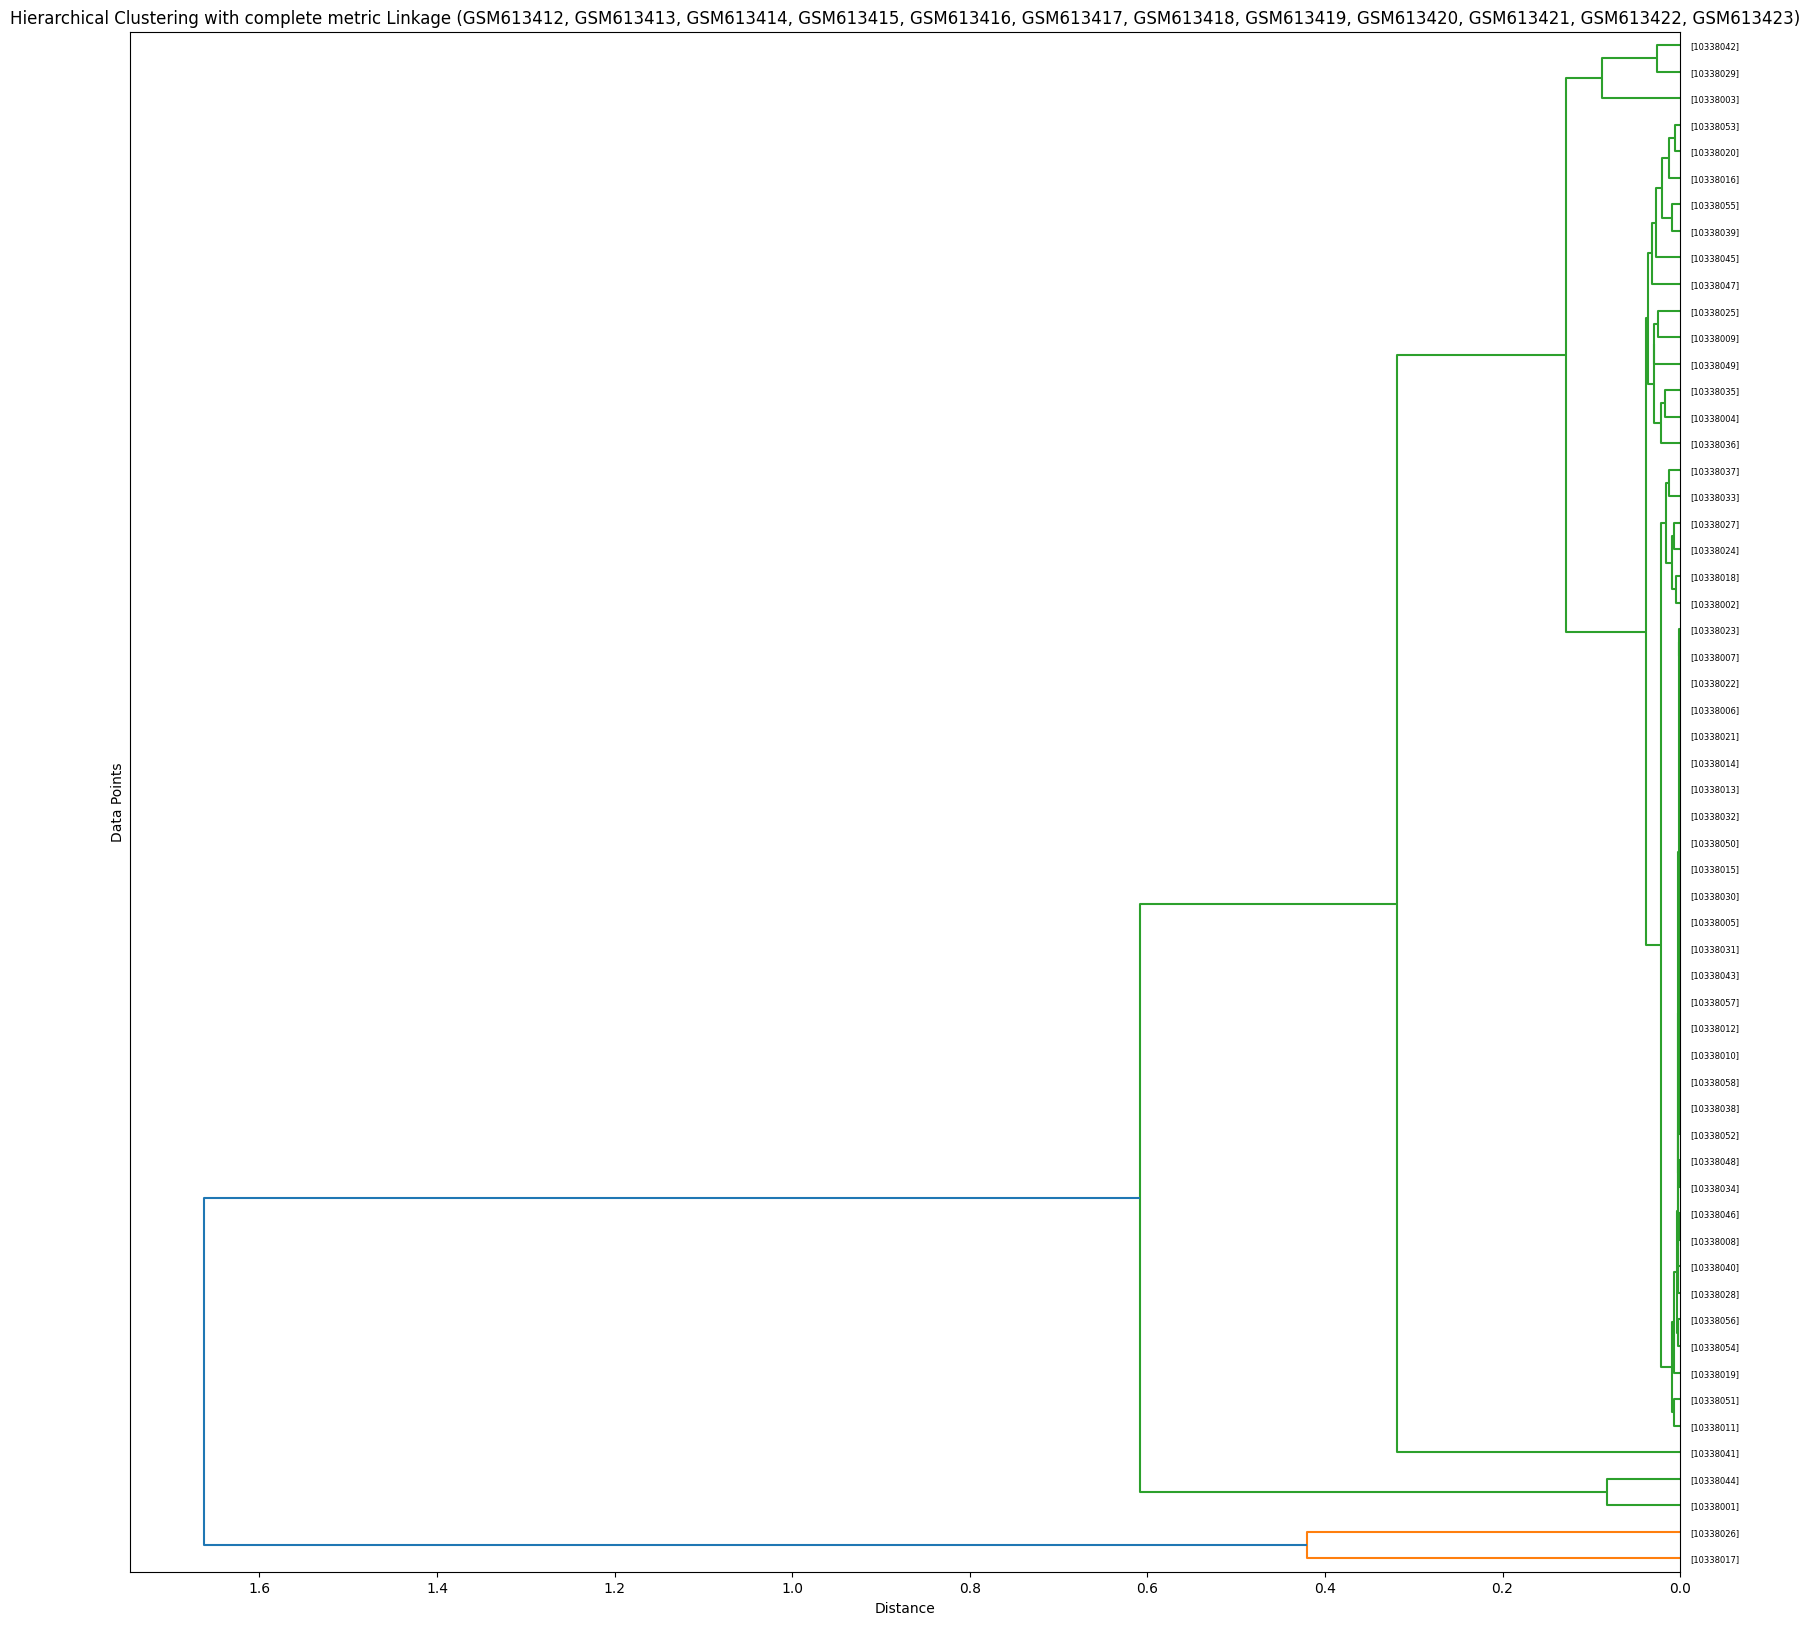

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


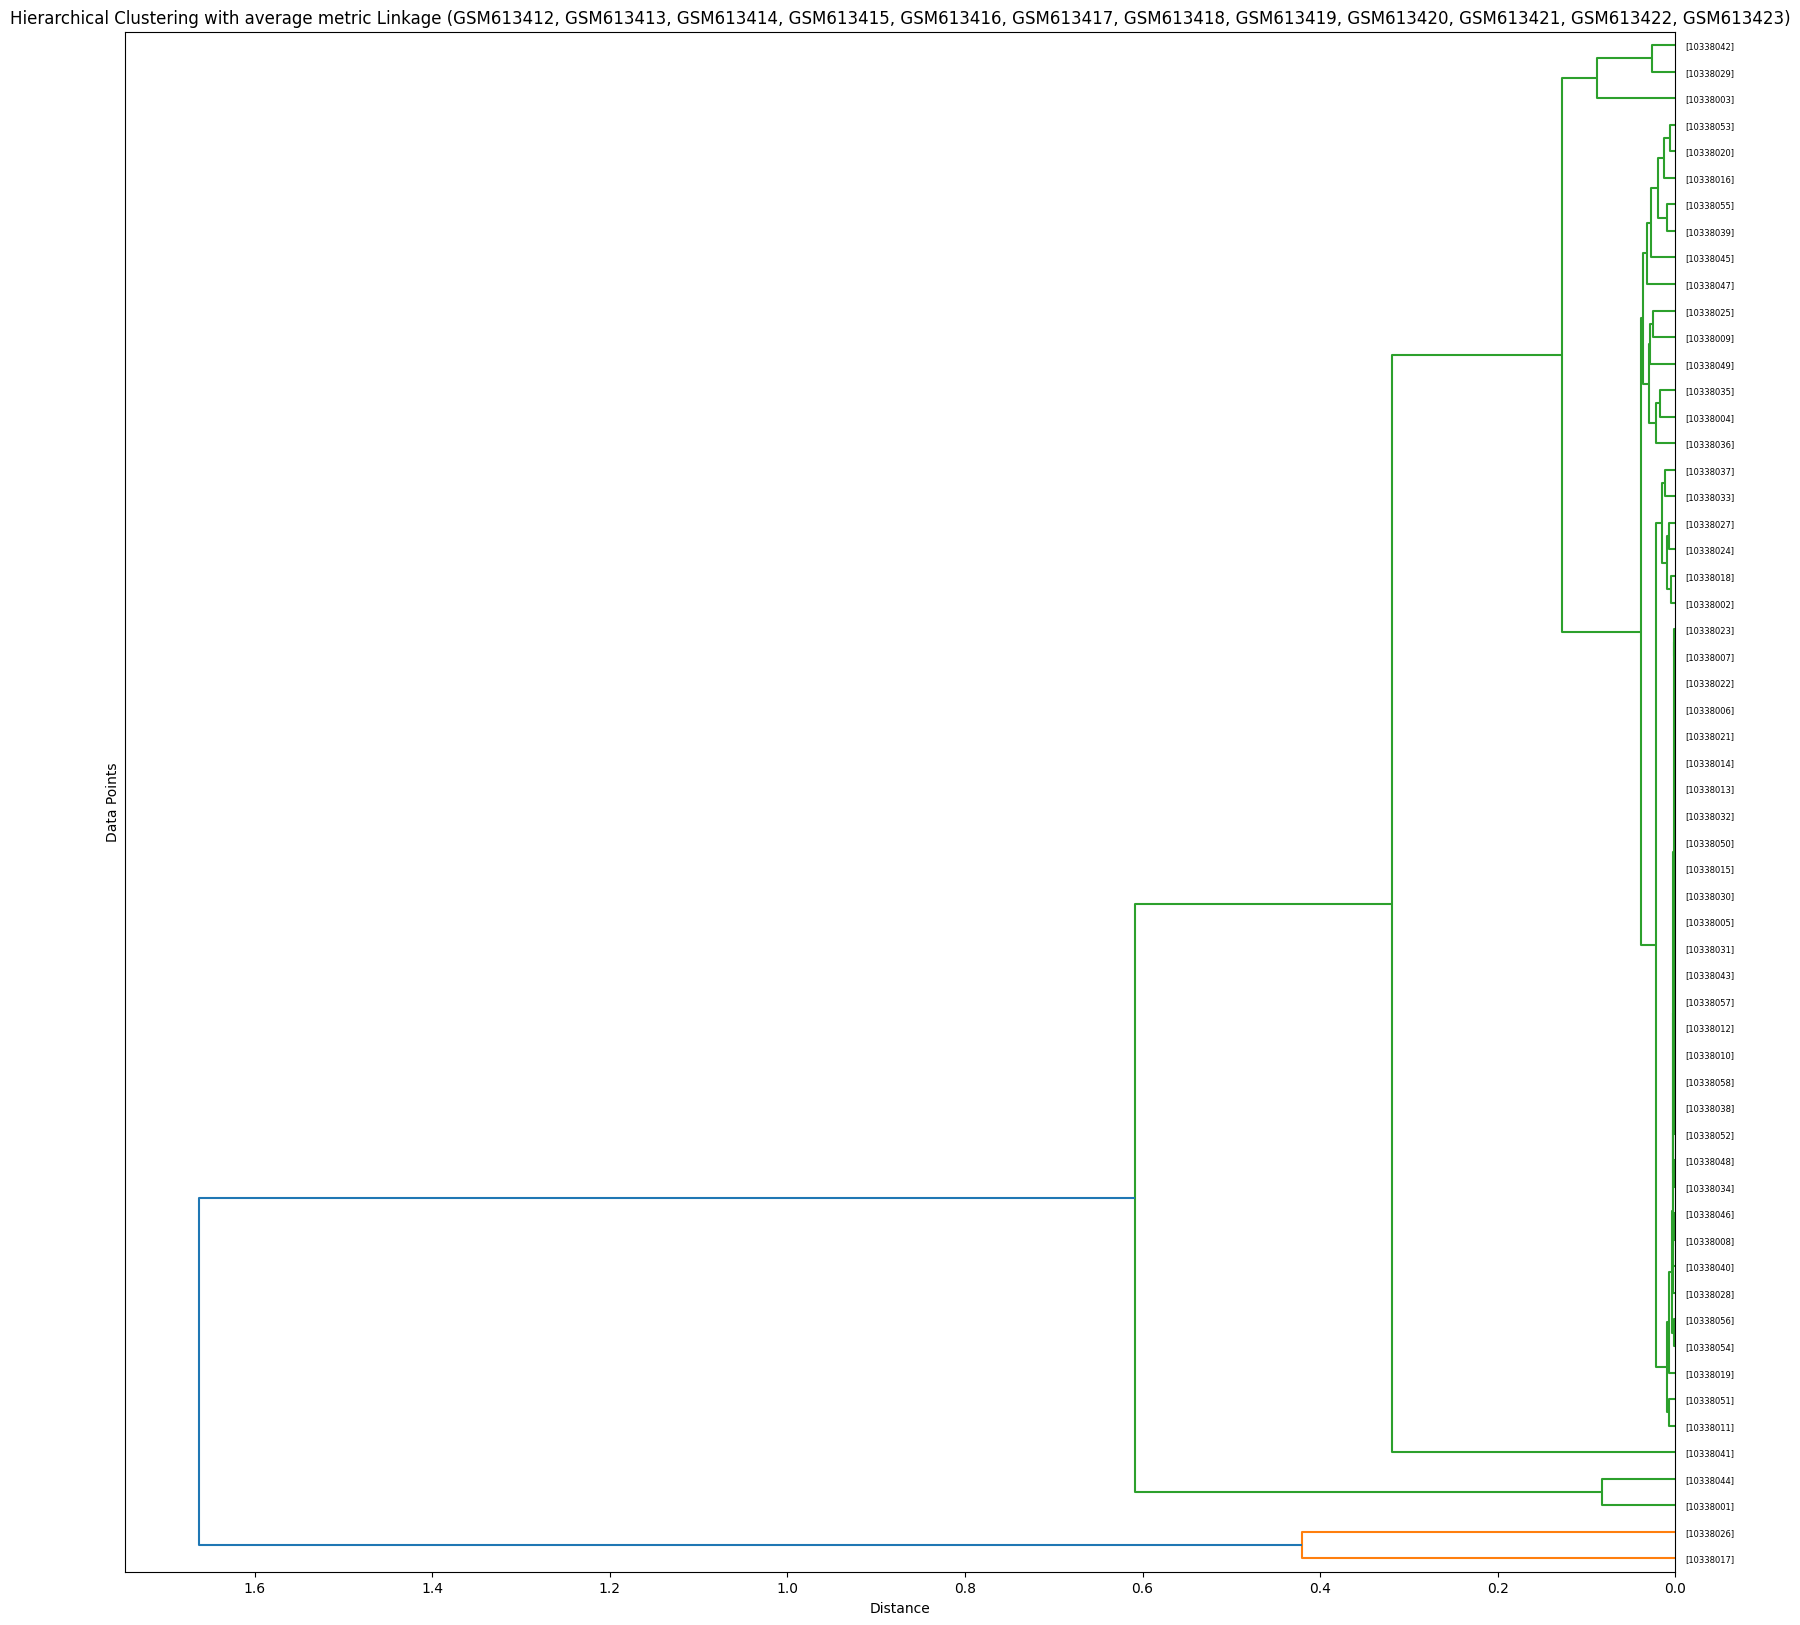

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


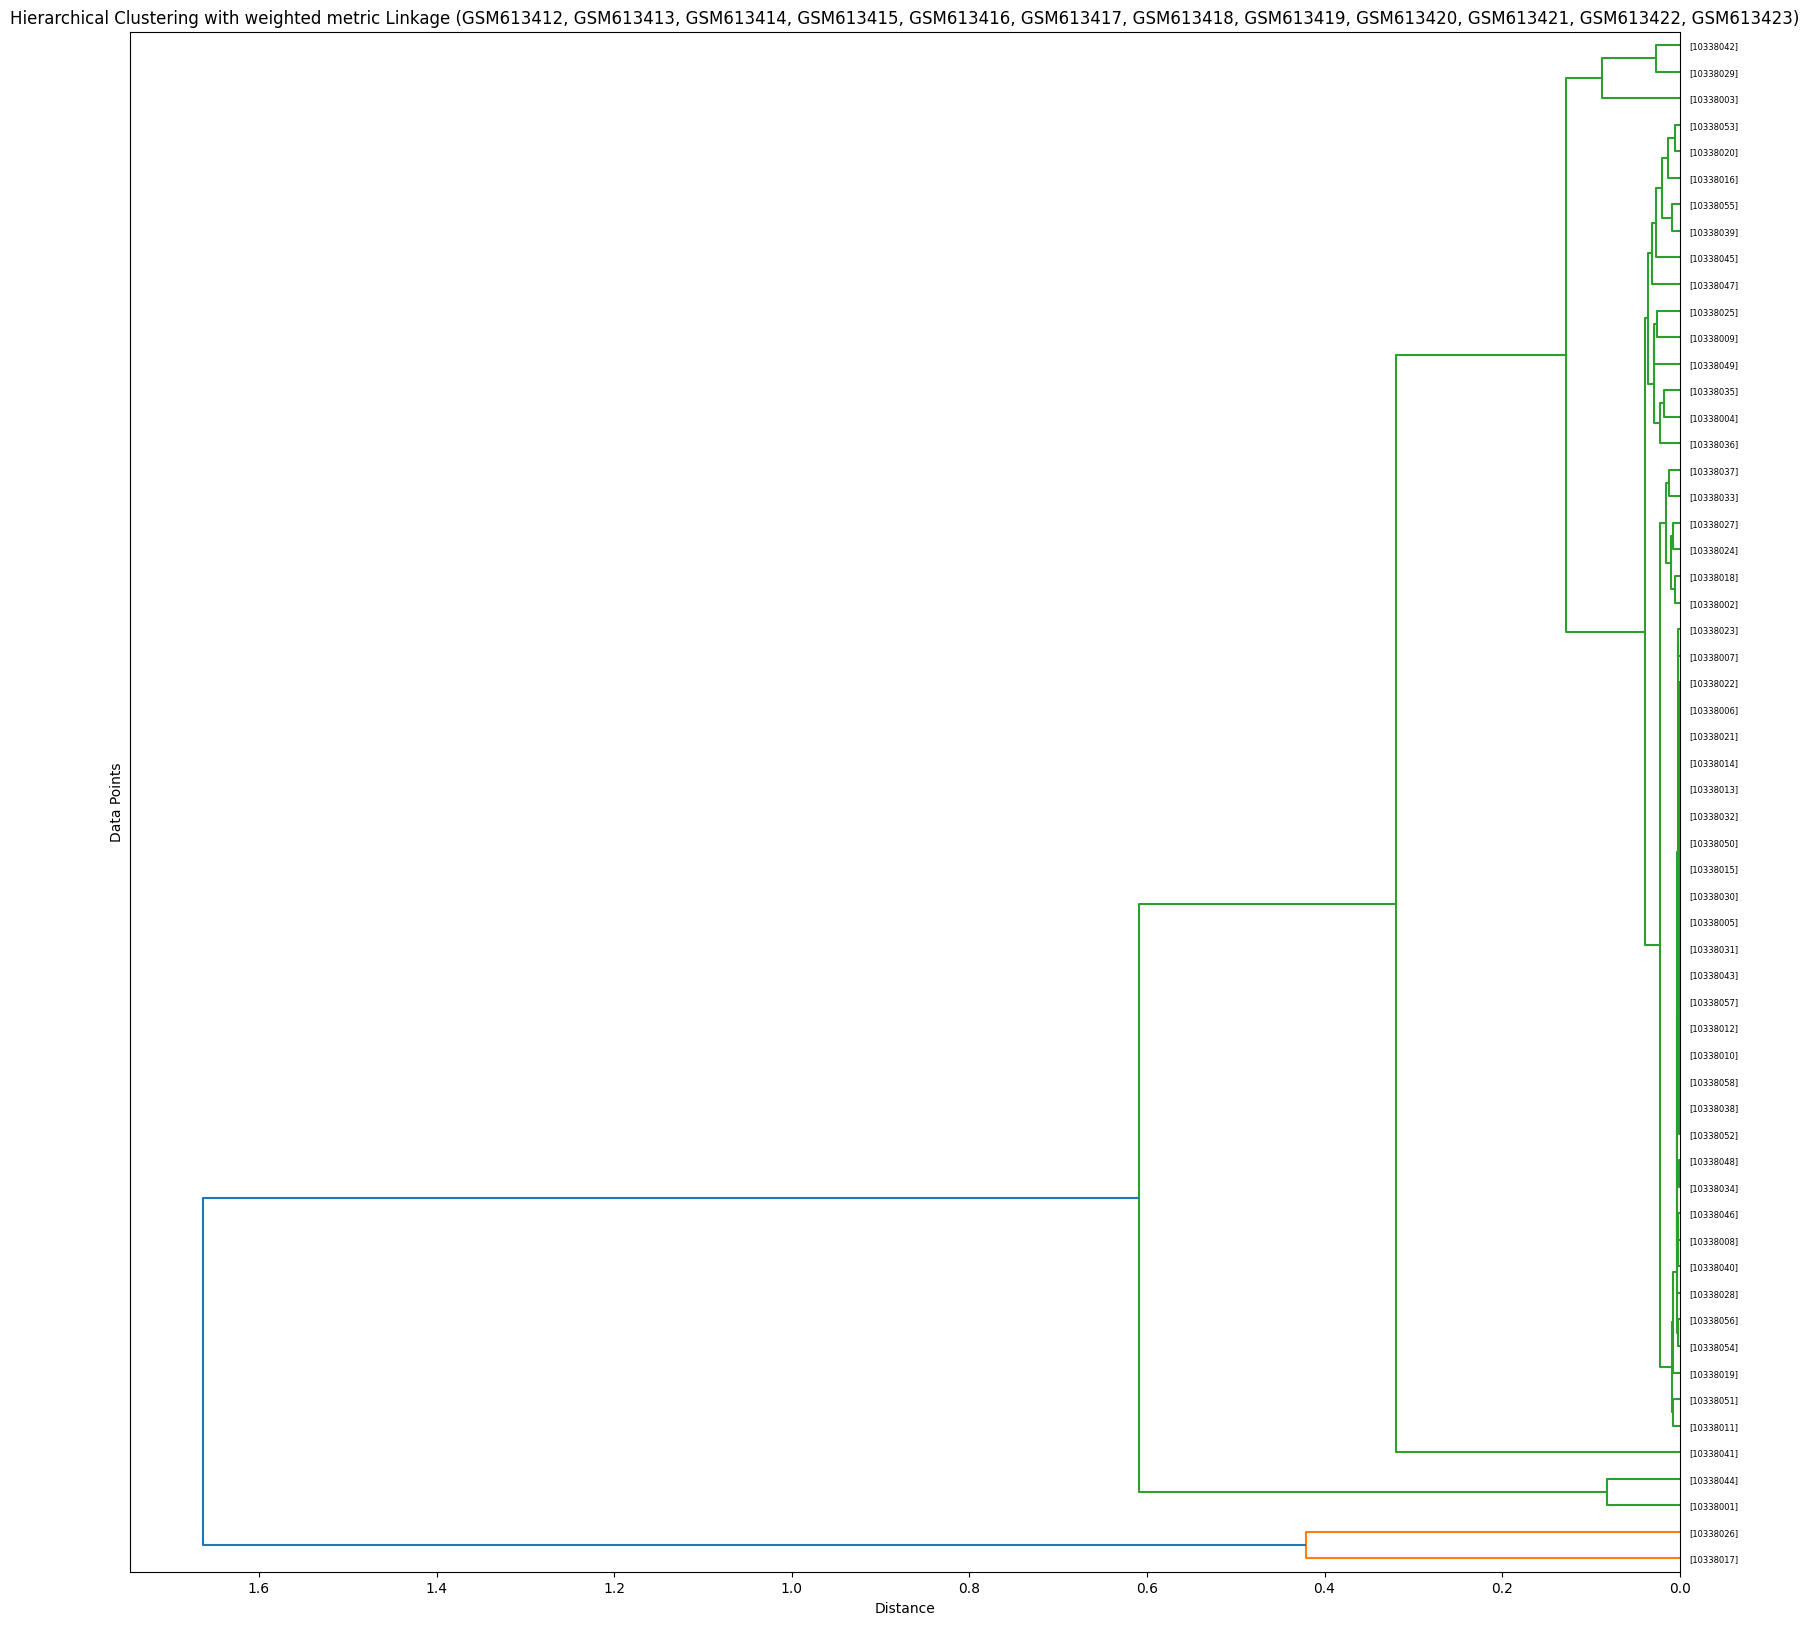

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


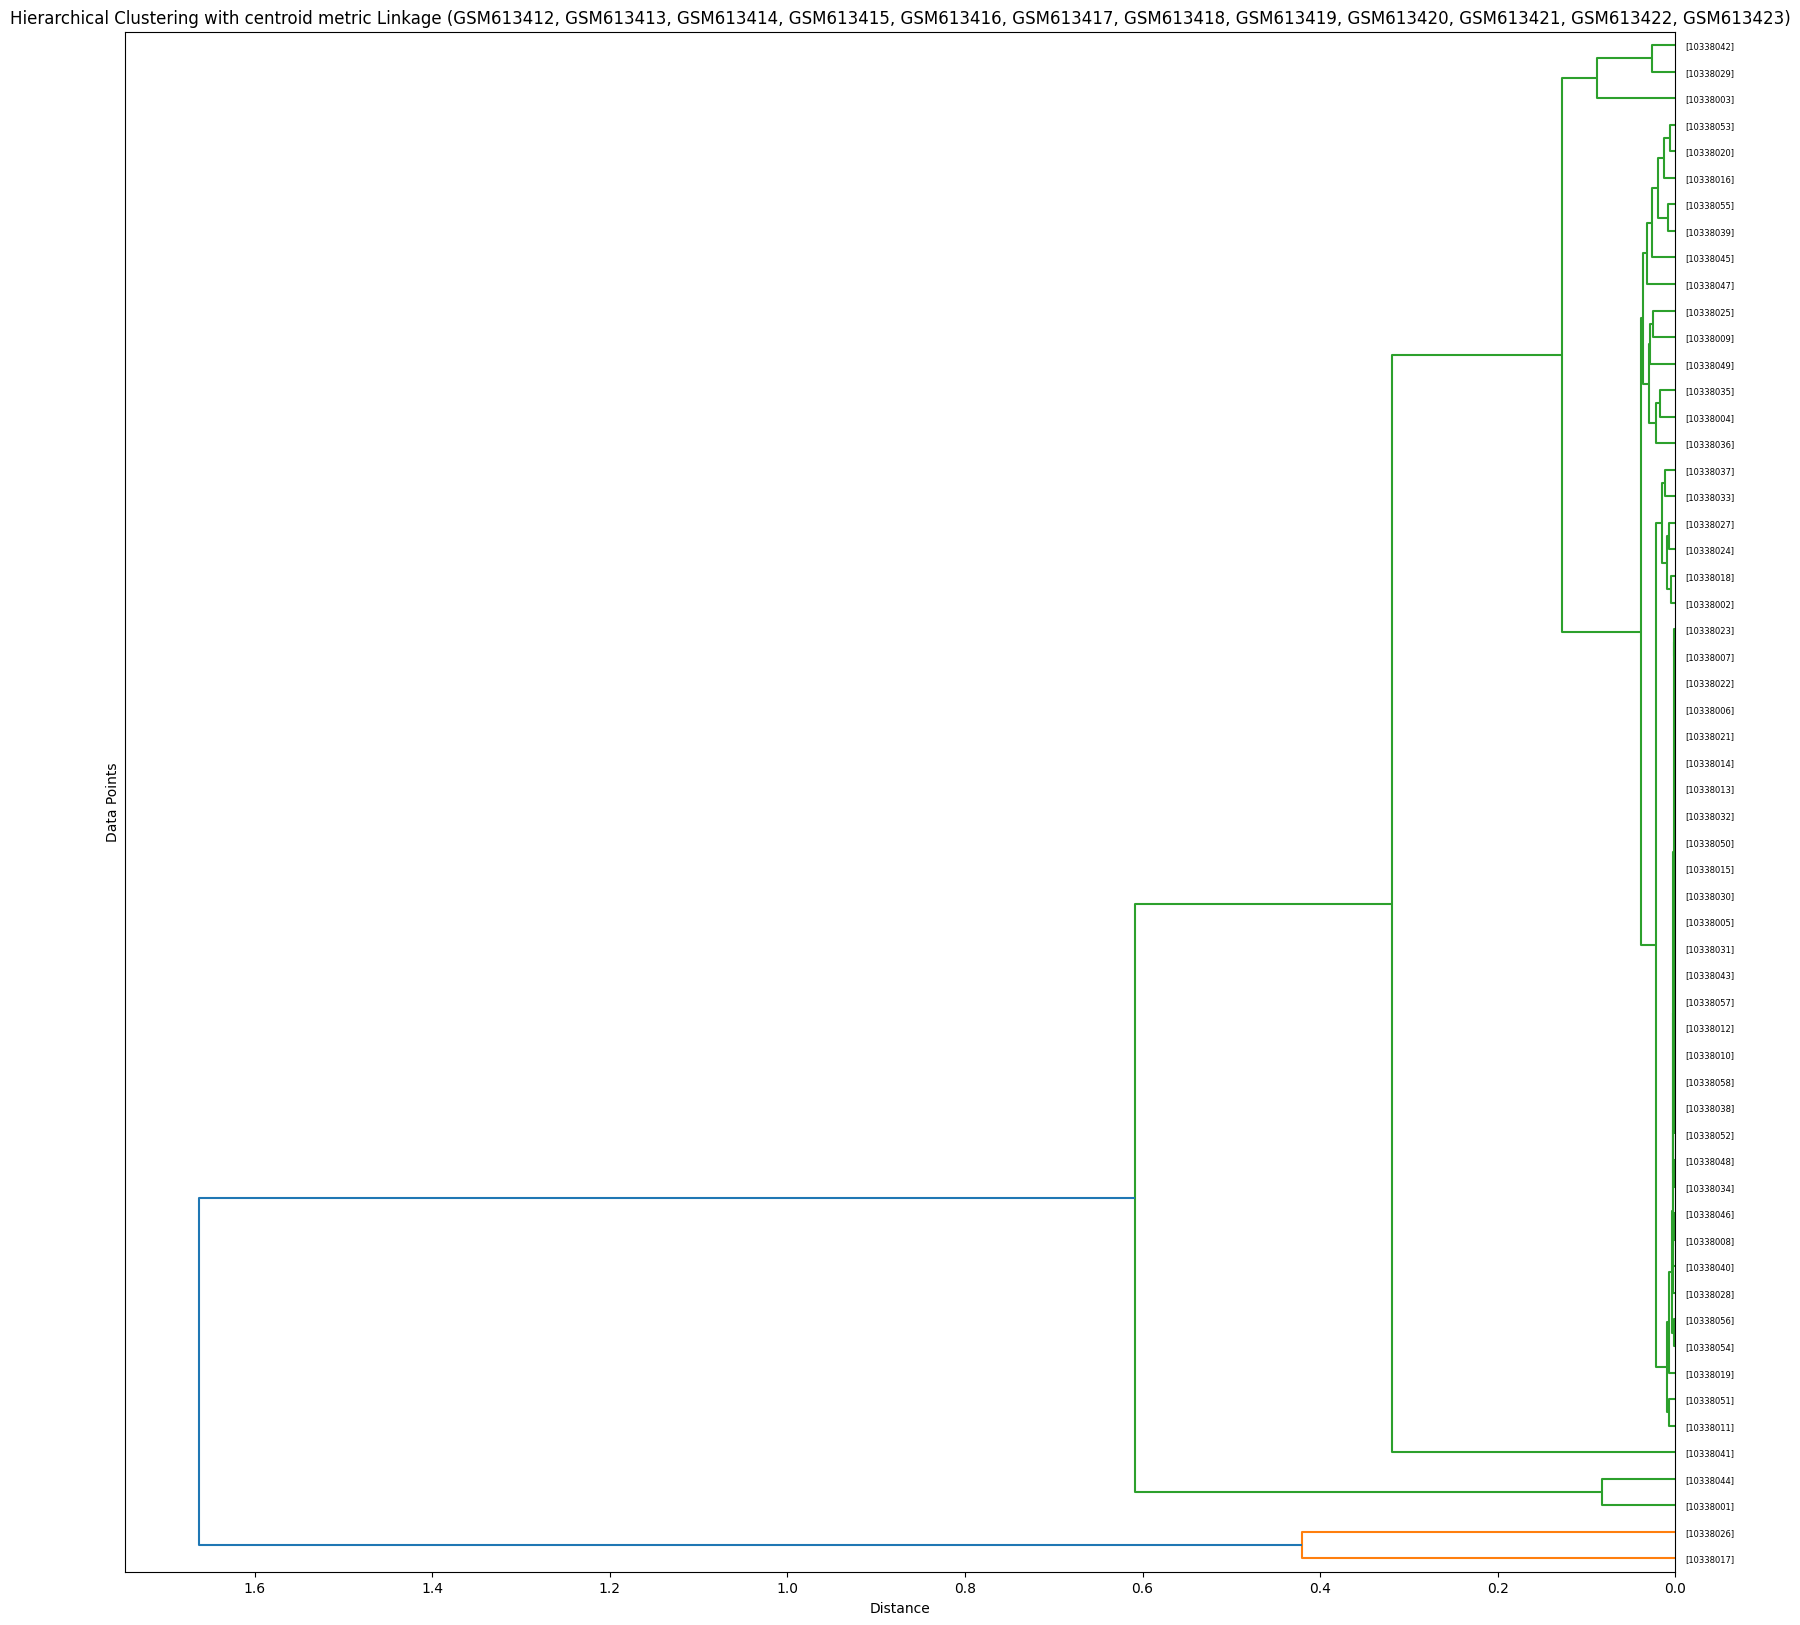

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


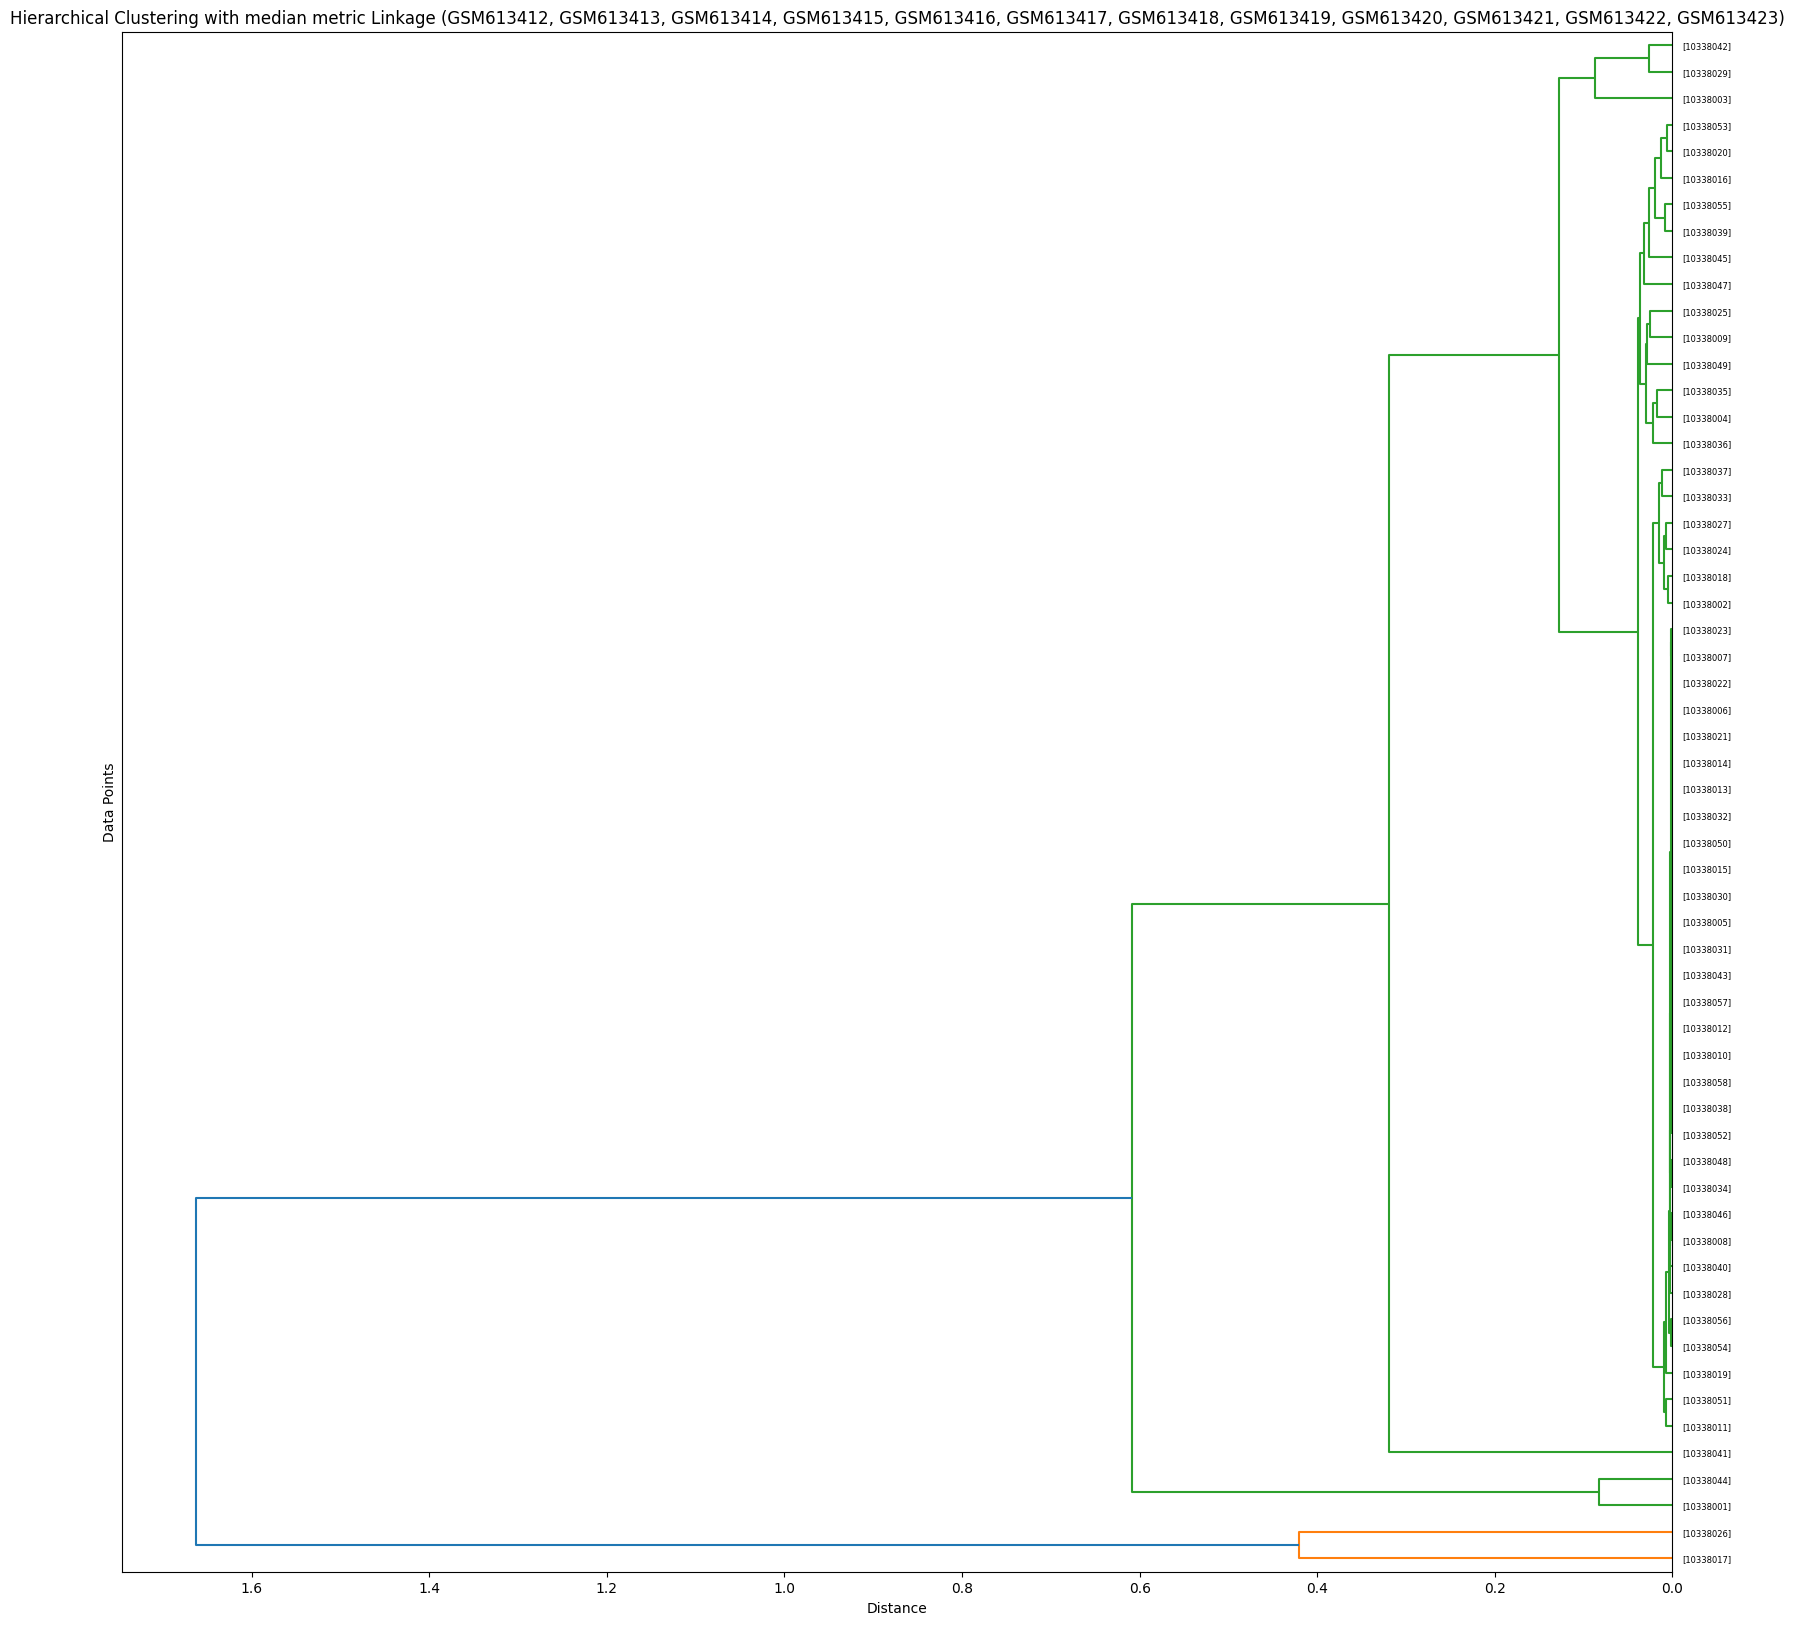

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


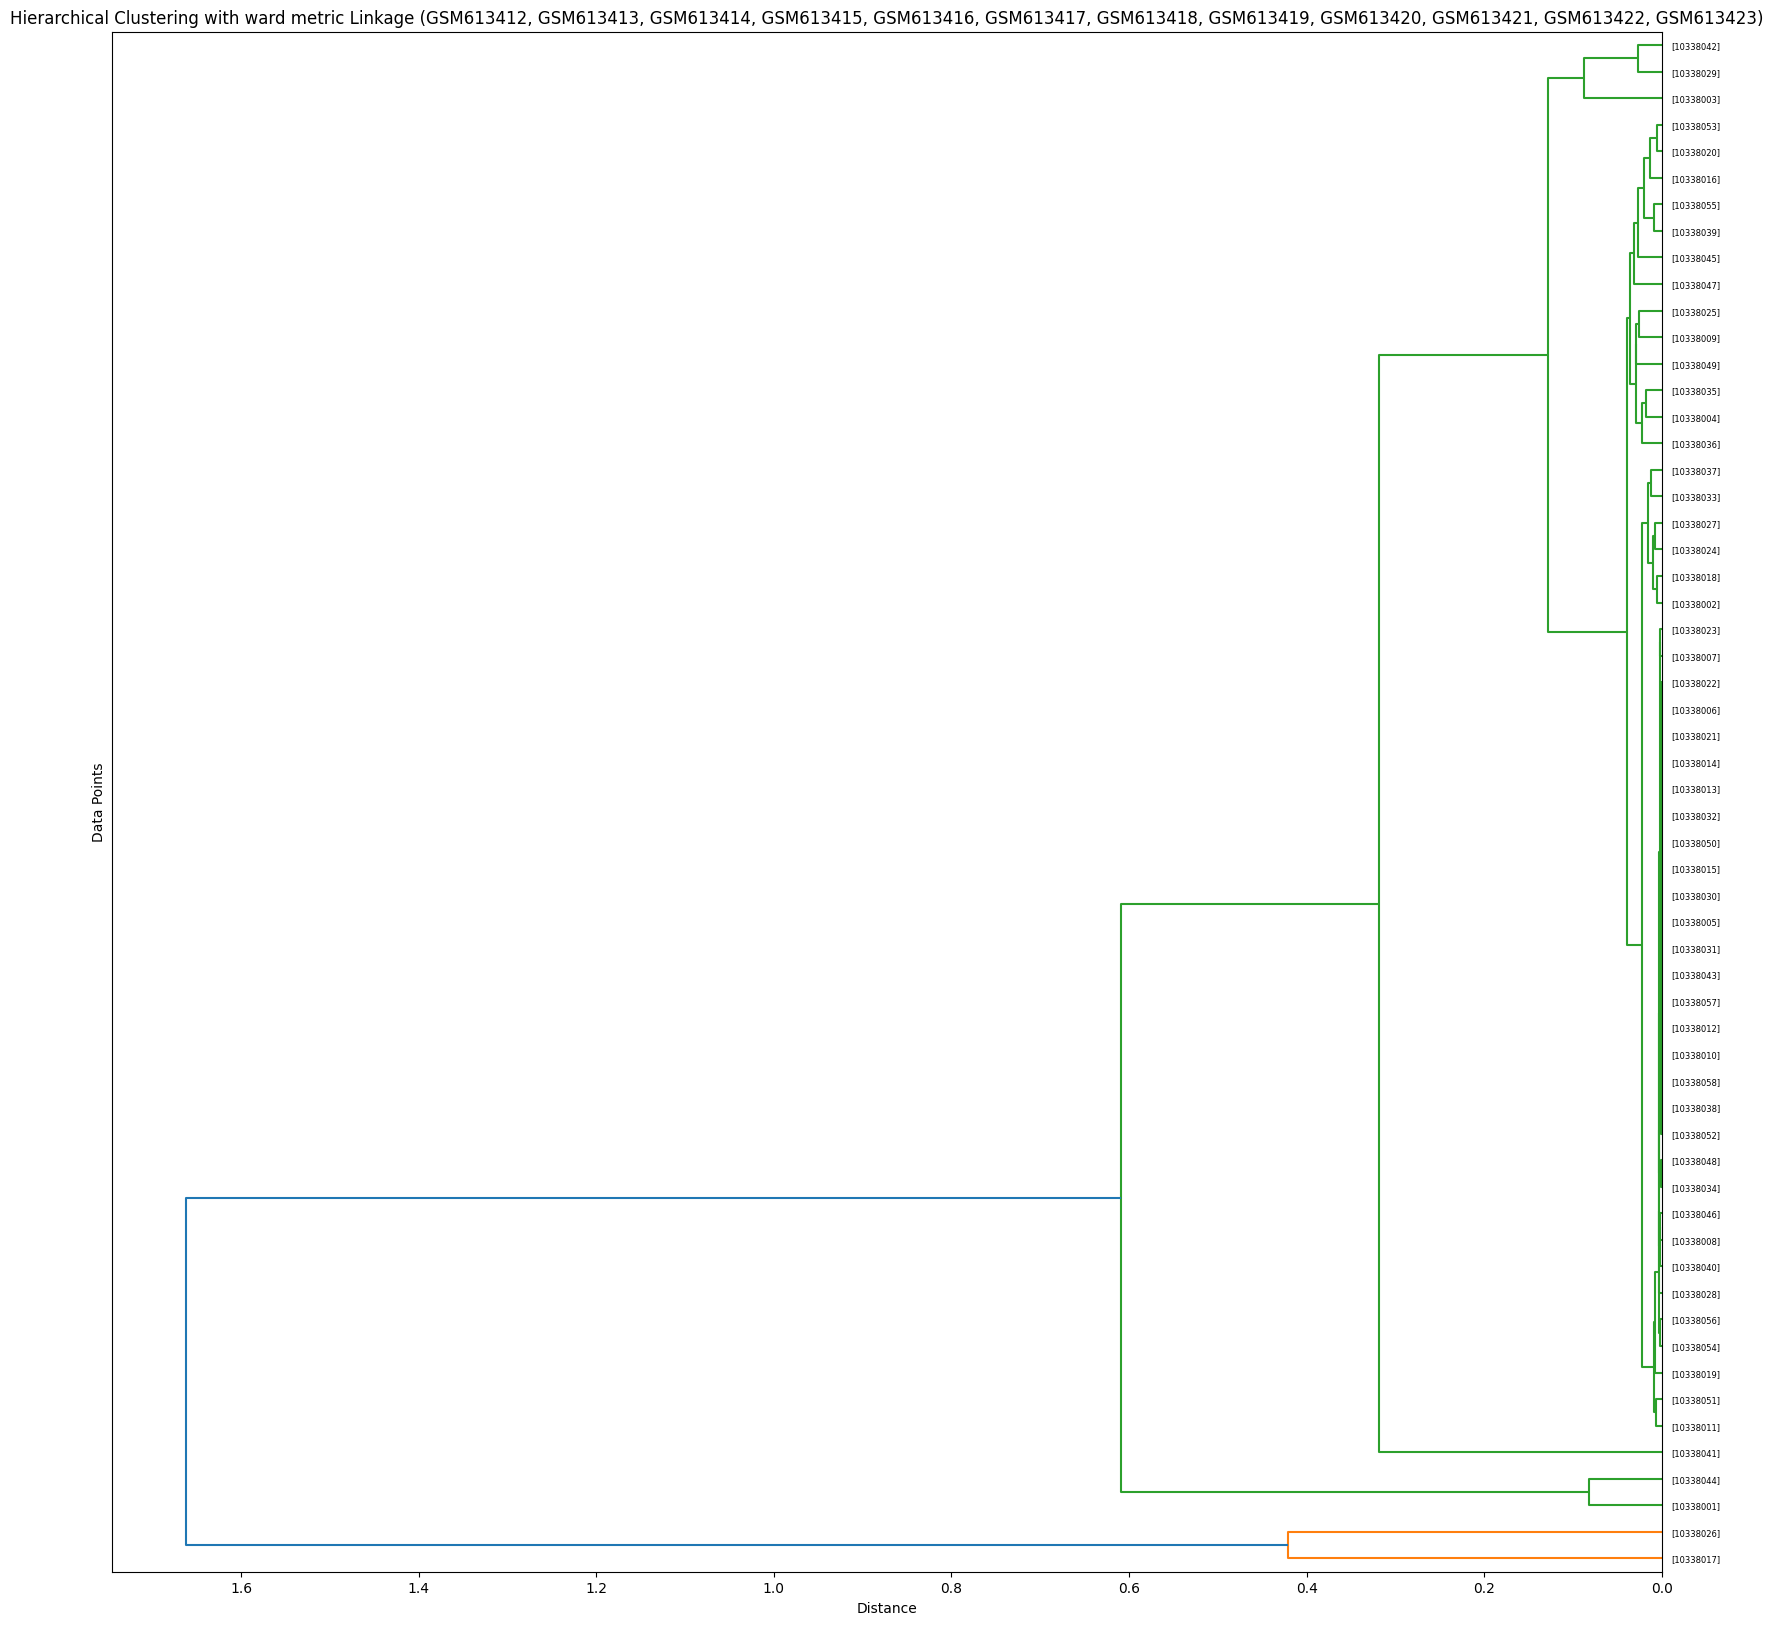

In [17]:
gene_data = pd.read_csv('gene.csv') # reading data 200 rows x 5 columns
selected_features = ['GSM613412','GSM613413','GSM613414','GSM613415','GSM613416','GSM613417','GSM613418','GSM613419','GSM613420','GSM613421','GSM613422','GSM613423']
for feature in selected_features:
    min_val = gene_data[feature].min()
    max_val = gene_data[feature].max()
    gene_data[feature] = (gene_data[feature] - min_val) / (max_val - min_val)
print(gene_data.shape)
display(gene_data)
linkage_metrics = ['single','complete','average','weighted','centroid','median','ward']
# linkage_metrics = ['single']
feature_combinations = [['GSM613412','GSM613413','GSM613414','GSM613415','GSM613416','GSM613417','GSM613418','GSM613419','GSM613420','GSM613421','GSM613422','GSM613423']]
# feature_combinations = [['GSM613412'],['GSM613413'],['GSM613414'],['GSM613415'],['GSM613416'],['GSM613417'],['GSM613418'],['GSM613419'],['GSM613420'],['GSM613421'],['GSM613422'],['GSM613423']]
HCG = Hierarchial_Clustering()
for features in feature_combinations:
    for linkage_metric in linkage_metrics:
        linkage_matrix = HCG.linkages(gene_data[features].values)
        feature_str = ', '.join(features)
        title = f"Hierarchical Clustering with {linkage_metric} metric Linkage ({feature_str})"
        HCG.dendrogram(linkage_matrix,gene_data[['ID_REF']].values,title)


/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


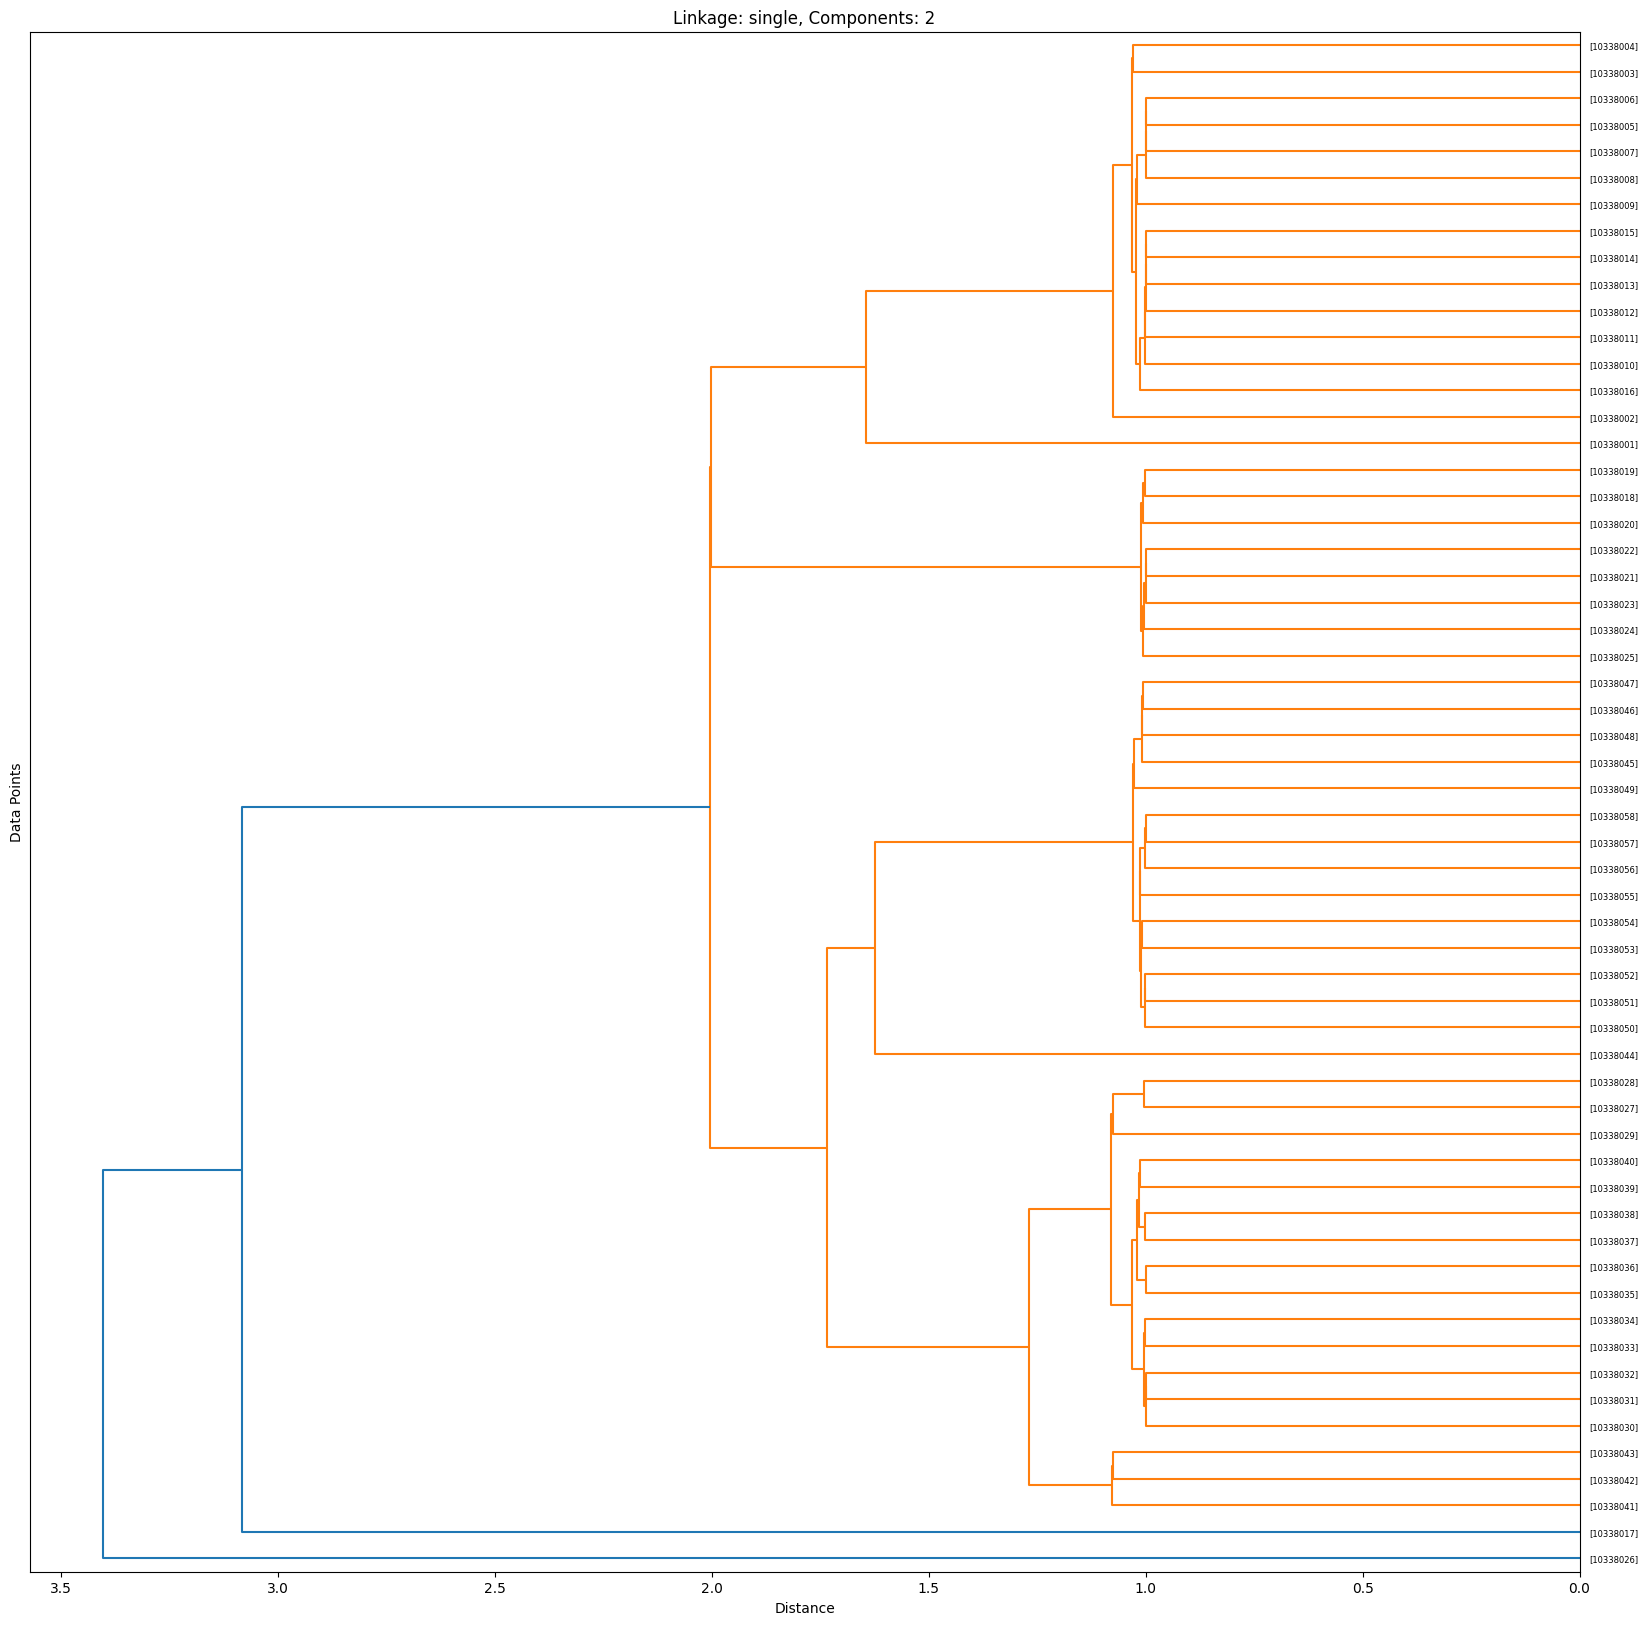

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


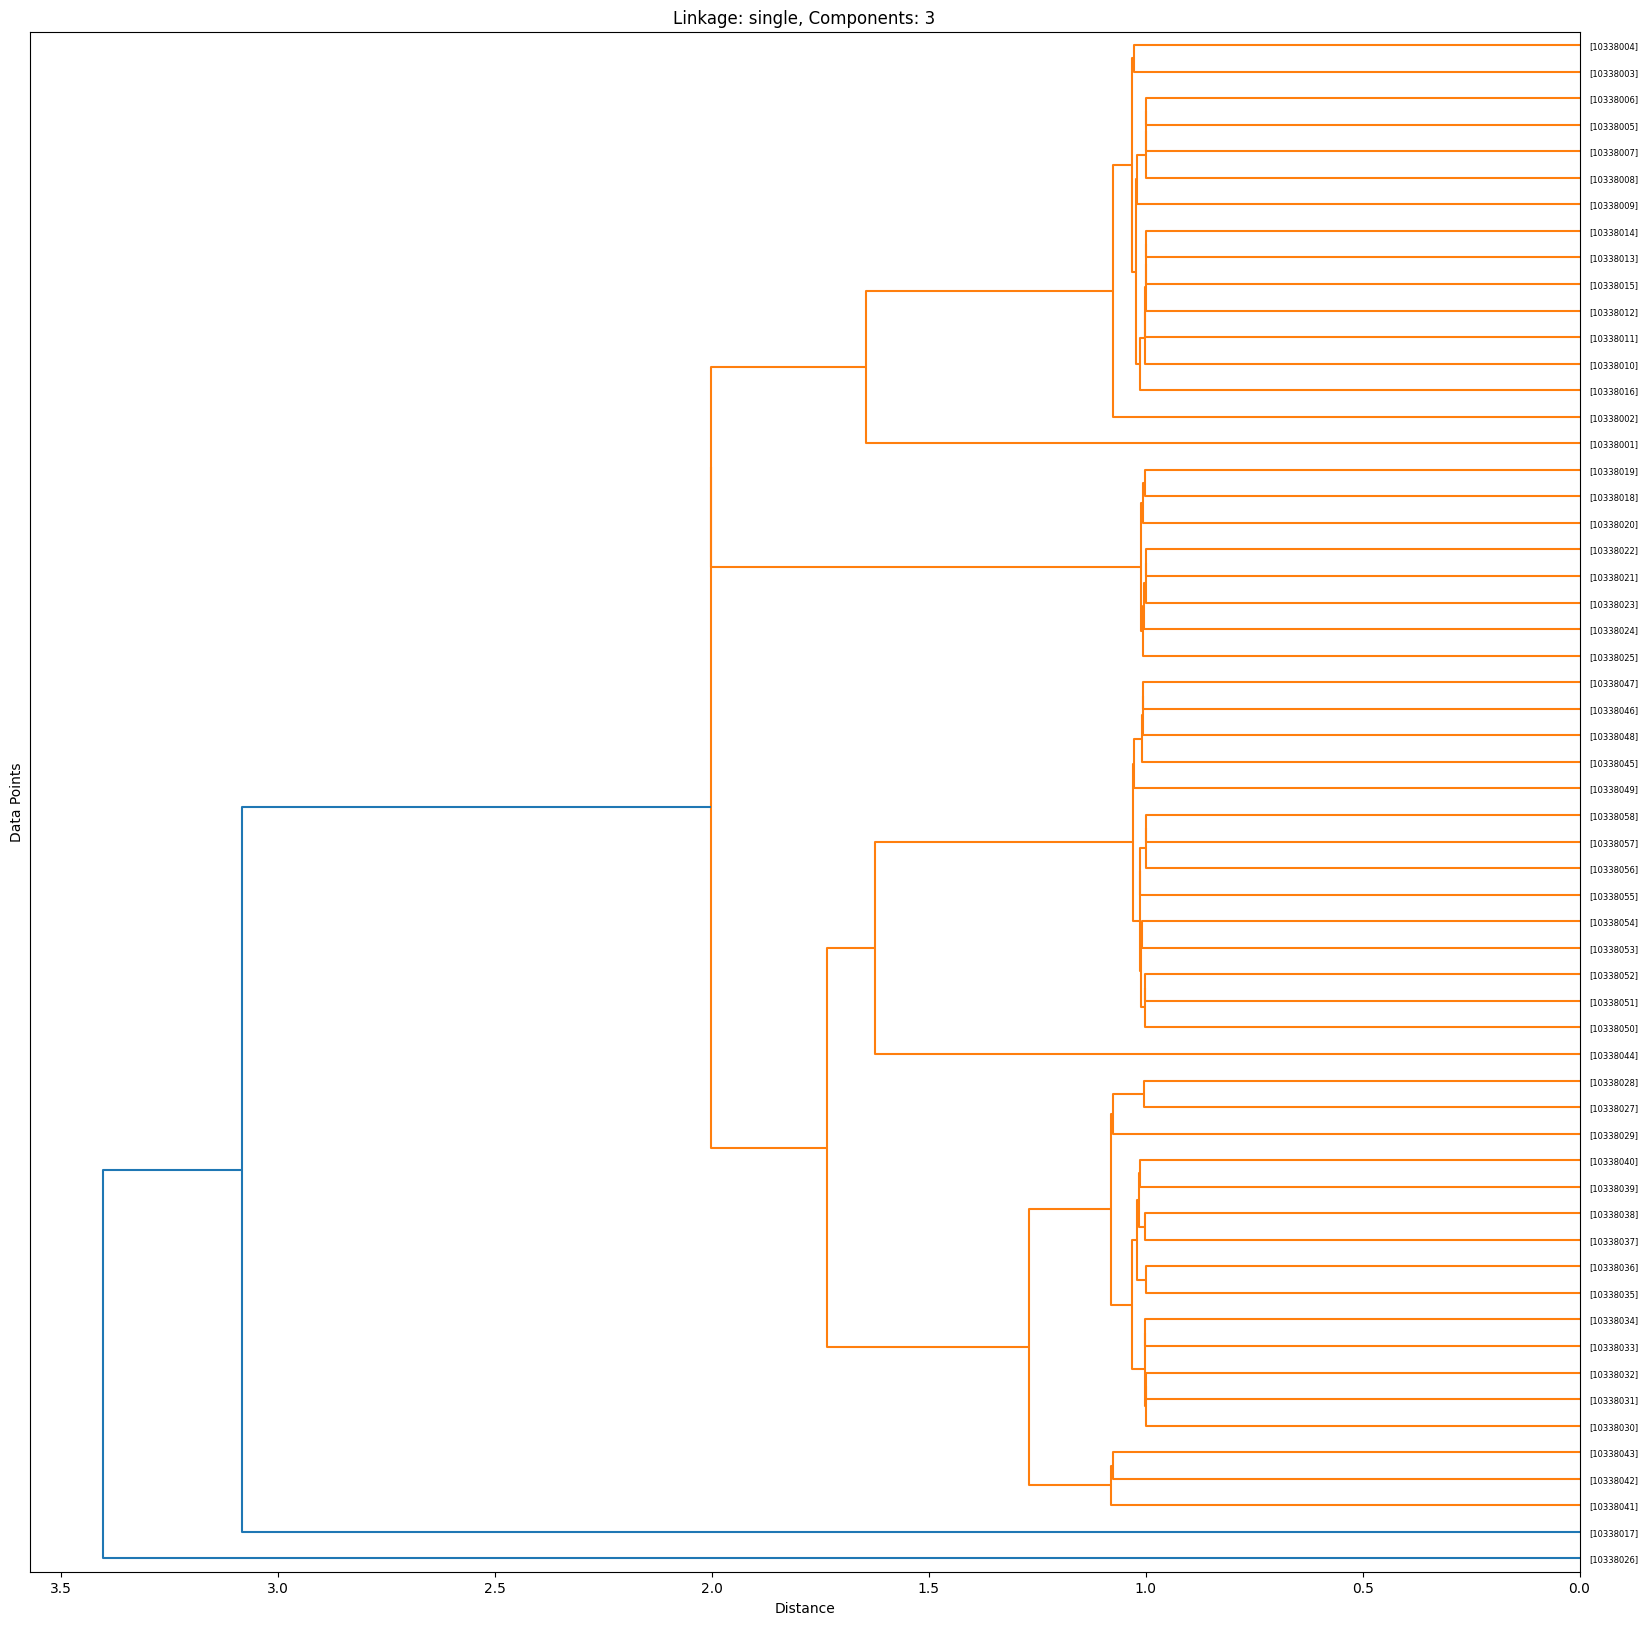

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


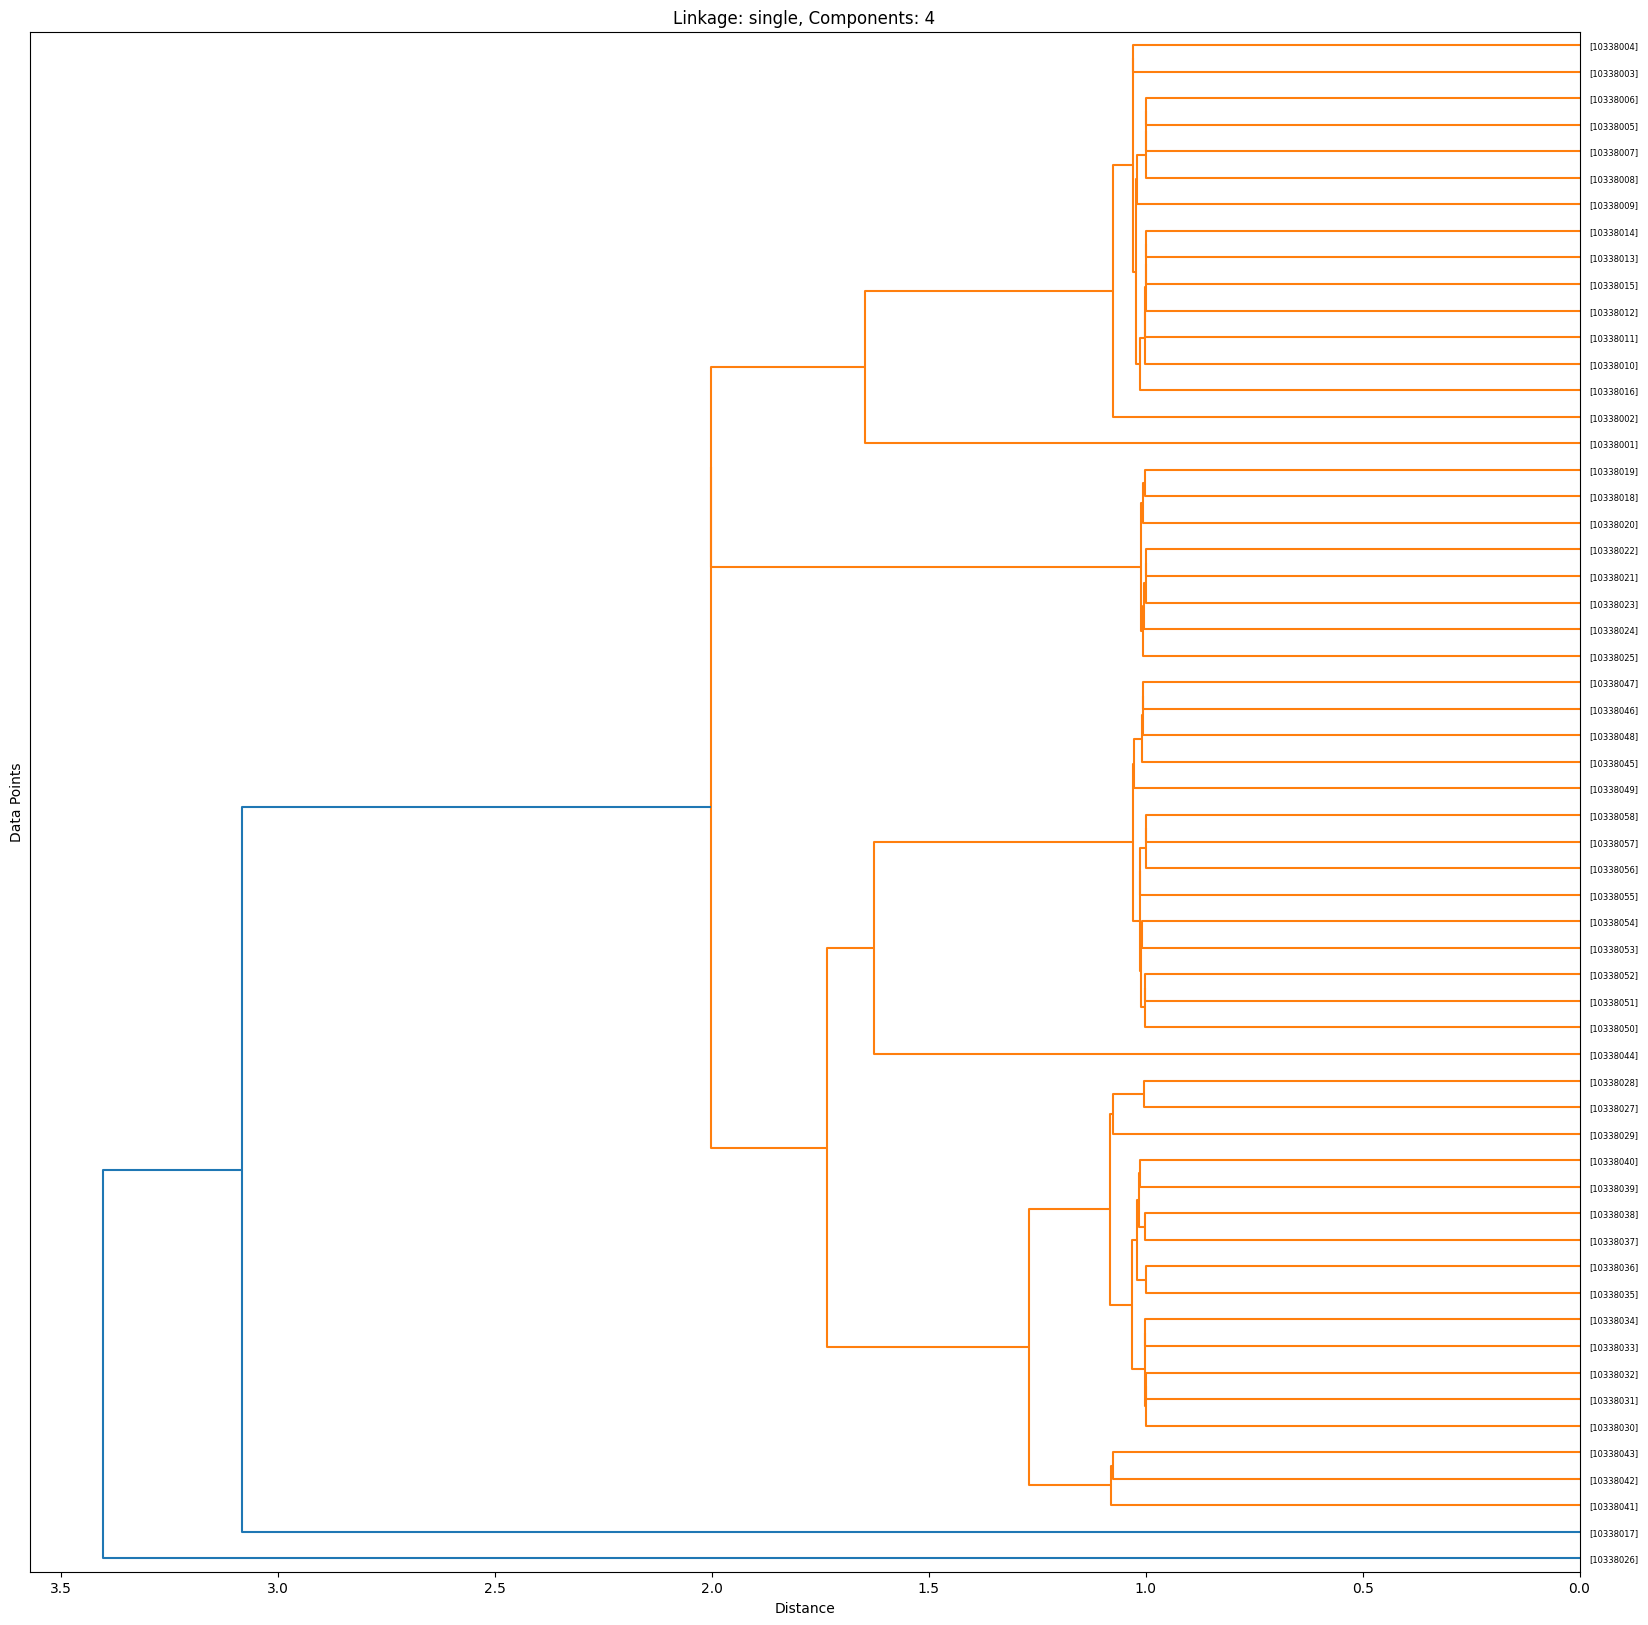

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


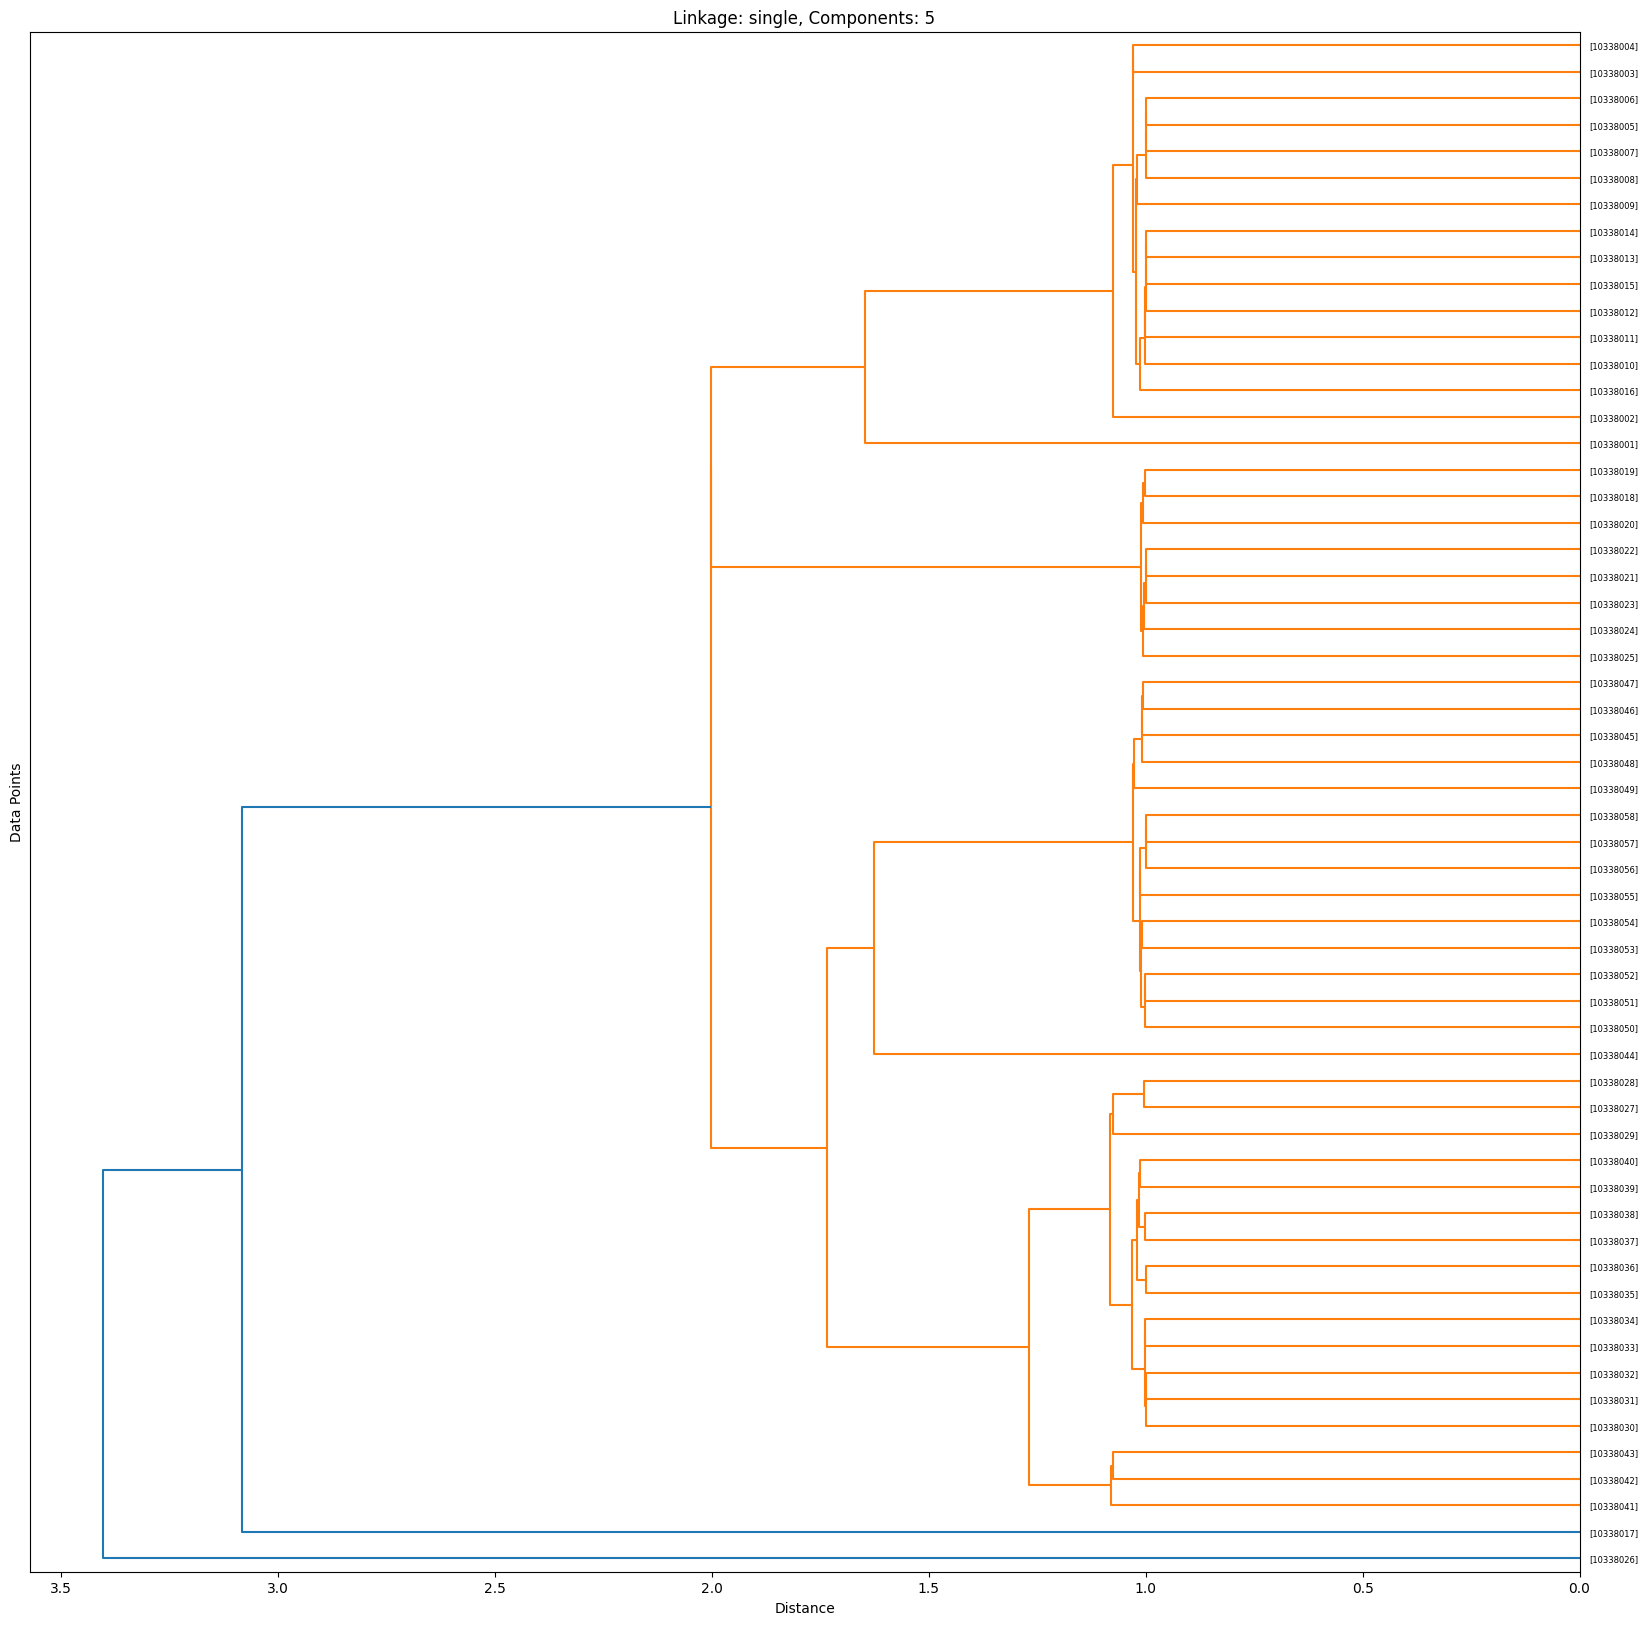

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


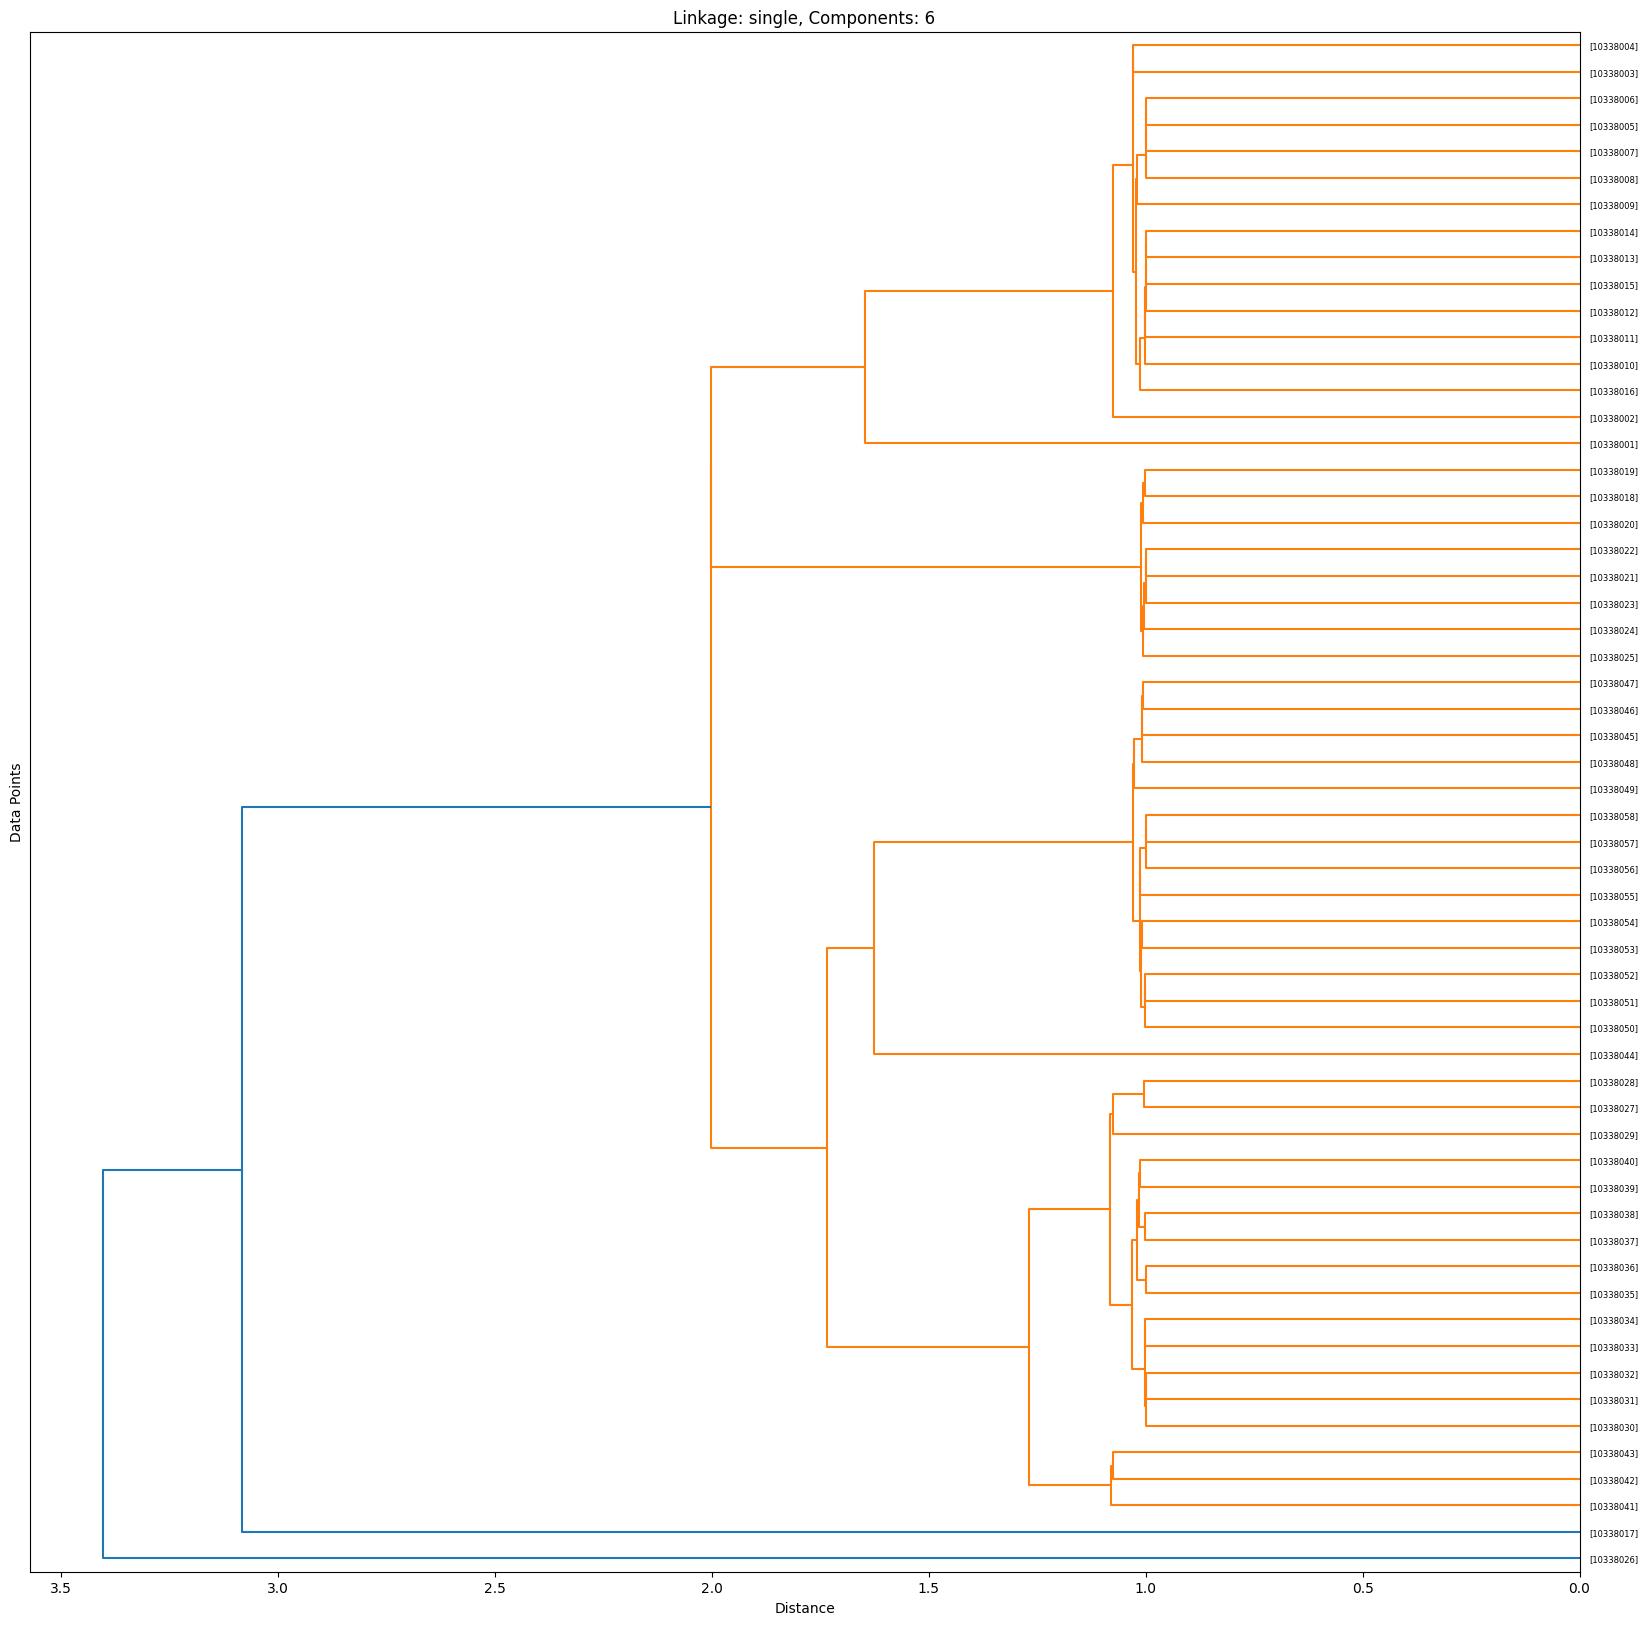

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


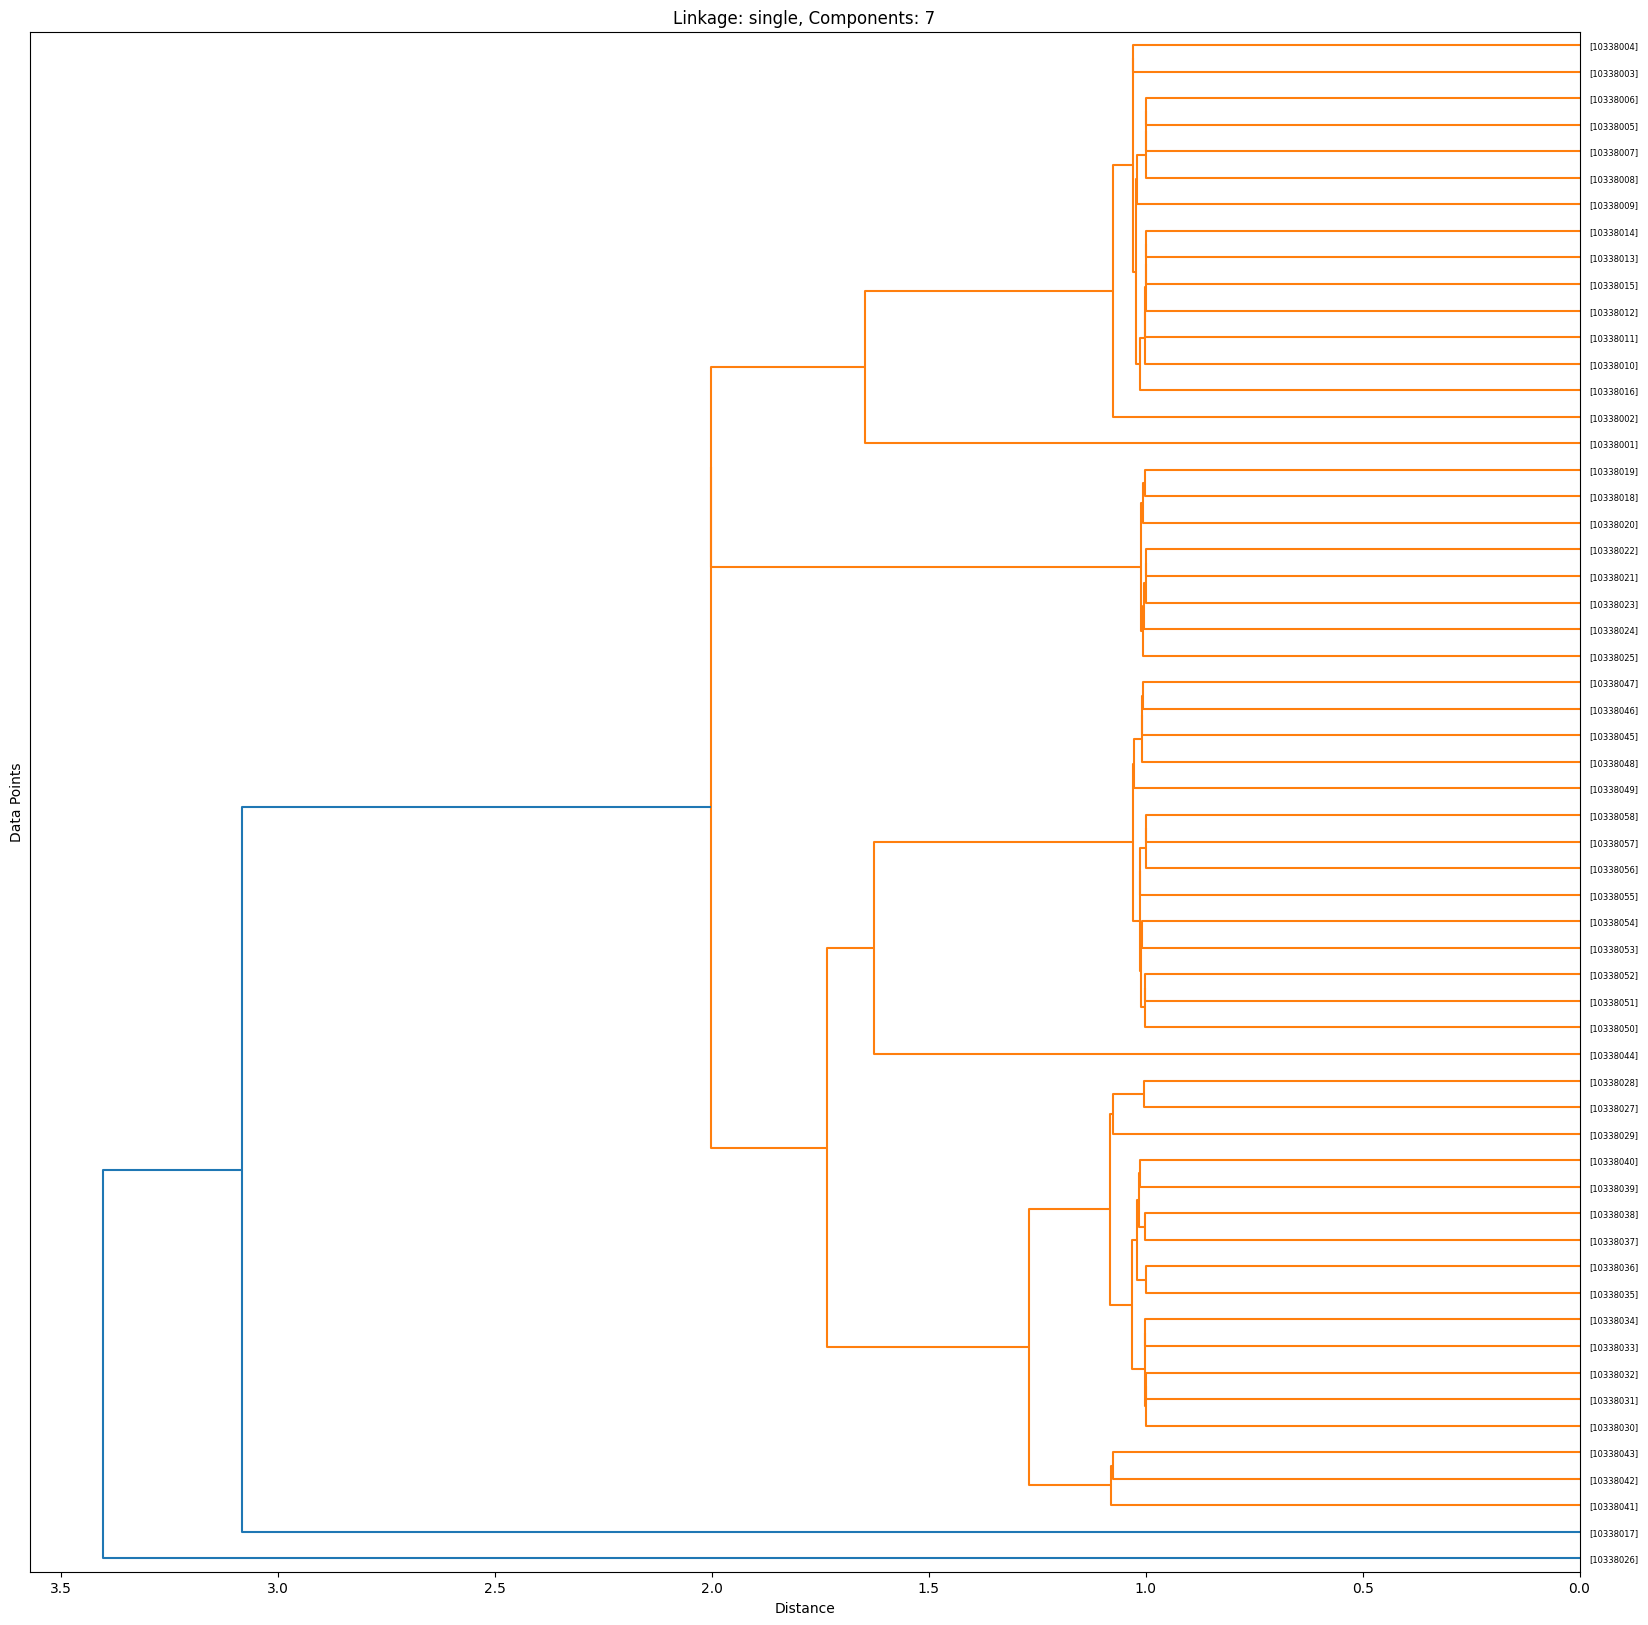

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


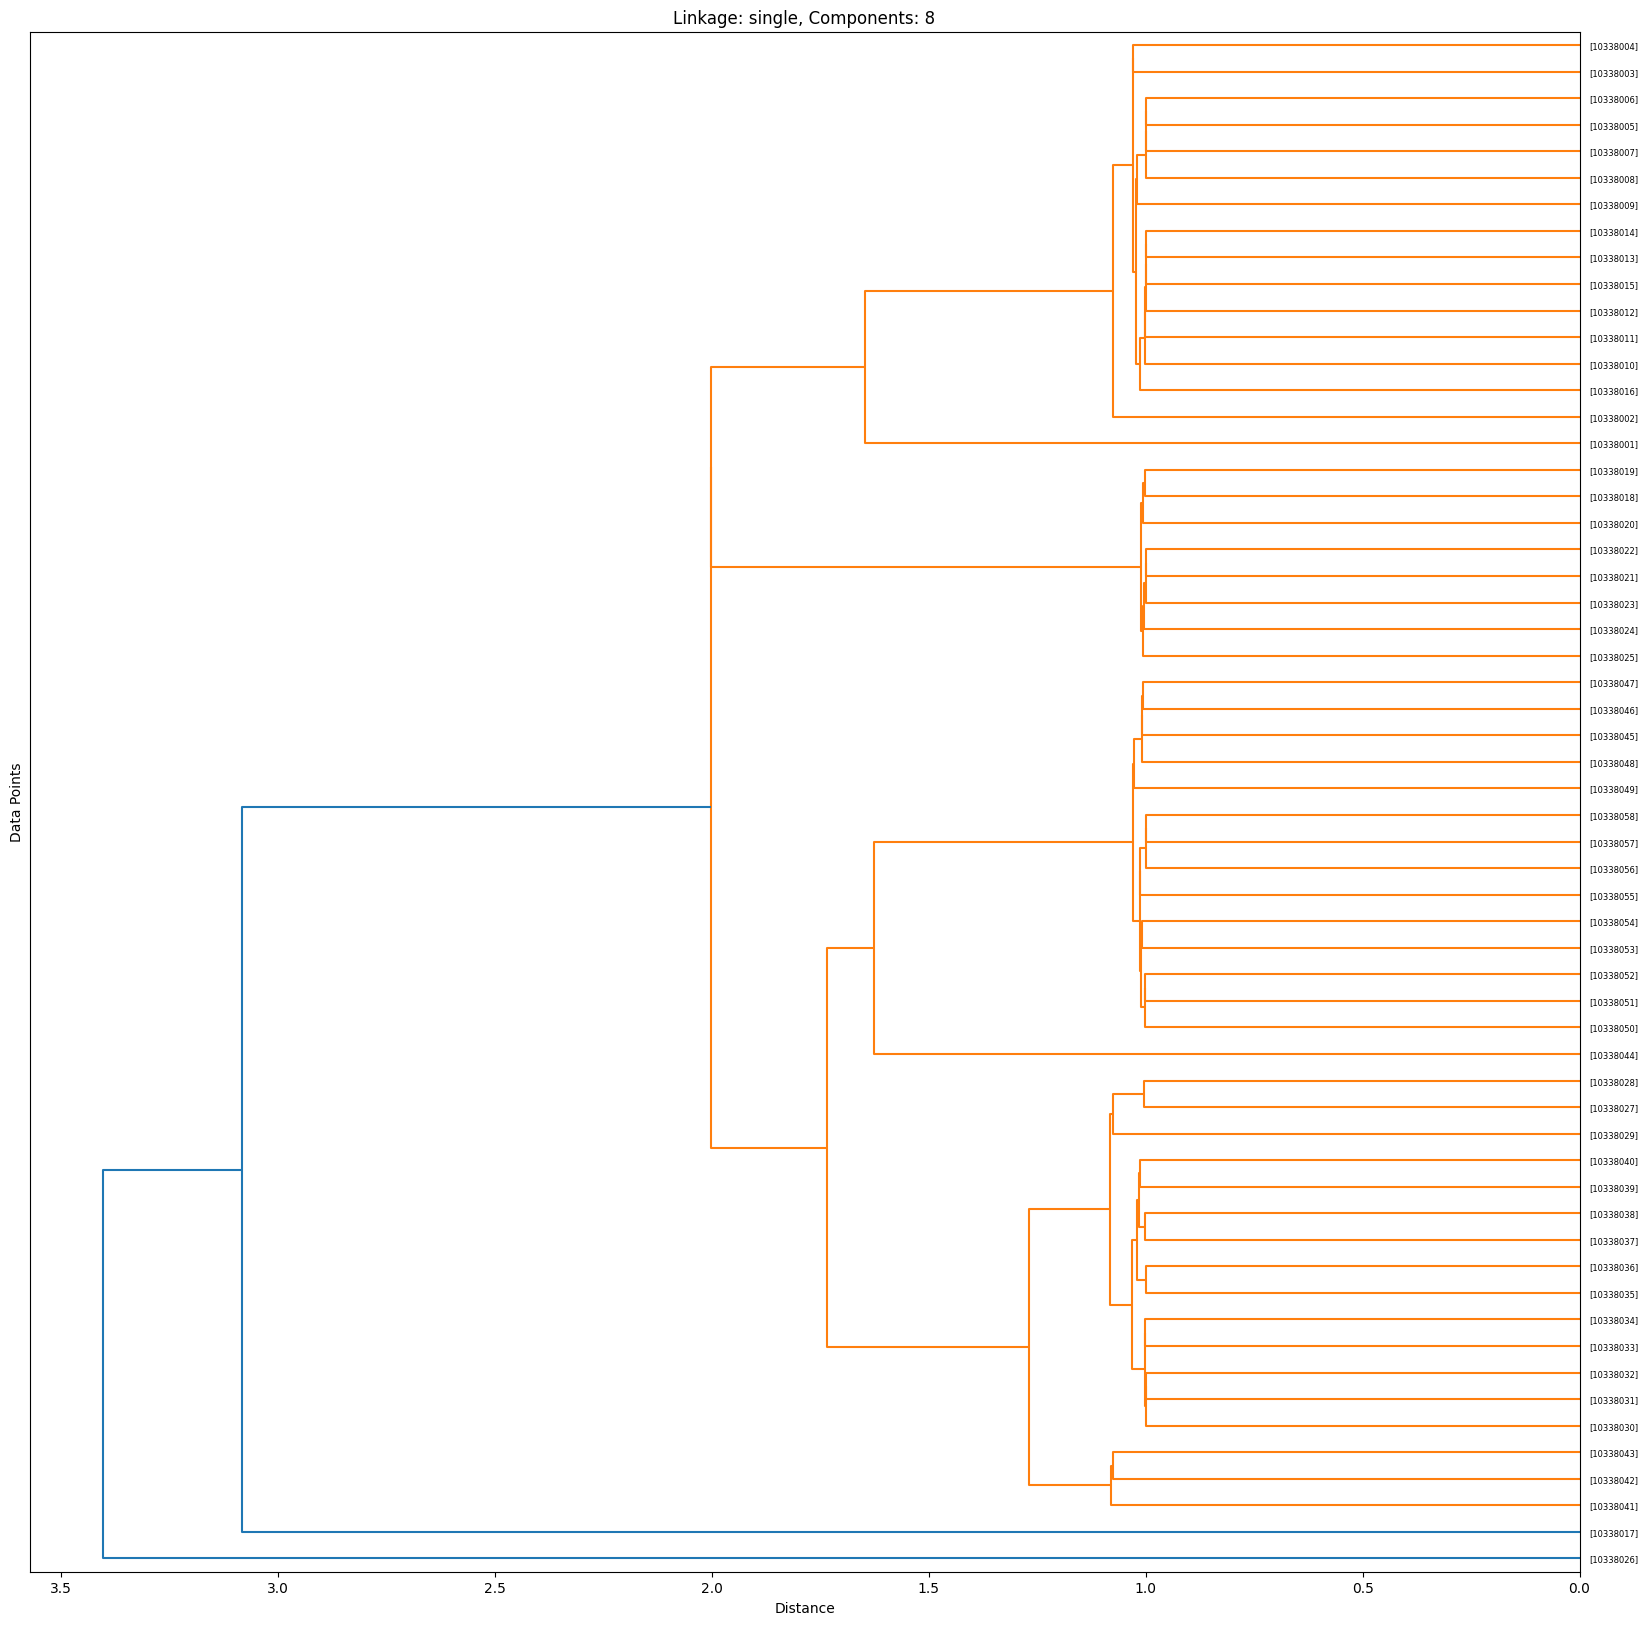

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


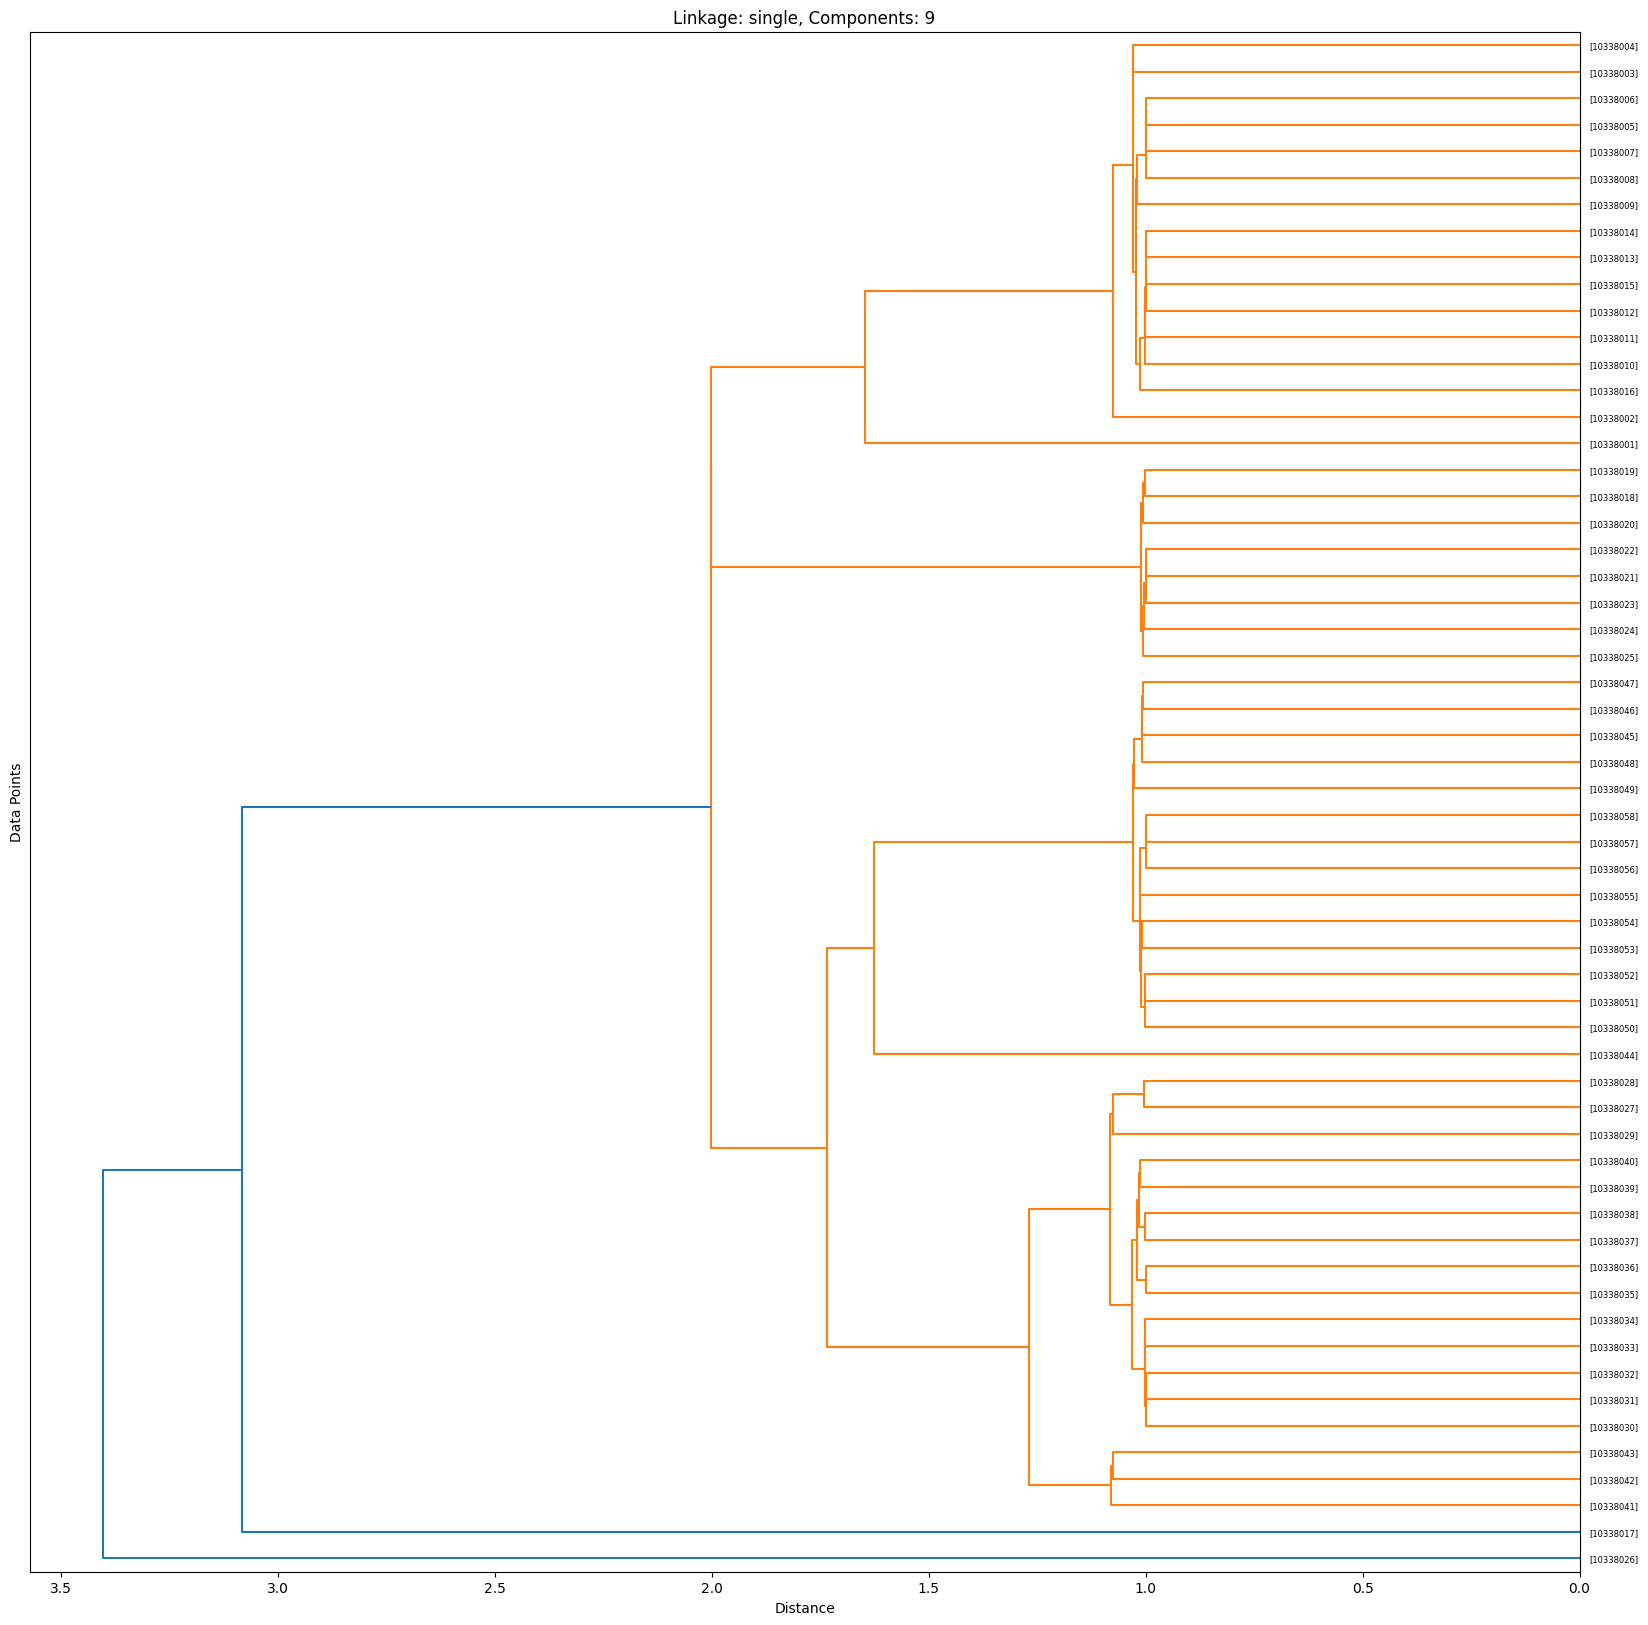

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


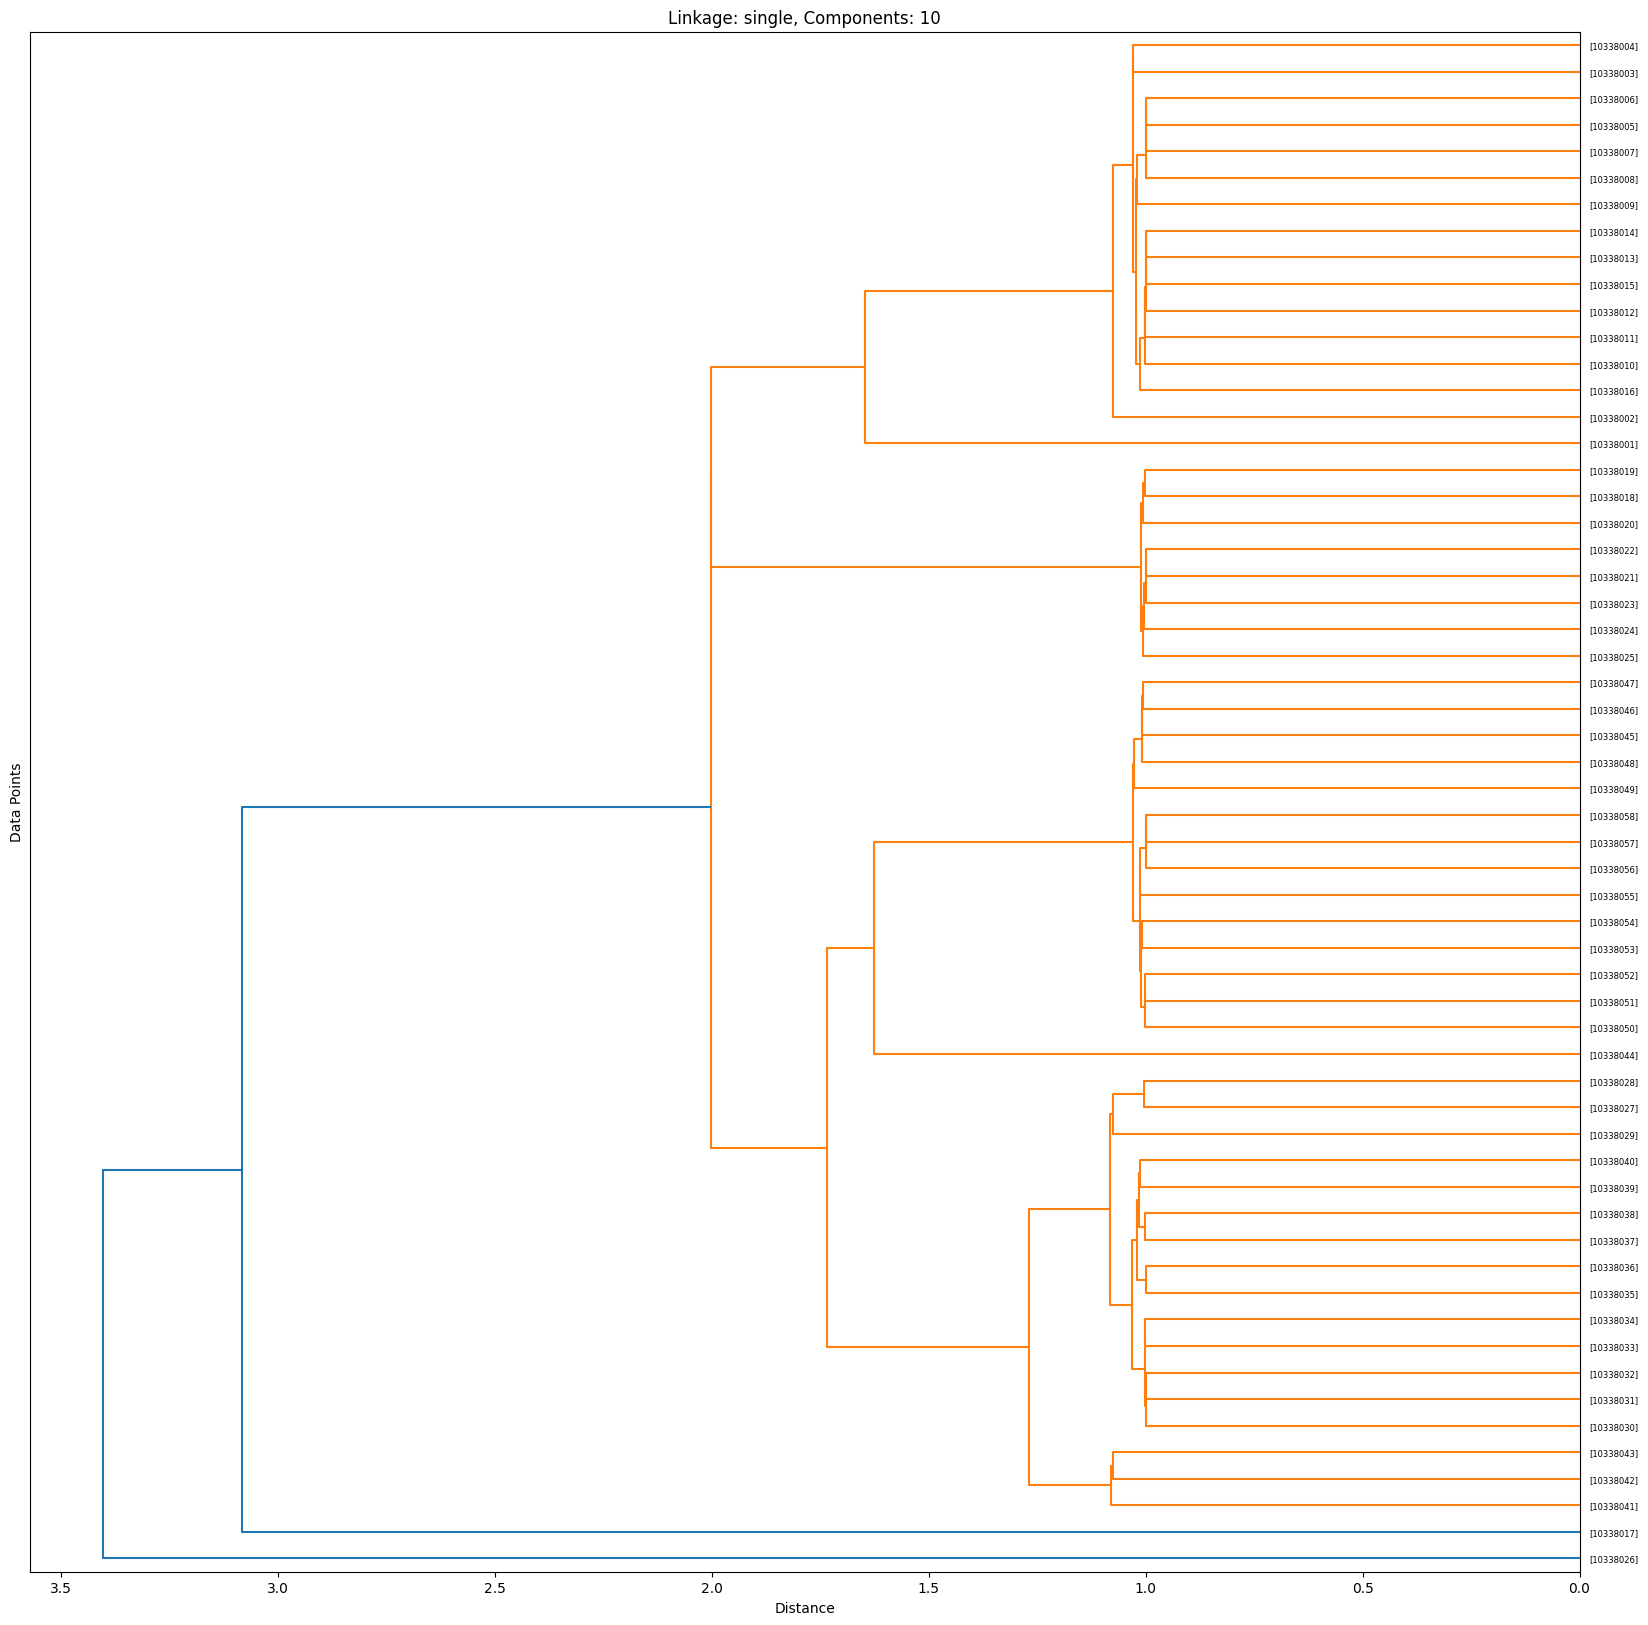

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


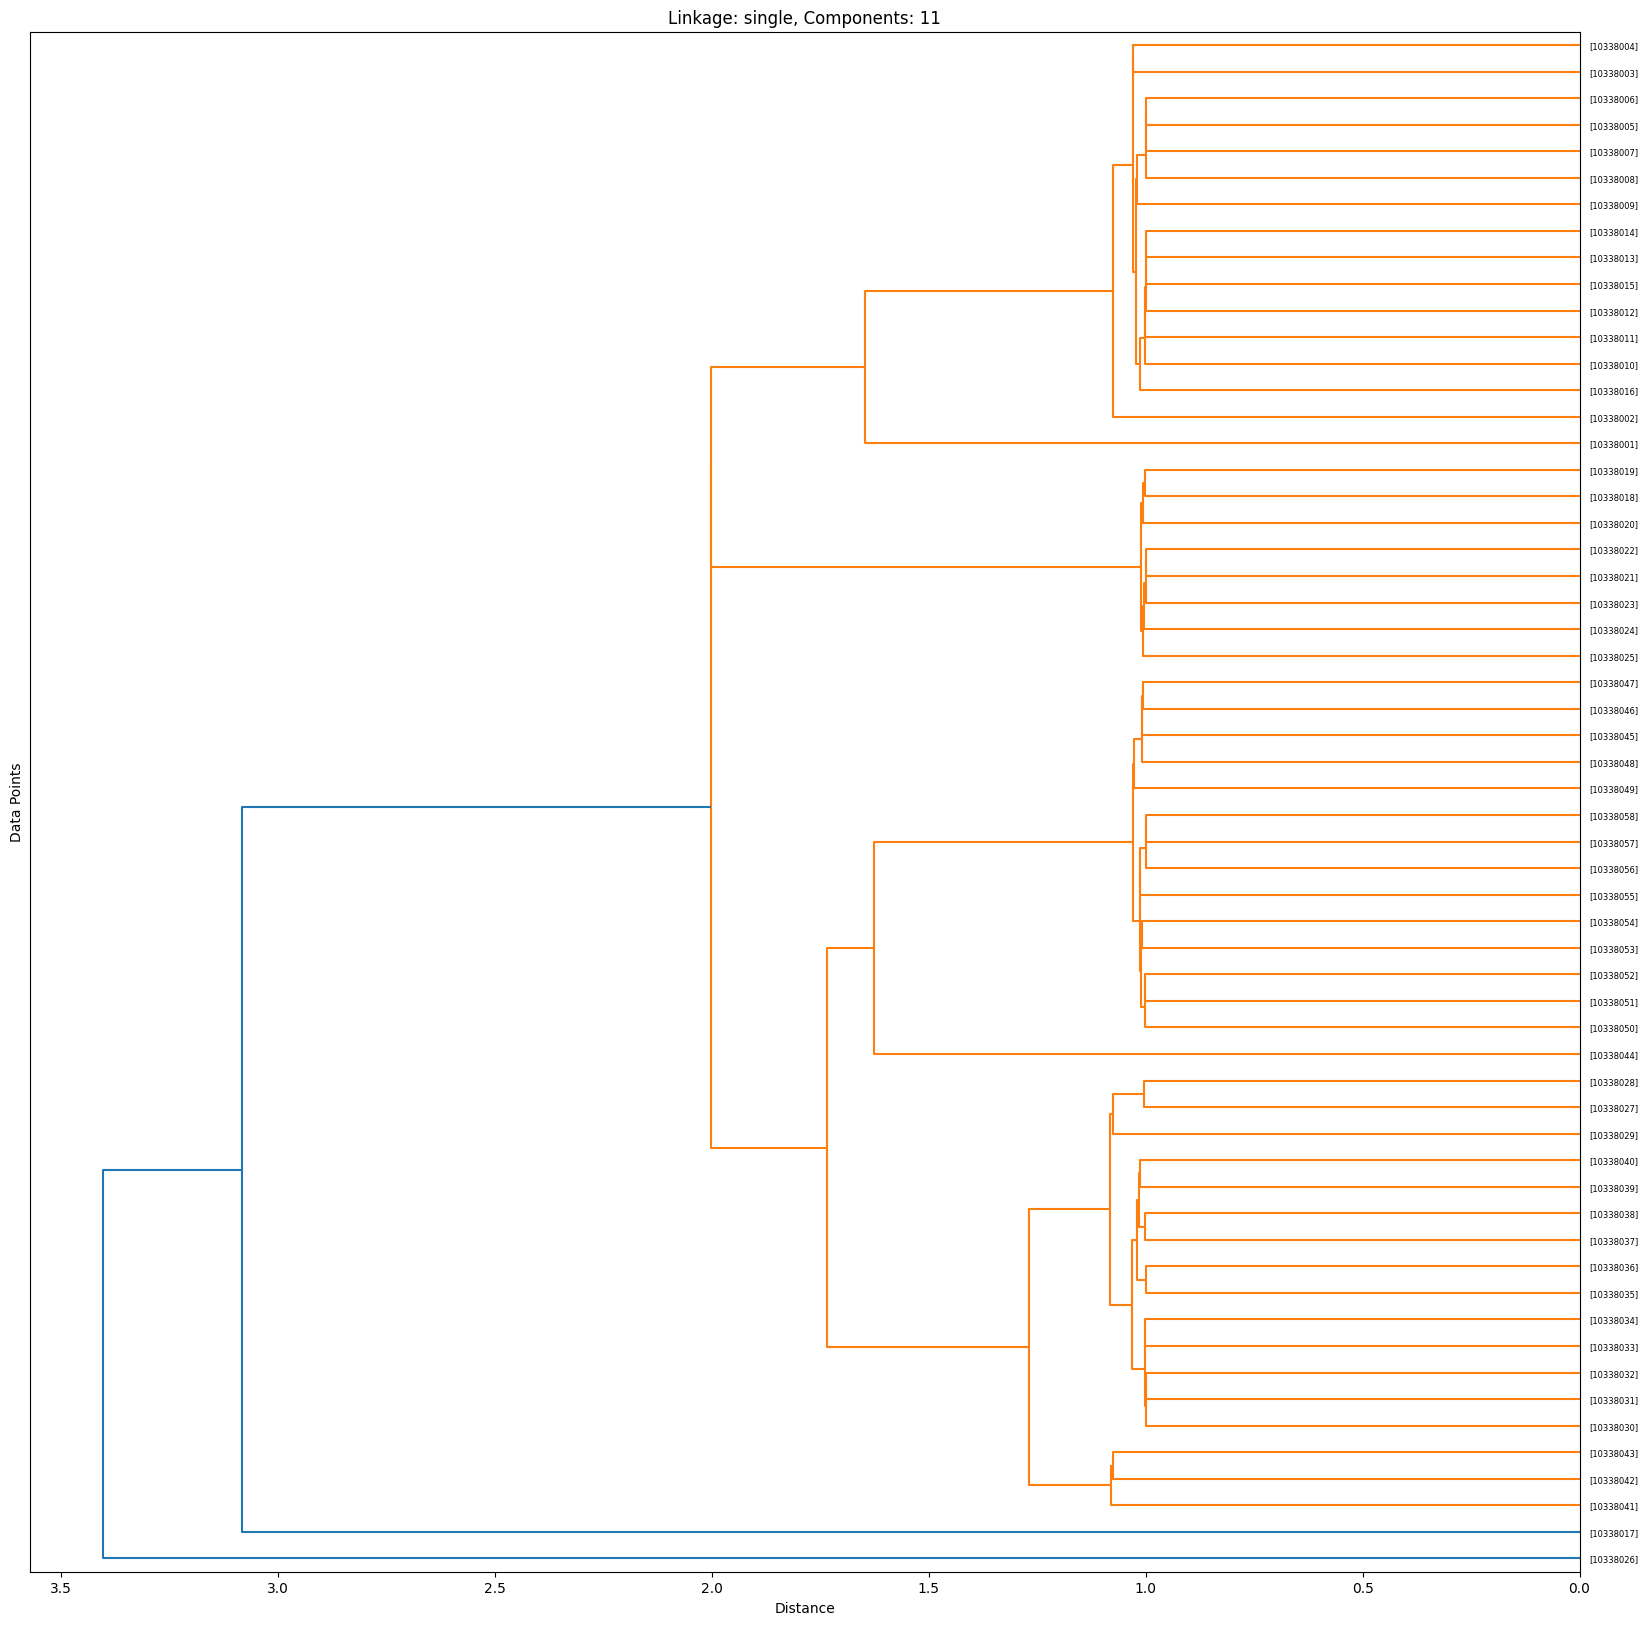

/home/rohit172/.local/lib/python3.8/site-packages/matplotlib/text.py:1241: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


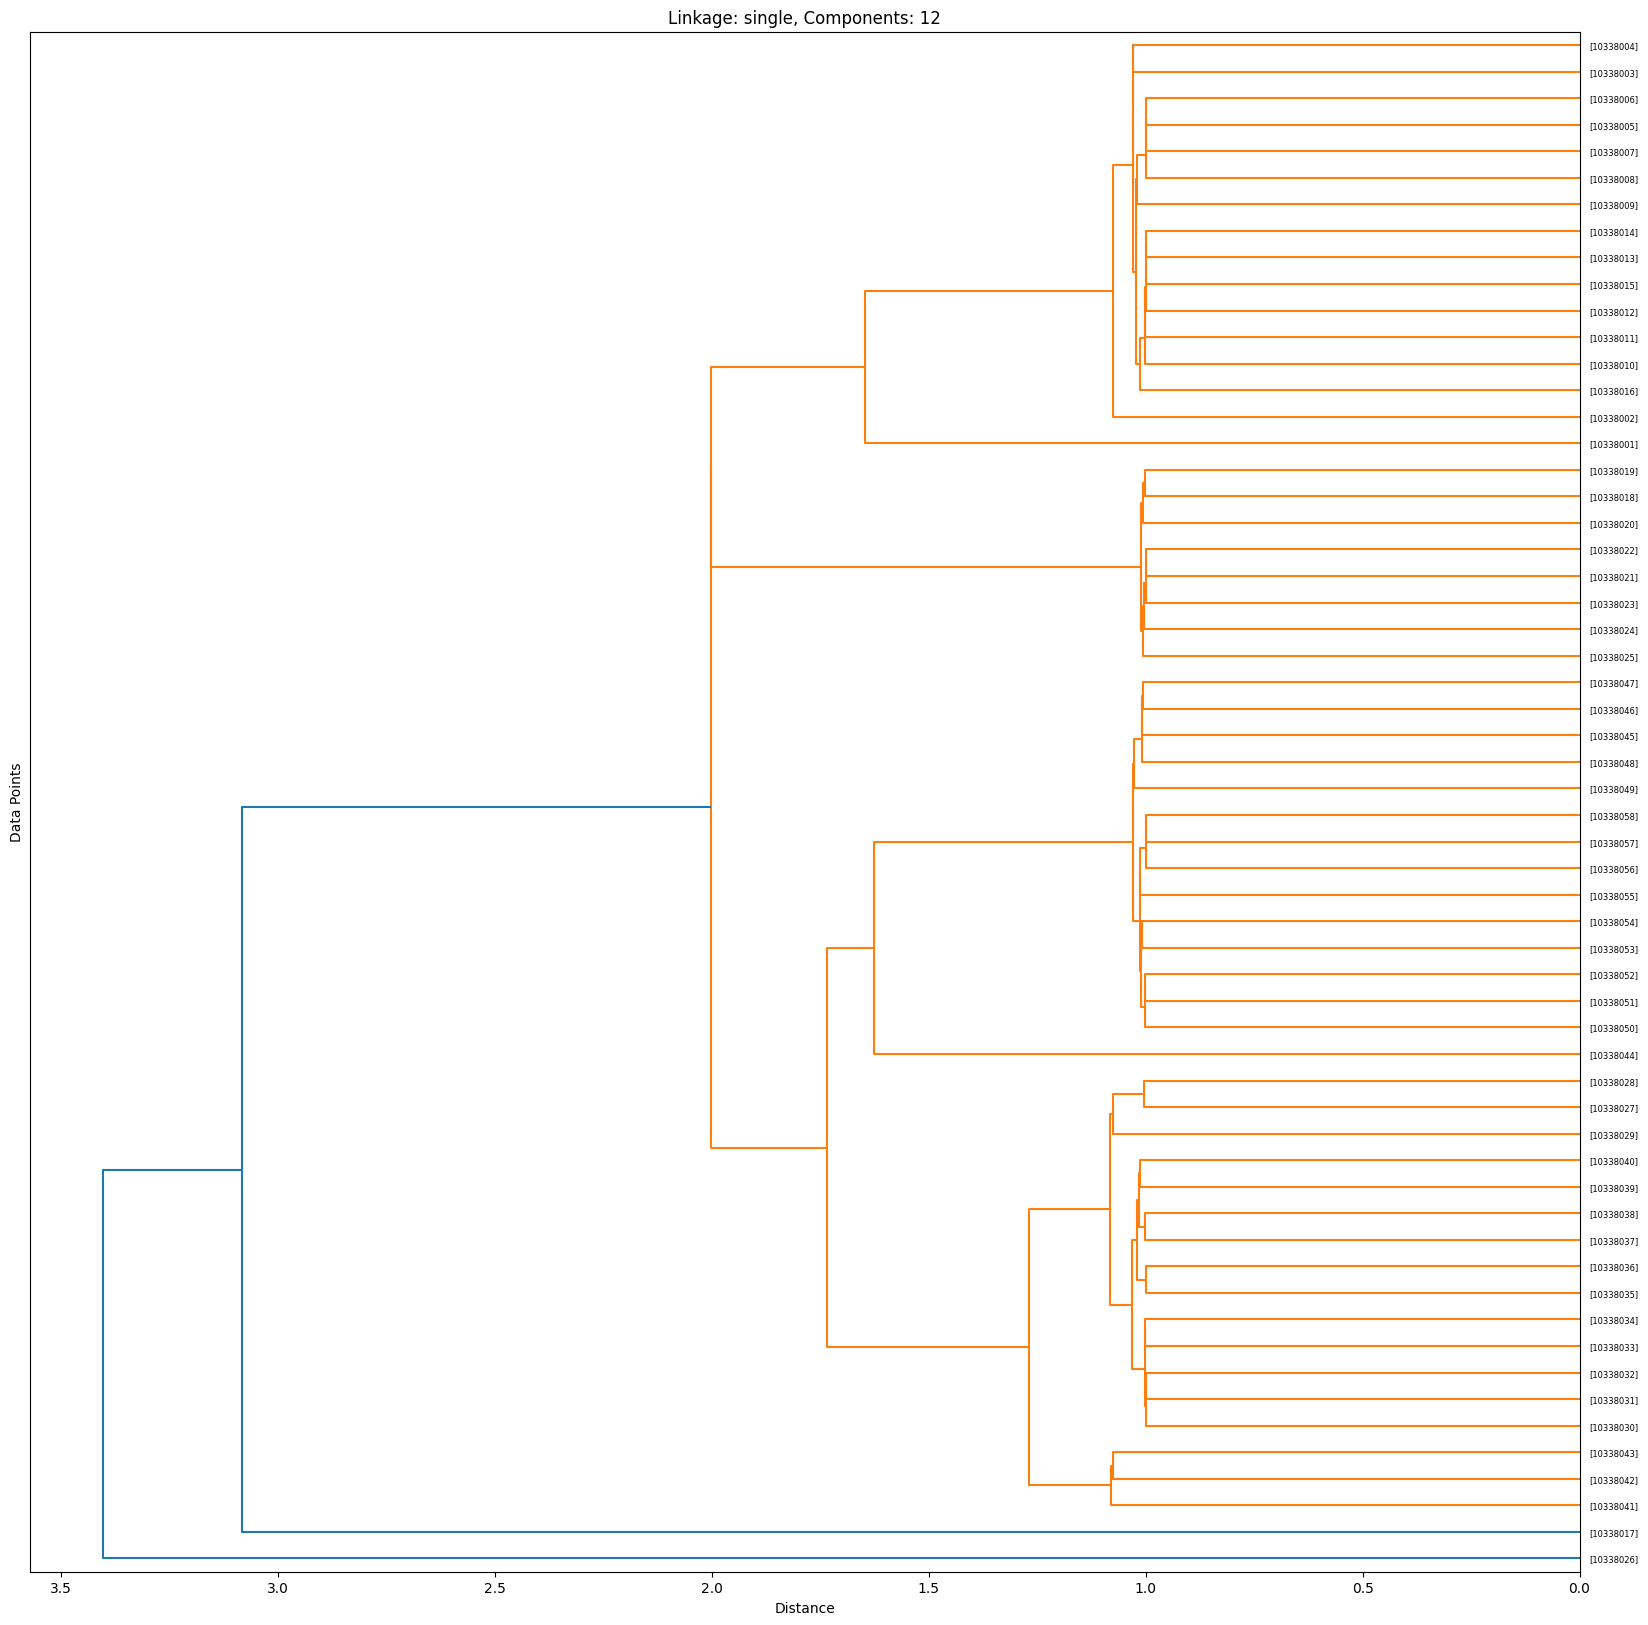

In [18]:
linkage_methods = ["single"]
HC = Hierarchial_Clustering()
for linkage_type in linkage_methods:
    num_features = gene_data.shape[1]
    for n_components in range(2, num_features):
        pca = PCA(n_components=n_components)
        gene_data_pca = pca.fit_transform(gene_data)
        linkage_matrix = HC.linkages(gene_data_pca)
        title = f'Linkage: {linkage_type}, Components: {n_components}'
        HC.dendrogram(linkage_matrix,gene_data[['ID_REF']].values,title)

# General Observations for Gene Dataset

## Comparison Across Linkage Methods
```
- The choice of linkage method continues to play a significant role in hierarchical clustering for the gene dataset. Different linkage methods will impact the shapes and sizes of clusters in the gene dataset as well.
- For instance, Ward linkage may lead to clusters with relatively uniform sizes, whereas single linkage might result in clusters of varying sizes, influenced by the specific gene expression profiles.
```
## Limited Contribution of Genes
```
- In the gene dataset, the gene expression features are continuous and more varied compared to a binary feature like 'gender.'
- However, it's important to note that even with a large number of gene features, some genes may have limited influence on cluster formation due to their expression patterns. This can occur when specific genes have consistent expression across all samples or exhibit limited variation.
```
## Impact of Scaling
```
- Just as in the previous dataset, scaling or normalizing continuous gene expression variables is crucial for hierarchical clustering.
- Scaling ensures that all gene expression features contribute proportionally to distance calculations, preventing any single gene from dominating the clustering process.
- While gene expression features are continuous, and scaling helps maintain their relative importance, some genes may still have limited impact on distances even after scaling if their expression patterns exhibit little variation.
```
## The Importance of Normalization in Data Analysis and Clustering
```
- Normalization remains vital in data analysis and clustering for the gene dataset.
- It standardizes gene expression features to a consistent range, preventing any single gene from disproportionately influencing cluster formation due to differences in expression magnitudes.
- Normalization ensures a level playing field, especially when dealing with a large number of gene features with varying expression levels.
```
## Impact of Normalization on Dendrograms
```
- After normalization, dendrograms in hierarchical clustering for the gene dataset will show variations in structure and appearance.
- Normalization is essential for determining the distance metric used in clustering algorithms, ensuring equitable contribution from each gene expression feature.
- Without normalization, highly expressed genes may overshadow the clustering results, potentially concealing the true relationships among samples. Normalization helps make dendrograms more representative of gene expression similarities and dissimilarities, leading to more interpretable clustering results.
```
## Dimensionality Reduction and PCA
```
- Applying PCA to the gene dataset allows for dimensionality reduction while retaining most of the variation in gene expression profiles.
- Interestingly, for gene expression data, it's often observed that dendrograms across different numbers of PCA components don't vary significantly. This phenomenon occurs because many genes may exhibit similar expression patterns across the samples, making it challenging for PCA to capture substantial variance.
- This insight suggests that while PCA can be a valuable tool for data reduction and visualization, it may not lead to drastically different dendrogram structures when applied to gene expression data due to the inherent correlation among genes.
```